In [1]:
import matplotlib.pyplot as plt

from matplotlib import animation
import numpy as np
import numpy as np
from spektral.layers.ops import sp_matrix_to_sp_tensor
from matplotlib import animation

from modules.ca import VoronoiCA
import scipy.stats as st

from voronoi.run_voronoi import voronoi_main

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.17) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


  0%|          | 1/1000 [00:06<1:47:02,  6.43s/it]

Epoch 0 Loss = 6.976e-01, Acc = 50.01, Loss val = 1.541e+00, Acc val=49.96  


  0%|          | 2/1000 [00:09<1:12:43,  4.37s/it]

Epoch 1 Loss = 1.537e+00, Acc = 50.16, Loss val = 7.096e-01, Acc val=50.90  


  0%|          | 3/1000 [00:12<1:02:19,  3.75s/it]

Epoch 2 Loss = 7.081e-01, Acc = 51.29, Loss val = 6.901e-01, Acc val=63.29  


  0%|          | 4/1000 [00:15<56:37,  3.41s/it]  

Epoch 3 Loss = 6.903e-01, Acc = 63.15, Loss val = 7.035e-01, Acc val=49.61  


  0%|          | 5/1000 [00:18<53:25,  3.22s/it]

Epoch 4 Loss = 7.028e-01, Acc = 50.06, Loss val = 6.876e-01, Acc val=62.02  


  1%|          | 6/1000 [00:21<51:55,  3.13s/it]

Epoch 5 Loss = 6.875e-01, Acc = 62.24, Loss val = 6.896e-01, Acc val=52.91  


  1%|          | 7/1000 [00:24<50:55,  3.08s/it]

Epoch 6 Loss = 6.901e-01, Acc = 52.65, Loss val = 6.836e-01, Acc val=59.99  


  1%|          | 8/1000 [00:27<50:12,  3.04s/it]

Epoch 7 Loss = 6.831e-01, Acc = 60.27, Loss val = 6.804e-01, Acc val=57.44  


  1%|          | 9/1000 [00:30<50:01,  3.03s/it]

Epoch 8 Loss = 6.798e-01, Acc = 57.74, Loss val = 6.754e-01, Acc val=57.78  


  1%|          | 10/1000 [00:32<49:23,  2.99s/it]

Epoch 9 Loss = 6.756e-01, Acc = 57.71, Loss val = 6.692e-01, Acc val=57.46  


  1%|          | 11/1000 [00:35<49:02,  2.98s/it]

Epoch 10 Loss = 6.672e-01, Acc = 58.30, Loss val = 6.619e-01, Acc val=57.54  


  1%|          | 12/1000 [00:38<48:43,  2.96s/it]

Epoch 11 Loss = 6.608e-01, Acc = 57.88, Loss val = 6.510e-01, Acc val=57.45  


  1%|▏         | 13/1000 [00:41<49:47,  3.03s/it]

Epoch 12 Loss = 6.503e-01, Acc = 57.73, Loss val = 6.406e-01, Acc val=57.03  


  1%|▏         | 14/1000 [00:45<49:58,  3.04s/it]

Epoch 13 Loss = 6.398e-01, Acc = 57.26, Loss val = 6.191e-01, Acc val=57.71  


  2%|▏         | 15/1000 [00:48<49:40,  3.03s/it]

Epoch 14 Loss = 6.224e-01, Acc = 57.05, Loss val = 5.950e-01, Acc val=57.70  


  2%|▏         | 16/1000 [00:51<49:19,  3.01s/it]

Epoch 15 Loss = 5.959e-01, Acc = 57.48, Loss val = 5.662e-01, Acc val=57.48  


  2%|▏         | 17/1000 [00:53<48:49,  2.98s/it]

Epoch 16 Loss = 5.656e-01, Acc = 57.55, Loss val = 5.299e-01, Acc val=58.34  


  2%|▏         | 18/1000 [00:56<48:52,  2.99s/it]

Epoch 17 Loss = 5.307e-01, Acc = 58.28, Loss val = 4.838e-01, Acc val=59.23  


  2%|▏         | 19/1000 [01:00<50:47,  3.11s/it]

Epoch 18 Loss = 4.887e-01, Acc = 58.53, Loss val = 4.400e-01, Acc val=78.69  


  2%|▏         | 20/1000 [01:03<51:01,  3.12s/it]

Epoch 19 Loss = 4.403e-01, Acc = 78.73, Loss val = 3.802e-01, Acc val=74.39  


  2%|▏         | 21/1000 [01:06<50:46,  3.11s/it]

Epoch 20 Loss = 3.795e-01, Acc = 74.61, Loss val = 3.132e-01, Acc val=92.37  


  2%|▏         | 22/1000 [01:09<50:03,  3.07s/it]

Epoch 21 Loss = 3.160e-01, Acc = 92.26, Loss val = 2.834e-01, Acc val=99.42  


  2%|▏         | 23/1000 [01:12<50:19,  3.09s/it]

Epoch 22 Loss = 2.854e-01, Acc = 99.44, Loss val = 2.414e-01, Acc val=92.46  


  2%|▏         | 24/1000 [01:15<49:33,  3.05s/it]

Epoch 23 Loss = 2.386e-01, Acc = 92.53, Loss val = 1.576e-01, Acc val=100.00  


  2%|▎         | 25/1000 [01:18<49:01,  3.02s/it]

Epoch 24 Loss = 1.578e-01, Acc = 100.00, Loss val = 1.439e-01, Acc val=99.88  


  3%|▎         | 26/1000 [01:21<48:53,  3.01s/it]

Epoch 25 Loss = 1.438e-01, Acc = 99.90, Loss val = 1.174e-01, Acc val=96.84  


  3%|▎         | 27/1000 [01:24<48:46,  3.01s/it]

Epoch 26 Loss = 1.169e-01, Acc = 96.75, Loss val = 7.088e-02, Acc val=99.89  


  3%|▎         | 28/1000 [01:27<48:59,  3.02s/it]

Epoch 27 Loss = 7.140e-02, Acc = 99.89, Loss val = 5.220e-02, Acc val=100.00  


  3%|▎         | 29/1000 [01:30<48:28,  3.00s/it]

Epoch 28 Loss = 5.220e-02, Acc = 100.00, Loss val = 5.775e-02, Acc val=99.95  


  3%|▎         | 30/1000 [01:33<48:33,  3.00s/it]

Epoch 29 Loss = 5.855e-02, Acc = 99.96, Loss val = 6.109e-02, Acc val=98.80  


  3%|▎         | 31/1000 [01:36<49:14,  3.05s/it]

Epoch 30 Loss = 6.157e-02, Acc = 98.79, Loss val = 2.216e-02, Acc val=99.98  


  3%|▎         | 32/1000 [01:39<48:36,  3.01s/it]

Epoch 31 Loss = 2.253e-02, Acc = 99.97, Loss val = 2.462e-02, Acc val=100.00  


  3%|▎         | 33/1000 [01:42<48:29,  3.01s/it]

Epoch 32 Loss = 2.443e-02, Acc = 100.00, Loss val = 1.836e-02, Acc val=100.00  


  3%|▎         | 34/1000 [01:45<48:06,  2.99s/it]

Epoch 33 Loss = 1.820e-02, Acc = 100.00, Loss val = 1.133e-02, Acc val=100.00  


  4%|▎         | 35/1000 [01:48<48:01,  2.99s/it]

Epoch 34 Loss = 1.122e-02, Acc = 100.00, Loss val = 6.654e-03, Acc val=100.00  


  4%|▎         | 36/1000 [01:51<47:53,  2.98s/it]

Epoch 35 Loss = 6.663e-03, Acc = 100.00, Loss val = 1.274e-02, Acc val=99.58  


  4%|▎         | 37/1000 [01:54<47:33,  2.96s/it]

Epoch 36 Loss = 1.298e-02, Acc = 99.56, Loss val = 4.497e-03, Acc val=100.00  


  4%|▍         | 38/1000 [01:57<47:10,  2.94s/it]

Epoch 37 Loss = 4.547e-03, Acc = 100.00, Loss val = 9.205e-03, Acc val=100.00  


  4%|▍         | 39/1000 [02:00<46:47,  2.92s/it]

Epoch 38 Loss = 9.239e-03, Acc = 100.00, Loss val = 2.907e-03, Acc val=100.00  


  4%|▍         | 40/1000 [02:03<47:08,  2.95s/it]

Epoch 39 Loss = 2.936e-03, Acc = 100.00, Loss val = 4.462e-03, Acc val=100.00  


  4%|▍         | 41/1000 [02:06<47:08,  2.95s/it]

Epoch 40 Loss = 4.461e-03, Acc = 100.00, Loss val = 3.477e-03, Acc val=100.00  


  4%|▍         | 42/1000 [02:09<47:01,  2.94s/it]

Epoch 41 Loss = 3.445e-03, Acc = 100.00, Loss val = 1.219e-03, Acc val=100.00  


  4%|▍         | 43/1000 [02:12<48:15,  3.03s/it]

Epoch 42 Loss = 1.230e-03, Acc = 100.00, Loss val = 1.751e-03, Acc val=100.00  


  4%|▍         | 44/1000 [02:15<47:21,  2.97s/it]

Epoch 43 Loss = 1.755e-03, Acc = 100.00, Loss val = 3.117e-03, Acc val=100.00  


  4%|▍         | 45/1000 [02:18<47:41,  3.00s/it]

Epoch 44 Loss = 3.145e-03, Acc = 100.00, Loss val = 1.050e-03, Acc val=100.00  


  5%|▍         | 46/1000 [02:21<47:05,  2.96s/it]

Epoch 45 Loss = 1.035e-03, Acc = 100.00, Loss val = 7.741e-04, Acc val=100.00  


  5%|▍         | 47/1000 [02:24<47:04,  2.96s/it]

Epoch 46 Loss = 7.920e-04, Acc = 100.00, Loss val = 1.216e-03, Acc val=100.00  


  5%|▍         | 48/1000 [02:27<46:48,  2.95s/it]

Epoch 47 Loss = 1.209e-03, Acc = 100.00, Loss val = 9.239e-04, Acc val=100.00  


  5%|▍         | 49/1000 [02:30<47:24,  2.99s/it]

Epoch 48 Loss = 8.885e-04, Acc = 100.00, Loss val = 5.304e-04, Acc val=100.00  


  5%|▌         | 50/1000 [02:32<46:43,  2.95s/it]

Epoch 49 Loss = 5.288e-04, Acc = 100.00, Loss val = 5.284e-04, Acc val=100.00  


  5%|▌         | 51/1000 [02:35<46:24,  2.93s/it]

Epoch 50 Loss = 5.249e-04, Acc = 100.00, Loss val = 8.162e-04, Acc val=100.00  


  5%|▌         | 52/1000 [02:38<46:34,  2.95s/it]

Epoch 51 Loss = 8.154e-04, Acc = 100.00, Loss val = 8.291e-04, Acc val=100.00  


  5%|▌         | 53/1000 [02:41<46:15,  2.93s/it]

Epoch 52 Loss = 8.336e-04, Acc = 100.00, Loss val = 4.768e-04, Acc val=100.00  


  5%|▌         | 54/1000 [02:44<46:53,  2.97s/it]

Epoch 53 Loss = 4.709e-04, Acc = 100.00, Loss val = 2.607e-04, Acc val=100.00  


  6%|▌         | 55/1000 [02:47<46:49,  2.97s/it]

Epoch 54 Loss = 2.590e-04, Acc = 100.00, Loss val = 1.994e-04, Acc val=100.00  


  6%|▌         | 56/1000 [02:50<46:27,  2.95s/it]

Epoch 55 Loss = 2.007e-04, Acc = 100.00, Loss val = 2.244e-04, Acc val=100.00  


  6%|▌         | 57/1000 [02:53<46:07,  2.94s/it]

Epoch 56 Loss = 2.284e-04, Acc = 100.00, Loss val = 3.001e-04, Acc val=100.00  


  6%|▌         | 58/1000 [02:56<45:49,  2.92s/it]

Epoch 57 Loss = 3.047e-04, Acc = 100.00, Loss val = 3.172e-04, Acc val=100.00  


  6%|▌         | 59/1000 [02:59<45:33,  2.90s/it]

Epoch 58 Loss = 3.092e-04, Acc = 100.00, Loss val = 2.196e-04, Acc val=100.00  


  6%|▌         | 60/1000 [03:02<45:28,  2.90s/it]

Epoch 59 Loss = 2.278e-04, Acc = 100.00, Loss val = 1.528e-04, Acc val=100.00  


  6%|▌         | 61/1000 [03:05<45:59,  2.94s/it]

Epoch 60 Loss = 1.502e-04, Acc = 100.00, Loss val = 1.358e-04, Acc val=100.00  


  6%|▌         | 62/1000 [03:08<46:24,  2.97s/it]

Epoch 61 Loss = 1.363e-04, Acc = 100.00, Loss val = 1.546e-04, Acc val=100.00  


  6%|▋         | 63/1000 [03:11<46:10,  2.96s/it]

Epoch 62 Loss = 1.569e-04, Acc = 100.00, Loss val = 1.859e-04, Acc val=100.00  


  6%|▋         | 64/1000 [03:14<46:22,  2.97s/it]

Epoch 63 Loss = 1.843e-04, Acc = 100.00, Loss val = 1.937e-04, Acc val=100.00  


  6%|▋         | 65/1000 [03:17<45:41,  2.93s/it]

Epoch 64 Loss = 1.932e-04, Acc = 100.00, Loss val = 1.794e-04, Acc val=100.00  


  7%|▋         | 66/1000 [03:19<45:27,  2.92s/it]

Epoch 65 Loss = 1.796e-04, Acc = 100.00, Loss val = 1.424e-04, Acc val=100.00  


  7%|▋         | 67/1000 [03:22<45:27,  2.92s/it]

Epoch 66 Loss = 1.429e-04, Acc = 100.00, Loss val = 1.100e-04, Acc val=100.00  


  7%|▋         | 68/1000 [03:25<45:41,  2.94s/it]

Epoch 67 Loss = 1.087e-04, Acc = 100.00, Loss val = 8.762e-05, Acc val=100.00  


  7%|▋         | 69/1000 [03:28<45:39,  2.94s/it]

Epoch 68 Loss = 8.805e-05, Acc = 100.00, Loss val = 7.730e-05, Acc val=100.00  


  7%|▋         | 70/1000 [03:31<45:35,  2.94s/it]

Epoch 69 Loss = 7.706e-05, Acc = 100.00, Loss val = 7.949e-05, Acc val=100.00  


  7%|▋         | 71/1000 [03:34<45:10,  2.92s/it]

Epoch 70 Loss = 7.915e-05, Acc = 100.00, Loss val = 8.750e-05, Acc val=100.00  


  7%|▋         | 72/1000 [03:37<45:05,  2.91s/it]

Epoch 71 Loss = 8.691e-05, Acc = 100.00, Loss val = 9.832e-05, Acc val=100.00  


  7%|▋         | 73/1000 [03:40<46:14,  2.99s/it]

Epoch 72 Loss = 9.847e-05, Acc = 100.00, Loss val = 9.852e-05, Acc val=100.00  


  7%|▋         | 74/1000 [03:43<45:28,  2.95s/it]

Epoch 73 Loss = 9.989e-05, Acc = 100.00, Loss val = 9.435e-05, Acc val=100.00  


  8%|▊         | 75/1000 [03:46<45:04,  2.92s/it]

Epoch 74 Loss = 9.434e-05, Acc = 100.00, Loss val = 8.440e-05, Acc val=100.00  


  8%|▊         | 76/1000 [03:49<45:07,  2.93s/it]

Epoch 75 Loss = 8.319e-05, Acc = 100.00, Loss val = 7.394e-05, Acc val=100.00  


  8%|▊         | 77/1000 [03:52<45:31,  2.96s/it]

Epoch 76 Loss = 7.362e-05, Acc = 100.00, Loss val = 6.740e-05, Acc val=100.00  


  8%|▊         | 78/1000 [03:55<45:47,  2.98s/it]

Epoch 77 Loss = 6.822e-05, Acc = 100.00, Loss val = 6.574e-05, Acc val=100.00  


  8%|▊         | 79/1000 [03:58<46:27,  3.03s/it]

Epoch 78 Loss = 6.633e-05, Acc = 100.00, Loss val = 6.644e-05, Acc val=100.00  


  8%|▊         | 80/1000 [04:01<47:16,  3.08s/it]

Epoch 79 Loss = 6.779e-05, Acc = 100.00, Loss val = 6.863e-05, Acc val=100.00  


  8%|▊         | 81/1000 [04:04<46:32,  3.04s/it]

Epoch 80 Loss = 6.951e-05, Acc = 100.00, Loss val = 7.058e-05, Acc val=100.00  


  8%|▊         | 82/1000 [04:07<45:45,  2.99s/it]

Epoch 81 Loss = 6.977e-05, Acc = 100.00, Loss val = 7.014e-05, Acc val=100.00  


  8%|▊         | 83/1000 [04:10<46:02,  3.01s/it]

Epoch 82 Loss = 7.017e-05, Acc = 100.00, Loss val = 6.760e-05, Acc val=100.00  


  8%|▊         | 84/1000 [04:13<47:20,  3.10s/it]

Epoch 83 Loss = 6.780e-05, Acc = 100.00, Loss val = 6.427e-05, Acc val=100.00  


  8%|▊         | 85/1000 [04:17<48:54,  3.21s/it]

Epoch 84 Loss = 6.509e-05, Acc = 100.00, Loss val = 6.053e-05, Acc val=100.00  


  9%|▊         | 86/1000 [04:20<47:54,  3.14s/it]

Epoch 85 Loss = 6.026e-05, Acc = 100.00, Loss val = 5.750e-05, Acc val=100.00  


  9%|▊         | 87/1000 [04:23<46:33,  3.06s/it]

Epoch 86 Loss = 5.747e-05, Acc = 100.00, Loss val = 5.424e-05, Acc val=100.00  


  9%|▉         | 88/1000 [04:26<45:40,  3.00s/it]

Epoch 87 Loss = 5.464e-05, Acc = 100.00, Loss val = 5.346e-05, Acc val=100.00  


  9%|▉         | 89/1000 [04:29<45:19,  2.98s/it]

Epoch 88 Loss = 5.376e-05, Acc = 100.00, Loss val = 5.310e-05, Acc val=100.00  


  9%|▉         | 90/1000 [04:32<45:07,  2.98s/it]

Epoch 89 Loss = 5.284e-05, Acc = 100.00, Loss val = 5.350e-05, Acc val=100.00  


  9%|▉         | 91/1000 [04:35<45:47,  3.02s/it]

Epoch 90 Loss = 5.329e-05, Acc = 100.00, Loss val = 5.462e-05, Acc val=100.00  


  9%|▉         | 92/1000 [04:38<46:25,  3.07s/it]

Epoch 91 Loss = 5.562e-05, Acc = 100.00, Loss val = 5.521e-05, Acc val=100.00  


  9%|▉         | 93/1000 [04:41<48:10,  3.19s/it]

Epoch 92 Loss = 5.454e-05, Acc = 100.00, Loss val = 5.472e-05, Acc val=100.00  


  9%|▉         | 94/1000 [04:45<49:33,  3.28s/it]

Epoch 93 Loss = 5.419e-05, Acc = 100.00, Loss val = 5.389e-05, Acc val=100.00  


 10%|▉         | 95/1000 [04:48<48:40,  3.23s/it]

Epoch 94 Loss = 5.351e-05, Acc = 100.00, Loss val = 5.221e-05, Acc val=100.00  


 10%|▉         | 96/1000 [04:51<48:18,  3.21s/it]

Epoch 95 Loss = 5.163e-05, Acc = 100.00, Loss val = 5.049e-05, Acc val=100.00  


 10%|▉         | 97/1000 [04:54<47:03,  3.13s/it]

Epoch 96 Loss = 5.032e-05, Acc = 100.00, Loss val = 4.957e-05, Acc val=100.00  


 10%|▉         | 98/1000 [04:57<45:39,  3.04s/it]

Epoch 97 Loss = 4.994e-05, Acc = 100.00, Loss val = 4.939e-05, Acc val=100.00  


 10%|▉         | 99/1000 [05:00<44:58,  3.00s/it]

Epoch 98 Loss = 4.891e-05, Acc = 100.00, Loss val = 4.866e-05, Acc val=100.00  


 10%|█         | 100/1000 [05:03<44:54,  2.99s/it]

Epoch 99 Loss = 4.913e-05, Acc = 100.00, Loss val = 4.867e-05, Acc val=100.00  


 10%|█         | 101/1000 [05:06<44:38,  2.98s/it]

Epoch 100 Loss = 4.962e-05, Acc = 100.00, Loss val = 4.900e-05, Acc val=100.00  


 10%|█         | 102/1000 [05:09<44:16,  2.96s/it]

Epoch 101 Loss = 4.885e-05, Acc = 100.00, Loss val = 4.878e-05, Acc val=100.00  


 10%|█         | 103/1000 [05:12<44:10,  2.95s/it]

Epoch 102 Loss = 4.840e-05, Acc = 100.00, Loss val = 4.852e-05, Acc val=100.00  


 10%|█         | 104/1000 [05:14<44:08,  2.96s/it]

Epoch 103 Loss = 4.822e-05, Acc = 100.00, Loss val = 4.824e-05, Acc val=100.00  


 10%|█         | 105/1000 [05:17<43:54,  2.94s/it]

Epoch 104 Loss = 4.836e-05, Acc = 100.00, Loss val = 4.719e-05, Acc val=100.00  


 11%|█         | 106/1000 [05:20<43:38,  2.93s/it]

Epoch 105 Loss = 4.749e-05, Acc = 100.00, Loss val = 4.632e-05, Acc val=100.00  


 11%|█         | 107/1000 [05:23<43:35,  2.93s/it]

Epoch 106 Loss = 4.692e-05, Acc = 100.00, Loss val = 4.621e-05, Acc val=100.00  


 11%|█         | 108/1000 [05:26<43:36,  2.93s/it]

Epoch 107 Loss = 4.615e-05, Acc = 100.00, Loss val = 4.593e-05, Acc val=100.00  


 11%|█         | 109/1000 [05:29<43:56,  2.96s/it]

Epoch 108 Loss = 4.620e-05, Acc = 100.00, Loss val = 4.568e-05, Acc val=100.00  


 11%|█         | 110/1000 [05:32<43:50,  2.96s/it]

Epoch 109 Loss = 4.526e-05, Acc = 100.00, Loss val = 4.535e-05, Acc val=100.00  


 11%|█         | 111/1000 [05:35<43:47,  2.96s/it]

Epoch 110 Loss = 4.478e-05, Acc = 100.00, Loss val = 4.522e-05, Acc val=100.00  


 11%|█         | 112/1000 [05:38<44:12,  2.99s/it]

Epoch 111 Loss = 4.473e-05, Acc = 100.00, Loss val = 4.543e-05, Acc val=100.00  


 11%|█▏        | 113/1000 [05:41<43:54,  2.97s/it]

Epoch 112 Loss = 4.510e-05, Acc = 100.00, Loss val = 4.522e-05, Acc val=100.00  


 11%|█▏        | 114/1000 [05:44<44:46,  3.03s/it]

Epoch 113 Loss = 4.454e-05, Acc = 100.00, Loss val = 4.472e-05, Acc val=100.00  


 12%|█▏        | 115/1000 [05:47<44:24,  3.01s/it]

Epoch 114 Loss = 4.444e-05, Acc = 100.00, Loss val = 4.395e-05, Acc val=100.00  


 12%|█▏        | 116/1000 [05:50<44:31,  3.02s/it]

Epoch 115 Loss = 4.386e-05, Acc = 100.00, Loss val = 4.400e-05, Acc val=100.00  


 12%|█▏        | 117/1000 [05:53<44:16,  3.01s/it]

Epoch 116 Loss = 4.364e-05, Acc = 100.00, Loss val = 4.416e-05, Acc val=100.00  


 12%|█▏        | 118/1000 [05:56<43:49,  2.98s/it]

Epoch 117 Loss = 4.316e-05, Acc = 100.00, Loss val = 4.269e-05, Acc val=100.00  


 12%|█▏        | 119/1000 [05:59<43:25,  2.96s/it]

Epoch 118 Loss = 4.335e-05, Acc = 100.00, Loss val = 4.326e-05, Acc val=100.00  


 12%|█▏        | 120/1000 [06:02<43:24,  2.96s/it]

Epoch 119 Loss = 4.253e-05, Acc = 100.00, Loss val = 4.310e-05, Acc val=100.00  


 12%|█▏        | 121/1000 [06:05<43:09,  2.95s/it]

Epoch 120 Loss = 4.316e-05, Acc = 100.00, Loss val = 4.220e-05, Acc val=100.00  


 12%|█▏        | 122/1000 [06:08<42:47,  2.92s/it]

Epoch 121 Loss = 4.245e-05, Acc = 100.00, Loss val = 4.272e-05, Acc val=100.00  


 12%|█▏        | 123/1000 [06:11<43:16,  2.96s/it]

Epoch 122 Loss = 4.265e-05, Acc = 100.00, Loss val = 4.166e-05, Acc val=100.00  


 12%|█▏        | 124/1000 [06:14<42:55,  2.94s/it]

Epoch 123 Loss = 4.170e-05, Acc = 100.00, Loss val = 4.192e-05, Acc val=100.00  


 12%|█▎        | 125/1000 [06:17<42:34,  2.92s/it]

Epoch 124 Loss = 4.177e-05, Acc = 100.00, Loss val = 4.156e-05, Acc val=100.00  


 13%|█▎        | 126/1000 [06:19<42:20,  2.91s/it]

Epoch 125 Loss = 4.149e-05, Acc = 100.00, Loss val = 4.140e-05, Acc val=100.00  


 13%|█▎        | 127/1000 [06:22<42:24,  2.91s/it]

Epoch 126 Loss = 4.140e-05, Acc = 100.00, Loss val = 4.112e-05, Acc val=100.00  


 13%|█▎        | 128/1000 [06:25<42:36,  2.93s/it]

Epoch 127 Loss = 4.148e-05, Acc = 100.00, Loss val = 4.082e-05, Acc val=100.00  


 13%|█▎        | 129/1000 [06:28<42:20,  2.92s/it]

Epoch 128 Loss = 4.116e-05, Acc = 100.00, Loss val = 4.095e-05, Acc val=100.00  


 13%|█▎        | 130/1000 [06:31<42:28,  2.93s/it]

Epoch 129 Loss = 4.073e-05, Acc = 100.00, Loss val = 4.073e-05, Acc val=100.00  


 13%|█▎        | 131/1000 [06:34<42:16,  2.92s/it]

Epoch 130 Loss = 4.033e-05, Acc = 100.00, Loss val = 4.022e-05, Acc val=100.00  


 13%|█▎        | 132/1000 [06:37<42:17,  2.92s/it]

Epoch 131 Loss = 4.074e-05, Acc = 100.00, Loss val = 4.019e-05, Acc val=100.00  


 13%|█▎        | 133/1000 [06:40<42:46,  2.96s/it]

Epoch 132 Loss = 4.034e-05, Acc = 100.00, Loss val = 3.984e-05, Acc val=100.00  


 13%|█▎        | 134/1000 [06:43<42:34,  2.95s/it]

Epoch 133 Loss = 4.009e-05, Acc = 100.00, Loss val = 3.992e-05, Acc val=100.00  


 14%|█▎        | 135/1000 [06:46<42:27,  2.95s/it]

Epoch 134 Loss = 3.976e-05, Acc = 100.00, Loss val = 3.935e-05, Acc val=100.00  


 14%|█▎        | 136/1000 [06:49<42:09,  2.93s/it]

Epoch 135 Loss = 3.916e-05, Acc = 100.00, Loss val = 3.909e-05, Acc val=100.00  


 14%|█▎        | 137/1000 [06:52<42:09,  2.93s/it]

Epoch 136 Loss = 3.864e-05, Acc = 100.00, Loss val = 3.954e-05, Acc val=100.00  


 14%|█▍        | 138/1000 [06:55<41:58,  2.92s/it]

Epoch 137 Loss = 3.878e-05, Acc = 100.00, Loss val = 3.926e-05, Acc val=100.00  


 14%|█▍        | 139/1000 [06:58<41:49,  2.91s/it]

Epoch 138 Loss = 3.931e-05, Acc = 100.00, Loss val = 3.872e-05, Acc val=100.00  


 14%|█▍        | 140/1000 [07:01<41:59,  2.93s/it]

Epoch 139 Loss = 3.869e-05, Acc = 100.00, Loss val = 3.838e-05, Acc val=100.00  


 14%|█▍        | 141/1000 [07:03<41:52,  2.93s/it]

Epoch 140 Loss = 3.844e-05, Acc = 100.00, Loss val = 3.846e-05, Acc val=100.00  


 14%|█▍        | 142/1000 [07:06<41:50,  2.93s/it]

Epoch 141 Loss = 3.844e-05, Acc = 100.00, Loss val = 3.829e-05, Acc val=100.00  


 14%|█▍        | 143/1000 [07:09<41:50,  2.93s/it]

Epoch 142 Loss = 3.800e-05, Acc = 100.00, Loss val = 3.803e-05, Acc val=100.00  


 14%|█▍        | 144/1000 [07:12<41:55,  2.94s/it]

Epoch 143 Loss = 3.803e-05, Acc = 100.00, Loss val = 3.759e-05, Acc val=100.00  


 14%|█▍        | 145/1000 [07:15<41:39,  2.92s/it]

Epoch 144 Loss = 3.749e-05, Acc = 100.00, Loss val = 3.772e-05, Acc val=100.00  


 15%|█▍        | 146/1000 [07:18<41:29,  2.91s/it]

Epoch 145 Loss = 3.753e-05, Acc = 100.00, Loss val = 3.736e-05, Acc val=100.00  


 15%|█▍        | 147/1000 [07:21<41:46,  2.94s/it]

Epoch 146 Loss = 3.714e-05, Acc = 100.00, Loss val = 3.749e-05, Acc val=100.00  


 15%|█▍        | 148/1000 [07:24<41:44,  2.94s/it]

Epoch 147 Loss = 3.752e-05, Acc = 100.00, Loss val = 3.683e-05, Acc val=100.00  


 15%|█▍        | 149/1000 [07:27<41:48,  2.95s/it]

Epoch 148 Loss = 3.690e-05, Acc = 100.00, Loss val = 3.704e-05, Acc val=100.00  


 15%|█▌        | 150/1000 [07:30<41:32,  2.93s/it]

Epoch 149 Loss = 3.686e-05, Acc = 100.00, Loss val = 3.683e-05, Acc val=100.00  


 15%|█▌        | 151/1000 [07:33<41:15,  2.92s/it]

Epoch 150 Loss = 3.669e-05, Acc = 100.00, Loss val = 3.651e-05, Acc val=100.00  


 15%|█▌        | 152/1000 [07:36<40:58,  2.90s/it]

Epoch 151 Loss = 3.630e-05, Acc = 100.00, Loss val = 3.617e-05, Acc val=100.00  


 15%|█▌        | 153/1000 [07:39<40:59,  2.90s/it]

Epoch 152 Loss = 3.622e-05, Acc = 100.00, Loss val = 3.597e-05, Acc val=100.00  


 15%|█▌        | 154/1000 [07:41<40:54,  2.90s/it]

Epoch 153 Loss = 3.620e-05, Acc = 100.00, Loss val = 3.578e-05, Acc val=100.00  


 16%|█▌        | 155/1000 [07:44<40:50,  2.90s/it]

Epoch 154 Loss = 3.591e-05, Acc = 100.00, Loss val = 3.575e-05, Acc val=100.00  


 16%|█▌        | 156/1000 [07:47<40:55,  2.91s/it]

Epoch 155 Loss = 3.573e-05, Acc = 100.00, Loss val = 3.581e-05, Acc val=100.00  


 16%|█▌        | 157/1000 [07:50<41:18,  2.94s/it]

Epoch 156 Loss = 3.571e-05, Acc = 100.00, Loss val = 3.494e-05, Acc val=100.00  


 16%|█▌        | 158/1000 [07:53<41:06,  2.93s/it]

Epoch 157 Loss = 3.556e-05, Acc = 100.00, Loss val = 3.533e-05, Acc val=100.00  


 16%|█▌        | 159/1000 [07:56<41:28,  2.96s/it]

Epoch 158 Loss = 3.522e-05, Acc = 100.00, Loss val = 3.474e-05, Acc val=100.00  


 16%|█▌        | 160/1000 [07:59<41:29,  2.96s/it]

Epoch 159 Loss = 3.464e-05, Acc = 100.00, Loss val = 3.510e-05, Acc val=100.00  


 16%|█▌        | 161/1000 [08:02<41:26,  2.96s/it]

Epoch 160 Loss = 3.509e-05, Acc = 100.00, Loss val = 3.454e-05, Acc val=100.00  


 16%|█▌        | 162/1000 [08:05<41:19,  2.96s/it]

Epoch 161 Loss = 3.505e-05, Acc = 100.00, Loss val = 3.467e-05, Acc val=100.00  


 16%|█▋        | 163/1000 [08:08<41:14,  2.96s/it]

Epoch 162 Loss = 3.459e-05, Acc = 100.00, Loss val = 3.448e-05, Acc val=100.00  


 16%|█▋        | 164/1000 [08:11<40:48,  2.93s/it]

Epoch 163 Loss = 3.440e-05, Acc = 100.00, Loss val = 3.444e-05, Acc val=100.00  


 16%|█▋        | 165/1000 [08:14<40:43,  2.93s/it]

Epoch 164 Loss = 3.423e-05, Acc = 100.00, Loss val = 3.413e-05, Acc val=100.00  


 17%|█▋        | 166/1000 [08:17<40:32,  2.92s/it]

Epoch 165 Loss = 3.417e-05, Acc = 100.00, Loss val = 3.433e-05, Acc val=100.00  


 17%|█▋        | 167/1000 [08:20<40:29,  2.92s/it]

Epoch 166 Loss = 3.374e-05, Acc = 100.00, Loss val = 3.322e-05, Acc val=100.00  


 17%|█▋        | 168/1000 [08:23<40:36,  2.93s/it]

Epoch 167 Loss = 3.389e-05, Acc = 100.00, Loss val = 3.389e-05, Acc val=100.00  


 17%|█▋        | 169/1000 [08:26<40:29,  2.92s/it]

Epoch 168 Loss = 3.392e-05, Acc = 100.00, Loss val = 3.348e-05, Acc val=100.00  


 17%|█▋        | 170/1000 [08:28<40:20,  2.92s/it]

Epoch 169 Loss = 3.376e-05, Acc = 100.00, Loss val = 3.335e-05, Acc val=100.00  


 17%|█▋        | 171/1000 [08:31<40:17,  2.92s/it]

Epoch 170 Loss = 3.391e-05, Acc = 100.00, Loss val = 3.282e-05, Acc val=100.00  


 17%|█▋        | 172/1000 [08:34<40:10,  2.91s/it]

Epoch 171 Loss = 3.276e-05, Acc = 100.00, Loss val = 3.298e-05, Acc val=100.00  


 17%|█▋        | 173/1000 [08:37<40:26,  2.93s/it]

Epoch 172 Loss = 3.310e-05, Acc = 100.00, Loss val = 3.295e-05, Acc val=100.00  


 17%|█▋        | 174/1000 [08:40<40:03,  2.91s/it]

Epoch 173 Loss = 3.296e-05, Acc = 100.00, Loss val = 3.265e-05, Acc val=100.00  


 18%|█▊        | 175/1000 [08:43<40:12,  2.92s/it]

Epoch 174 Loss = 3.253e-05, Acc = 100.00, Loss val = 3.258e-05, Acc val=100.00  


 18%|█▊        | 176/1000 [08:46<40:05,  2.92s/it]

Epoch 175 Loss = 3.234e-05, Acc = 100.00, Loss val = 3.226e-05, Acc val=100.00  


 18%|█▊        | 177/1000 [08:49<39:52,  2.91s/it]

Epoch 176 Loss = 3.213e-05, Acc = 100.00, Loss val = 3.185e-05, Acc val=100.00  


 18%|█▊        | 178/1000 [08:52<39:59,  2.92s/it]

Epoch 177 Loss = 3.247e-05, Acc = 100.00, Loss val = 3.197e-05, Acc val=100.00  


 18%|█▊        | 179/1000 [08:55<39:58,  2.92s/it]

Epoch 178 Loss = 3.199e-05, Acc = 100.00, Loss val = 3.205e-05, Acc val=100.00  


 18%|█▊        | 180/1000 [08:58<40:01,  2.93s/it]

Epoch 179 Loss = 3.203e-05, Acc = 100.00, Loss val = 3.161e-05, Acc val=100.00  


 18%|█▊        | 181/1000 [09:01<39:48,  2.92s/it]

Epoch 180 Loss = 3.181e-05, Acc = 100.00, Loss val = 3.170e-05, Acc val=100.00  


 18%|█▊        | 182/1000 [09:03<39:49,  2.92s/it]

Epoch 181 Loss = 3.184e-05, Acc = 100.00, Loss val = 3.166e-05, Acc val=100.00  


 18%|█▊        | 183/1000 [09:06<39:35,  2.91s/it]

Epoch 182 Loss = 3.118e-05, Acc = 100.00, Loss val = 3.127e-05, Acc val=100.00  


 18%|█▊        | 184/1000 [09:09<39:43,  2.92s/it]

Epoch 183 Loss = 3.107e-05, Acc = 100.00, Loss val = 3.085e-05, Acc val=100.00  


 18%|█▊        | 185/1000 [09:12<39:21,  2.90s/it]

Epoch 184 Loss = 3.109e-05, Acc = 100.00, Loss val = 3.105e-05, Acc val=100.00  


 19%|█▊        | 186/1000 [09:15<39:24,  2.90s/it]

Epoch 185 Loss = 3.059e-05, Acc = 100.00, Loss val = 3.109e-05, Acc val=100.00  


 19%|█▊        | 187/1000 [09:18<39:21,  2.90s/it]

Epoch 186 Loss = 3.109e-05, Acc = 100.00, Loss val = 3.047e-05, Acc val=100.00  


 19%|█▉        | 188/1000 [09:21<39:00,  2.88s/it]

Epoch 187 Loss = 3.067e-05, Acc = 100.00, Loss val = 3.076e-05, Acc val=100.00  


 19%|█▉        | 189/1000 [09:24<39:32,  2.93s/it]

Epoch 188 Loss = 3.014e-05, Acc = 100.00, Loss val = 3.063e-05, Acc val=100.00  


 19%|█▉        | 190/1000 [09:27<39:37,  2.94s/it]

Epoch 189 Loss = 3.026e-05, Acc = 100.00, Loss val = 2.994e-05, Acc val=100.00  


 19%|█▉        | 191/1000 [09:30<39:20,  2.92s/it]

Epoch 190 Loss = 3.023e-05, Acc = 100.00, Loss val = 3.029e-05, Acc val=100.00  


 19%|█▉        | 192/1000 [09:33<39:14,  2.91s/it]

Epoch 191 Loss = 3.042e-05, Acc = 100.00, Loss val = 2.999e-05, Acc val=100.00  


 19%|█▉        | 193/1000 [09:35<39:05,  2.91s/it]

Epoch 192 Loss = 2.985e-05, Acc = 100.00, Loss val = 3.021e-05, Acc val=100.00  


 19%|█▉        | 194/1000 [09:38<39:14,  2.92s/it]

Epoch 193 Loss = 3.037e-05, Acc = 100.00, Loss val = 2.978e-05, Acc val=100.00  


 20%|█▉        | 195/1000 [09:41<39:03,  2.91s/it]

Epoch 194 Loss = 2.967e-05, Acc = 100.00, Loss val = 2.967e-05, Acc val=100.00  


 20%|█▉        | 196/1000 [09:44<38:51,  2.90s/it]

Epoch 195 Loss = 2.919e-05, Acc = 100.00, Loss val = 2.979e-05, Acc val=100.00  


 20%|█▉        | 197/1000 [09:47<39:01,  2.92s/it]

Epoch 196 Loss = 2.921e-05, Acc = 100.00, Loss val = 2.910e-05, Acc val=100.00  


 20%|█▉        | 198/1000 [09:50<38:57,  2.91s/it]

Epoch 197 Loss = 2.936e-05, Acc = 100.00, Loss val = 2.959e-05, Acc val=100.00  


 20%|█▉        | 199/1000 [09:53<38:53,  2.91s/it]

Epoch 198 Loss = 2.945e-05, Acc = 100.00, Loss val = 2.863e-05, Acc val=100.00  


 20%|██        | 200/1000 [09:56<38:47,  2.91s/it]

Epoch 199 Loss = 2.893e-05, Acc = 100.00, Loss val = 2.875e-05, Acc val=100.00  


 20%|██        | 201/1000 [09:59<38:40,  2.90s/it]

Epoch 200 Loss = 2.885e-05, Acc = 100.00, Loss val = 2.899e-05, Acc val=100.00  


 20%|██        | 202/1000 [10:02<39:40,  2.98s/it]

Epoch 201 Loss = 2.912e-05, Acc = 100.00, Loss val = 2.854e-05, Acc val=100.00  


 20%|██        | 203/1000 [10:05<40:12,  3.03s/it]

Epoch 202 Loss = 2.872e-05, Acc = 100.00, Loss val = 2.869e-05, Acc val=100.00  


 20%|██        | 204/1000 [10:08<39:30,  2.98s/it]

Epoch 203 Loss = 2.840e-05, Acc = 100.00, Loss val = 2.855e-05, Acc val=100.00  


 20%|██        | 205/1000 [10:11<39:06,  2.95s/it]

Epoch 204 Loss = 2.814e-05, Acc = 100.00, Loss val = 2.790e-05, Acc val=100.00  


 21%|██        | 206/1000 [10:14<40:03,  3.03s/it]

Epoch 205 Loss = 2.847e-05, Acc = 100.00, Loss val = 2.792e-05, Acc val=100.00  


 21%|██        | 207/1000 [10:17<40:06,  3.04s/it]

Epoch 206 Loss = 2.823e-05, Acc = 100.00, Loss val = 2.816e-05, Acc val=100.00  


 21%|██        | 208/1000 [10:20<39:37,  3.00s/it]

Epoch 207 Loss = 2.836e-05, Acc = 100.00, Loss val = 2.798e-05, Acc val=100.00  


 21%|██        | 209/1000 [10:23<39:15,  2.98s/it]

Epoch 208 Loss = 2.758e-05, Acc = 100.00, Loss val = 2.785e-05, Acc val=100.00  


 21%|██        | 210/1000 [10:26<39:02,  2.96s/it]

Epoch 209 Loss = 2.756e-05, Acc = 100.00, Loss val = 2.778e-05, Acc val=100.00  


 21%|██        | 211/1000 [10:29<39:04,  2.97s/it]

Epoch 210 Loss = 2.794e-05, Acc = 100.00, Loss val = 2.764e-05, Acc val=100.00  


 21%|██        | 212/1000 [10:32<38:55,  2.96s/it]

Epoch 211 Loss = 2.750e-05, Acc = 100.00, Loss val = 2.772e-05, Acc val=100.00  


 21%|██▏       | 213/1000 [10:35<39:05,  2.98s/it]

Epoch 212 Loss = 2.743e-05, Acc = 100.00, Loss val = 2.732e-05, Acc val=100.00  


 21%|██▏       | 214/1000 [10:38<38:55,  2.97s/it]

Epoch 213 Loss = 2.719e-05, Acc = 100.00, Loss val = 2.679e-05, Acc val=100.00  


 22%|██▏       | 215/1000 [10:41<38:35,  2.95s/it]

Epoch 214 Loss = 2.728e-05, Acc = 100.00, Loss val = 2.693e-05, Acc val=100.00  


 22%|██▏       | 216/1000 [10:44<38:38,  2.96s/it]

Epoch 215 Loss = 2.697e-05, Acc = 100.00, Loss val = 2.678e-05, Acc val=100.00  


 22%|██▏       | 217/1000 [10:46<38:24,  2.94s/it]

Epoch 216 Loss = 2.690e-05, Acc = 100.00, Loss val = 2.673e-05, Acc val=100.00  


 22%|██▏       | 218/1000 [10:49<38:22,  2.94s/it]

Epoch 217 Loss = 2.703e-05, Acc = 100.00, Loss val = 2.665e-05, Acc val=100.00  


 22%|██▏       | 219/1000 [10:52<38:11,  2.93s/it]

Epoch 218 Loss = 2.660e-05, Acc = 100.00, Loss val = 2.686e-05, Acc val=100.00  


 22%|██▏       | 220/1000 [10:55<38:12,  2.94s/it]

Epoch 219 Loss = 2.663e-05, Acc = 100.00, Loss val = 2.667e-05, Acc val=100.00  


 22%|██▏       | 221/1000 [10:58<37:57,  2.92s/it]

Epoch 220 Loss = 2.659e-05, Acc = 100.00, Loss val = 2.636e-05, Acc val=100.00  


 22%|██▏       | 222/1000 [11:01<38:01,  2.93s/it]

Epoch 221 Loss = 2.626e-05, Acc = 100.00, Loss val = 2.617e-05, Acc val=100.00  


 22%|██▏       | 223/1000 [11:04<37:53,  2.93s/it]

Epoch 222 Loss = 2.646e-05, Acc = 100.00, Loss val = 2.566e-05, Acc val=100.00  


 22%|██▏       | 224/1000 [11:07<37:42,  2.92s/it]

Epoch 223 Loss = 2.609e-05, Acc = 100.00, Loss val = 2.608e-05, Acc val=100.00  


 22%|██▎       | 225/1000 [11:10<37:38,  2.91s/it]

Epoch 224 Loss = 2.570e-05, Acc = 100.00, Loss val = 2.579e-05, Acc val=100.00  


 23%|██▎       | 226/1000 [11:13<38:30,  2.99s/it]

Epoch 225 Loss = 2.591e-05, Acc = 100.00, Loss val = 2.569e-05, Acc val=100.00  


 23%|██▎       | 227/1000 [11:16<38:45,  3.01s/it]

Epoch 226 Loss = 2.580e-05, Acc = 100.00, Loss val = 2.571e-05, Acc val=100.00  


 23%|██▎       | 228/1000 [11:19<39:07,  3.04s/it]

Epoch 227 Loss = 2.543e-05, Acc = 100.00, Loss val = 2.533e-05, Acc val=100.00  


 23%|██▎       | 229/1000 [11:22<38:40,  3.01s/it]

Epoch 228 Loss = 2.606e-05, Acc = 100.00, Loss val = 2.561e-05, Acc val=100.00  


 23%|██▎       | 230/1000 [11:25<38:23,  2.99s/it]

Epoch 229 Loss = 2.559e-05, Acc = 100.00, Loss val = 2.531e-05, Acc val=100.00  


 23%|██▎       | 231/1000 [11:28<38:28,  3.00s/it]

Epoch 230 Loss = 2.521e-05, Acc = 100.00, Loss val = 2.536e-05, Acc val=100.00  


 23%|██▎       | 232/1000 [11:31<38:07,  2.98s/it]

Epoch 231 Loss = 2.538e-05, Acc = 100.00, Loss val = 2.489e-05, Acc val=100.00  


 23%|██▎       | 233/1000 [11:34<37:44,  2.95s/it]

Epoch 232 Loss = 2.526e-05, Acc = 100.00, Loss val = 2.502e-05, Acc val=100.00  


 23%|██▎       | 234/1000 [11:37<37:40,  2.95s/it]

Epoch 233 Loss = 2.481e-05, Acc = 100.00, Loss val = 2.501e-05, Acc val=100.00  


 24%|██▎       | 235/1000 [11:40<37:34,  2.95s/it]

Epoch 234 Loss = 2.488e-05, Acc = 100.00, Loss val = 2.460e-05, Acc val=100.00  


 24%|██▎       | 236/1000 [11:43<37:35,  2.95s/it]

Epoch 235 Loss = 2.462e-05, Acc = 100.00, Loss val = 2.466e-05, Acc val=100.00  


 24%|██▎       | 237/1000 [11:46<37:24,  2.94s/it]

Epoch 236 Loss = 2.473e-05, Acc = 100.00, Loss val = 2.459e-05, Acc val=100.00  


 24%|██▍       | 238/1000 [11:49<37:33,  2.96s/it]

Epoch 237 Loss = 2.434e-05, Acc = 100.00, Loss val = 2.446e-05, Acc val=100.00  


 24%|██▍       | 239/1000 [11:52<37:28,  2.95s/it]

Epoch 238 Loss = 2.443e-05, Acc = 100.00, Loss val = 2.462e-05, Acc val=100.00  


 24%|██▍       | 240/1000 [11:55<37:16,  2.94s/it]

Epoch 239 Loss = 2.451e-05, Acc = 100.00, Loss val = 2.451e-05, Acc val=100.00  


 24%|██▍       | 241/1000 [11:57<37:04,  2.93s/it]

Epoch 240 Loss = 2.409e-05, Acc = 100.00, Loss val = 2.408e-05, Acc val=100.00  


 24%|██▍       | 242/1000 [12:00<37:25,  2.96s/it]

Epoch 241 Loss = 2.410e-05, Acc = 100.00, Loss val = 2.422e-05, Acc val=100.00  


 24%|██▍       | 243/1000 [12:03<37:25,  2.97s/it]

Epoch 242 Loss = 2.388e-05, Acc = 100.00, Loss val = 2.395e-05, Acc val=100.00  


 24%|██▍       | 244/1000 [12:06<37:12,  2.95s/it]

Epoch 243 Loss = 2.414e-05, Acc = 100.00, Loss val = 2.392e-05, Acc val=100.00  


 24%|██▍       | 245/1000 [12:09<36:56,  2.94s/it]

Epoch 244 Loss = 2.421e-05, Acc = 100.00, Loss val = 2.380e-05, Acc val=100.00  


 25%|██▍       | 246/1000 [12:12<36:50,  2.93s/it]

Epoch 245 Loss = 2.389e-05, Acc = 100.00, Loss val = 2.385e-05, Acc val=100.00  


 25%|██▍       | 247/1000 [12:15<36:46,  2.93s/it]

Epoch 246 Loss = 2.394e-05, Acc = 100.00, Loss val = 2.355e-05, Acc val=100.00  


 25%|██▍       | 248/1000 [12:18<36:40,  2.93s/it]

Epoch 247 Loss = 2.397e-05, Acc = 100.00, Loss val = 2.336e-05, Acc val=100.00  


 25%|██▍       | 249/1000 [12:21<36:25,  2.91s/it]

Epoch 248 Loss = 2.331e-05, Acc = 100.00, Loss val = 2.318e-05, Acc val=100.00  


 25%|██▌       | 250/1000 [12:24<36:18,  2.90s/it]

Epoch 249 Loss = 2.334e-05, Acc = 100.00, Loss val = 2.336e-05, Acc val=100.00  


 25%|██▌       | 251/1000 [12:27<36:06,  2.89s/it]

Epoch 250 Loss = 2.336e-05, Acc = 100.00, Loss val = 2.306e-05, Acc val=100.00  


 25%|██▌       | 252/1000 [12:30<36:20,  2.92s/it]

Epoch 251 Loss = 2.325e-05, Acc = 100.00, Loss val = 2.337e-05, Acc val=100.00  


 25%|██▌       | 253/1000 [12:33<36:21,  2.92s/it]

Epoch 252 Loss = 2.294e-05, Acc = 100.00, Loss val = 2.309e-05, Acc val=100.00  


 25%|██▌       | 254/1000 [12:35<36:17,  2.92s/it]

Epoch 253 Loss = 2.255e-05, Acc = 100.00, Loss val = 2.301e-05, Acc val=100.00  


 26%|██▌       | 255/1000 [12:38<36:11,  2.92s/it]

Epoch 254 Loss = 2.296e-05, Acc = 100.00, Loss val = 2.267e-05, Acc val=100.00  


 26%|██▌       | 256/1000 [12:41<35:55,  2.90s/it]

Epoch 255 Loss = 2.277e-05, Acc = 100.00, Loss val = 2.277e-05, Acc val=100.00  


 26%|██▌       | 257/1000 [12:44<36:08,  2.92s/it]

Epoch 256 Loss = 2.274e-05, Acc = 100.00, Loss val = 2.263e-05, Acc val=100.00  


 26%|██▌       | 258/1000 [12:47<36:01,  2.91s/it]

Epoch 257 Loss = 2.254e-05, Acc = 100.00, Loss val = 2.215e-05, Acc val=100.00  


 26%|██▌       | 259/1000 [12:50<36:07,  2.93s/it]

Epoch 258 Loss = 2.252e-05, Acc = 100.00, Loss val = 2.229e-05, Acc val=100.00  


 26%|██▌       | 260/1000 [12:53<36:07,  2.93s/it]

Epoch 259 Loss = 2.217e-05, Acc = 100.00, Loss val = 2.238e-05, Acc val=100.00  


 26%|██▌       | 261/1000 [12:56<35:59,  2.92s/it]

Epoch 260 Loss = 2.195e-05, Acc = 100.00, Loss val = 2.229e-05, Acc val=100.00  


 26%|██▌       | 262/1000 [12:59<36:01,  2.93s/it]

Epoch 261 Loss = 2.230e-05, Acc = 100.00, Loss val = 2.217e-05, Acc val=100.00  


 26%|██▋       | 263/1000 [13:02<36:11,  2.95s/it]

Epoch 262 Loss = 2.206e-05, Acc = 100.00, Loss val = 2.204e-05, Acc val=100.00  


 26%|██▋       | 264/1000 [13:05<35:59,  2.93s/it]

Epoch 263 Loss = 2.198e-05, Acc = 100.00, Loss val = 2.181e-05, Acc val=100.00  


 26%|██▋       | 265/1000 [13:08<35:55,  2.93s/it]

Epoch 264 Loss = 2.193e-05, Acc = 100.00, Loss val = 2.209e-05, Acc val=100.00  


 27%|██▋       | 266/1000 [13:11<35:52,  2.93s/it]

Epoch 265 Loss = 2.173e-05, Acc = 100.00, Loss val = 2.166e-05, Acc val=100.00  


 27%|██▋       | 267/1000 [13:14<35:44,  2.93s/it]

Epoch 266 Loss = 2.177e-05, Acc = 100.00, Loss val = 2.188e-05, Acc val=100.00  


 27%|██▋       | 268/1000 [13:16<35:55,  2.94s/it]

Epoch 267 Loss = 2.163e-05, Acc = 100.00, Loss val = 2.137e-05, Acc val=100.00  


 27%|██▋       | 269/1000 [13:19<35:41,  2.93s/it]

Epoch 268 Loss = 2.162e-05, Acc = 100.00, Loss val = 2.135e-05, Acc val=100.00  


 27%|██▋       | 270/1000 [13:22<35:30,  2.92s/it]

Epoch 269 Loss = 2.162e-05, Acc = 100.00, Loss val = 2.164e-05, Acc val=100.00  


 27%|██▋       | 271/1000 [13:25<35:16,  2.90s/it]

Epoch 270 Loss = 2.167e-05, Acc = 100.00, Loss val = 2.130e-05, Acc val=100.00  


 27%|██▋       | 272/1000 [13:28<35:13,  2.90s/it]

Epoch 271 Loss = 2.140e-05, Acc = 100.00, Loss val = 2.141e-05, Acc val=100.00  


 27%|██▋       | 273/1000 [13:31<35:26,  2.93s/it]

Epoch 272 Loss = 2.106e-05, Acc = 100.00, Loss val = 2.118e-05, Acc val=100.00  


 27%|██▋       | 274/1000 [13:34<35:23,  2.93s/it]

Epoch 273 Loss = 2.131e-05, Acc = 100.00, Loss val = 2.111e-05, Acc val=100.00  


 28%|██▊       | 275/1000 [13:37<35:48,  2.96s/it]

Epoch 274 Loss = 2.110e-05, Acc = 100.00, Loss val = 2.118e-05, Acc val=100.00  


 28%|██▊       | 276/1000 [13:40<35:28,  2.94s/it]

Epoch 275 Loss = 2.095e-05, Acc = 100.00, Loss val = 2.090e-05, Acc val=100.00  


 28%|██▊       | 277/1000 [13:43<36:02,  2.99s/it]

Epoch 276 Loss = 2.099e-05, Acc = 100.00, Loss val = 2.087e-05, Acc val=100.00  


 28%|██▊       | 278/1000 [13:46<35:27,  2.95s/it]

Epoch 277 Loss = 2.105e-05, Acc = 100.00, Loss val = 2.076e-05, Acc val=100.00  


 28%|██▊       | 279/1000 [13:49<35:05,  2.92s/it]

Epoch 278 Loss = 2.073e-05, Acc = 100.00, Loss val = 2.052e-05, Acc val=100.00  


 28%|██▊       | 280/1000 [13:52<35:19,  2.94s/it]

Epoch 279 Loss = 2.032e-05, Acc = 100.00, Loss val = 2.033e-05, Acc val=100.00  


 28%|██▊       | 281/1000 [13:55<35:19,  2.95s/it]

Epoch 280 Loss = 2.035e-05, Acc = 100.00, Loss val = 2.050e-05, Acc val=100.00  


 28%|██▊       | 282/1000 [13:58<35:19,  2.95s/it]

Epoch 281 Loss = 2.035e-05, Acc = 100.00, Loss val = 2.042e-05, Acc val=100.00  


 28%|██▊       | 283/1000 [14:01<35:07,  2.94s/it]

Epoch 282 Loss = 2.042e-05, Acc = 100.00, Loss val = 2.015e-05, Acc val=100.00  


 28%|██▊       | 284/1000 [14:03<34:56,  2.93s/it]

Epoch 283 Loss = 2.017e-05, Acc = 100.00, Loss val = 2.026e-05, Acc val=100.00  


 28%|██▊       | 285/1000 [14:06<34:50,  2.92s/it]

Epoch 284 Loss = 2.004e-05, Acc = 100.00, Loss val = 2.007e-05, Acc val=100.00  


 29%|██▊       | 286/1000 [14:09<34:57,  2.94s/it]

Epoch 285 Loss = 2.021e-05, Acc = 100.00, Loss val = 2.037e-05, Acc val=100.00  


 29%|██▊       | 287/1000 [14:12<35:04,  2.95s/it]

Epoch 286 Loss = 1.994e-05, Acc = 100.00, Loss val = 2.031e-05, Acc val=100.00  


 29%|██▉       | 288/1000 [14:15<35:01,  2.95s/it]

Epoch 287 Loss = 1.996e-05, Acc = 100.00, Loss val = 2.002e-05, Acc val=100.00  


 29%|██▉       | 289/1000 [14:18<34:51,  2.94s/it]

Epoch 288 Loss = 2.008e-05, Acc = 100.00, Loss val = 1.984e-05, Acc val=100.00  


 29%|██▉       | 290/1000 [14:21<34:46,  2.94s/it]

Epoch 289 Loss = 1.988e-05, Acc = 100.00, Loss val = 1.981e-05, Acc val=100.00  


 29%|██▉       | 291/1000 [14:24<34:36,  2.93s/it]

Epoch 290 Loss = 1.980e-05, Acc = 100.00, Loss val = 1.951e-05, Acc val=100.00  


 29%|██▉       | 292/1000 [14:27<34:32,  2.93s/it]

Epoch 291 Loss = 1.937e-05, Acc = 100.00, Loss val = 1.982e-05, Acc val=100.00  


 29%|██▉       | 293/1000 [14:30<34:25,  2.92s/it]

Epoch 292 Loss = 1.977e-05, Acc = 100.00, Loss val = 1.946e-05, Acc val=100.00  


 29%|██▉       | 294/1000 [14:33<34:31,  2.93s/it]

Epoch 293 Loss = 1.938e-05, Acc = 100.00, Loss val = 1.932e-05, Acc val=100.00  


 30%|██▉       | 295/1000 [14:36<34:31,  2.94s/it]

Epoch 294 Loss = 1.984e-05, Acc = 100.00, Loss val = 1.956e-05, Acc val=100.00  


 30%|██▉       | 296/1000 [14:39<35:26,  3.02s/it]

Epoch 295 Loss = 1.925e-05, Acc = 100.00, Loss val = 1.940e-05, Acc val=100.00  


 30%|██▉       | 297/1000 [14:42<35:43,  3.05s/it]

Epoch 296 Loss = 1.933e-05, Acc = 100.00, Loss val = 1.953e-05, Acc val=100.00  


 30%|██▉       | 298/1000 [14:45<35:35,  3.04s/it]

Epoch 297 Loss = 1.906e-05, Acc = 100.00, Loss val = 1.929e-05, Acc val=100.00  


 30%|██▉       | 299/1000 [14:48<35:06,  3.00s/it]

Epoch 298 Loss = 1.918e-05, Acc = 100.00, Loss val = 1.896e-05, Acc val=100.00  


 30%|███       | 300/1000 [14:51<34:41,  2.97s/it]

Epoch 299 Loss = 1.919e-05, Acc = 100.00, Loss val = 1.921e-05, Acc val=100.00  


 30%|███       | 301/1000 [14:54<34:27,  2.96s/it]

Epoch 300 Loss = 1.884e-05, Acc = 100.00, Loss val = 1.853e-05, Acc val=100.00  


 30%|███       | 302/1000 [14:57<34:20,  2.95s/it]

Epoch 301 Loss = 1.888e-05, Acc = 100.00, Loss val = 1.895e-05, Acc val=100.00  


 30%|███       | 303/1000 [15:00<34:28,  2.97s/it]

Epoch 302 Loss = 1.908e-05, Acc = 100.00, Loss val = 1.863e-05, Acc val=100.00  


 30%|███       | 304/1000 [15:03<34:12,  2.95s/it]

Epoch 303 Loss = 1.882e-05, Acc = 100.00, Loss val = 1.858e-05, Acc val=100.00  


 30%|███       | 305/1000 [15:06<34:04,  2.94s/it]

Epoch 304 Loss = 1.880e-05, Acc = 100.00, Loss val = 1.852e-05, Acc val=100.00  


 31%|███       | 306/1000 [15:09<33:58,  2.94s/it]

Epoch 305 Loss = 1.898e-05, Acc = 100.00, Loss val = 1.855e-05, Acc val=100.00  


 31%|███       | 307/1000 [15:12<34:10,  2.96s/it]

Epoch 306 Loss = 1.865e-05, Acc = 100.00, Loss val = 1.854e-05, Acc val=100.00  


 31%|███       | 308/1000 [15:14<34:04,  2.95s/it]

Epoch 307 Loss = 1.848e-05, Acc = 100.00, Loss val = 1.858e-05, Acc val=100.00  


 31%|███       | 309/1000 [15:17<34:00,  2.95s/it]

Epoch 308 Loss = 1.839e-05, Acc = 100.00, Loss val = 1.820e-05, Acc val=100.00  


 31%|███       | 310/1000 [15:20<33:53,  2.95s/it]

Epoch 309 Loss = 1.824e-05, Acc = 100.00, Loss val = 1.817e-05, Acc val=100.00  


 31%|███       | 311/1000 [15:23<33:33,  2.92s/it]

Epoch 310 Loss = 1.835e-05, Acc = 100.00, Loss val = 1.826e-05, Acc val=100.00  


 31%|███       | 312/1000 [15:26<33:42,  2.94s/it]

Epoch 311 Loss = 1.825e-05, Acc = 100.00, Loss val = 1.805e-05, Acc val=100.00  


 31%|███▏      | 313/1000 [15:29<33:27,  2.92s/it]

Epoch 312 Loss = 1.806e-05, Acc = 100.00, Loss val = 1.822e-05, Acc val=100.00  


 31%|███▏      | 314/1000 [15:32<33:28,  2.93s/it]

Epoch 313 Loss = 1.799e-05, Acc = 100.00, Loss val = 1.801e-05, Acc val=100.00  


 32%|███▏      | 315/1000 [15:35<33:31,  2.94s/it]

Epoch 314 Loss = 1.786e-05, Acc = 100.00, Loss val = 1.794e-05, Acc val=100.00  


 32%|███▏      | 316/1000 [15:38<33:20,  2.92s/it]

Epoch 315 Loss = 1.806e-05, Acc = 100.00, Loss val = 1.763e-05, Acc val=100.00  


 32%|███▏      | 317/1000 [15:41<33:07,  2.91s/it]

Epoch 316 Loss = 1.794e-05, Acc = 100.00, Loss val = 1.790e-05, Acc val=100.00  


 32%|███▏      | 318/1000 [15:44<33:01,  2.91s/it]

Epoch 317 Loss = 1.773e-05, Acc = 100.00, Loss val = 1.785e-05, Acc val=100.00  


 32%|███▏      | 319/1000 [15:47<33:17,  2.93s/it]

Epoch 318 Loss = 1.773e-05, Acc = 100.00, Loss val = 1.765e-05, Acc val=100.00  


 32%|███▏      | 320/1000 [15:50<33:01,  2.91s/it]

Epoch 319 Loss = 1.760e-05, Acc = 100.00, Loss val = 1.775e-05, Acc val=100.00  


 32%|███▏      | 321/1000 [15:53<33:17,  2.94s/it]

Epoch 320 Loss = 1.738e-05, Acc = 100.00, Loss val = 1.769e-05, Acc val=100.00  


 32%|███▏      | 322/1000 [15:55<32:59,  2.92s/it]

Epoch 321 Loss = 1.762e-05, Acc = 100.00, Loss val = 1.766e-05, Acc val=100.00  


 32%|███▏      | 323/1000 [15:58<33:07,  2.94s/it]

Epoch 322 Loss = 1.751e-05, Acc = 100.00, Loss val = 1.760e-05, Acc val=100.00  


 32%|███▏      | 324/1000 [16:01<33:04,  2.94s/it]

Epoch 323 Loss = 1.731e-05, Acc = 100.00, Loss val = 1.749e-05, Acc val=100.00  


 32%|███▎      | 325/1000 [16:04<33:11,  2.95s/it]

Epoch 324 Loss = 1.734e-05, Acc = 100.00, Loss val = 1.729e-05, Acc val=100.00  


 33%|███▎      | 326/1000 [16:07<32:59,  2.94s/it]

Epoch 325 Loss = 1.717e-05, Acc = 100.00, Loss val = 1.776e-05, Acc val=100.00  


 33%|███▎      | 327/1000 [16:10<32:43,  2.92s/it]

Epoch 326 Loss = 1.713e-05, Acc = 100.00, Loss val = 1.729e-05, Acc val=100.00  


 33%|███▎      | 328/1000 [16:13<32:35,  2.91s/it]

Epoch 327 Loss = 1.728e-05, Acc = 100.00, Loss val = 1.708e-05, Acc val=100.00  


 33%|███▎      | 329/1000 [16:16<32:35,  2.91s/it]

Epoch 328 Loss = 1.733e-05, Acc = 100.00, Loss val = 1.713e-05, Acc val=100.00  


 33%|███▎      | 330/1000 [16:19<32:22,  2.90s/it]

Epoch 329 Loss = 1.715e-05, Acc = 100.00, Loss val = 1.708e-05, Acc val=100.00  


 33%|███▎      | 331/1000 [16:22<32:27,  2.91s/it]

Epoch 330 Loss = 1.710e-05, Acc = 100.00, Loss val = 1.699e-05, Acc val=100.00  


 33%|███▎      | 332/1000 [16:25<33:45,  3.03s/it]

Epoch 331 Loss = 1.714e-05, Acc = 100.00, Loss val = 1.702e-05, Acc val=100.00  


 33%|███▎      | 333/1000 [16:28<33:26,  3.01s/it]

Epoch 332 Loss = 1.667e-05, Acc = 100.00, Loss val = 1.692e-05, Acc val=100.00  


 33%|███▎      | 334/1000 [16:31<32:52,  2.96s/it]

Epoch 333 Loss = 1.699e-05, Acc = 100.00, Loss val = 1.691e-05, Acc val=100.00  


 34%|███▎      | 335/1000 [16:34<32:39,  2.95s/it]

Epoch 334 Loss = 1.689e-05, Acc = 100.00, Loss val = 1.670e-05, Acc val=100.00  


 34%|███▎      | 336/1000 [16:37<32:44,  2.96s/it]

Epoch 335 Loss = 1.672e-05, Acc = 100.00, Loss val = 1.656e-05, Acc val=100.00  


 34%|███▎      | 337/1000 [16:40<33:01,  2.99s/it]

Epoch 336 Loss = 1.649e-05, Acc = 100.00, Loss val = 1.687e-05, Acc val=100.00  


 34%|███▍      | 338/1000 [16:43<32:49,  2.98s/it]

Epoch 337 Loss = 1.685e-05, Acc = 100.00, Loss val = 1.649e-05, Acc val=100.00  


 34%|███▍      | 339/1000 [16:46<32:37,  2.96s/it]

Epoch 338 Loss = 1.657e-05, Acc = 100.00, Loss val = 1.648e-05, Acc val=100.00  


 34%|███▍      | 340/1000 [16:49<32:31,  2.96s/it]

Epoch 339 Loss = 1.626e-05, Acc = 100.00, Loss val = 1.644e-05, Acc val=100.00  


 34%|███▍      | 341/1000 [16:52<32:22,  2.95s/it]

Epoch 340 Loss = 1.663e-05, Acc = 100.00, Loss val = 1.640e-05, Acc val=100.00  


 34%|███▍      | 342/1000 [16:54<32:12,  2.94s/it]

Epoch 341 Loss = 1.599e-05, Acc = 100.00, Loss val = 1.620e-05, Acc val=100.00  


 34%|███▍      | 343/1000 [16:57<32:02,  2.93s/it]

Epoch 342 Loss = 1.619e-05, Acc = 100.00, Loss val = 1.623e-05, Acc val=100.00  


 34%|███▍      | 344/1000 [17:00<32:10,  2.94s/it]

Epoch 343 Loss = 1.616e-05, Acc = 100.00, Loss val = 1.606e-05, Acc val=100.00  


 34%|███▍      | 345/1000 [17:03<32:01,  2.93s/it]

Epoch 344 Loss = 1.614e-05, Acc = 100.00, Loss val = 1.606e-05, Acc val=100.00  


 35%|███▍      | 346/1000 [17:06<31:43,  2.91s/it]

Epoch 345 Loss = 1.614e-05, Acc = 100.00, Loss val = 1.597e-05, Acc val=100.00  


 35%|███▍      | 347/1000 [17:09<31:56,  2.94s/it]

Epoch 346 Loss = 1.597e-05, Acc = 100.00, Loss val = 1.608e-05, Acc val=100.00  


 35%|███▍      | 348/1000 [17:12<31:50,  2.93s/it]

Epoch 347 Loss = 1.615e-05, Acc = 100.00, Loss val = 1.575e-05, Acc val=100.00  


 35%|███▍      | 349/1000 [17:15<31:46,  2.93s/it]

Epoch 348 Loss = 1.590e-05, Acc = 100.00, Loss val = 1.588e-05, Acc val=100.00  


 35%|███▌      | 350/1000 [17:18<32:00,  2.95s/it]

Epoch 349 Loss = 1.572e-05, Acc = 100.00, Loss val = 1.590e-05, Acc val=100.00  


 35%|███▌      | 351/1000 [17:21<31:51,  2.95s/it]

Epoch 350 Loss = 1.572e-05, Acc = 100.00, Loss val = 1.597e-05, Acc val=100.00  


 35%|███▌      | 352/1000 [17:24<31:44,  2.94s/it]

Epoch 351 Loss = 1.572e-05, Acc = 100.00, Loss val = 1.539e-05, Acc val=100.00  


 35%|███▌      | 353/1000 [17:27<31:30,  2.92s/it]

Epoch 352 Loss = 1.569e-05, Acc = 100.00, Loss val = 1.555e-05, Acc val=100.00  


 35%|███▌      | 354/1000 [17:30<31:33,  2.93s/it]

Epoch 353 Loss = 1.551e-05, Acc = 100.00, Loss val = 1.574e-05, Acc val=100.00  


 36%|███▌      | 355/1000 [17:33<31:28,  2.93s/it]

Epoch 354 Loss = 1.577e-05, Acc = 100.00, Loss val = 1.536e-05, Acc val=100.00  


 36%|███▌      | 356/1000 [17:35<31:24,  2.93s/it]

Epoch 355 Loss = 1.564e-05, Acc = 100.00, Loss val = 1.549e-05, Acc val=100.00  


 36%|███▌      | 357/1000 [17:38<31:29,  2.94s/it]

Epoch 356 Loss = 1.540e-05, Acc = 100.00, Loss val = 1.519e-05, Acc val=100.00  


 36%|███▌      | 358/1000 [17:41<31:25,  2.94s/it]

Epoch 357 Loss = 1.545e-05, Acc = 100.00, Loss val = 1.517e-05, Acc val=100.00  


 36%|███▌      | 359/1000 [17:44<31:08,  2.92s/it]

Epoch 358 Loss = 1.549e-05, Acc = 100.00, Loss val = 1.503e-05, Acc val=100.00  


 36%|███▌      | 360/1000 [17:47<30:54,  2.90s/it]

Epoch 359 Loss = 1.517e-05, Acc = 100.00, Loss val = 1.513e-05, Acc val=100.00  


 36%|███▌      | 361/1000 [17:50<30:49,  2.89s/it]

Epoch 360 Loss = 1.523e-05, Acc = 100.00, Loss val = 1.521e-05, Acc val=100.00  


 36%|███▌      | 362/1000 [17:53<30:40,  2.89s/it]

Epoch 361 Loss = 1.494e-05, Acc = 100.00, Loss val = 1.498e-05, Acc val=100.00  


 36%|███▋      | 363/1000 [17:56<30:33,  2.88s/it]

Epoch 362 Loss = 1.503e-05, Acc = 100.00, Loss val = 1.538e-05, Acc val=100.00  


 36%|███▋      | 364/1000 [17:59<30:48,  2.91s/it]

Epoch 363 Loss = 1.508e-05, Acc = 100.00, Loss val = 1.520e-05, Acc val=100.00  


 36%|███▋      | 365/1000 [18:02<31:18,  2.96s/it]

Epoch 364 Loss = 1.502e-05, Acc = 100.00, Loss val = 1.477e-05, Acc val=100.00  


 37%|███▋      | 366/1000 [18:05<32:03,  3.03s/it]

Epoch 365 Loss = 1.485e-05, Acc = 100.00, Loss val = 1.495e-05, Acc val=100.00  


 37%|███▋      | 367/1000 [18:08<32:11,  3.05s/it]

Epoch 366 Loss = 1.485e-05, Acc = 100.00, Loss val = 1.452e-05, Acc val=100.00  


 37%|███▋      | 368/1000 [18:11<32:05,  3.05s/it]

Epoch 367 Loss = 1.477e-05, Acc = 100.00, Loss val = 1.470e-05, Acc val=100.00  


 37%|███▋      | 369/1000 [18:14<31:37,  3.01s/it]

Epoch 368 Loss = 1.483e-05, Acc = 100.00, Loss val = 1.464e-05, Acc val=100.00  


 37%|███▋      | 370/1000 [18:17<31:05,  2.96s/it]

Epoch 369 Loss = 1.468e-05, Acc = 100.00, Loss val = 1.464e-05, Acc val=100.00  


 37%|███▋      | 371/1000 [18:20<30:39,  2.92s/it]

Epoch 370 Loss = 1.465e-05, Acc = 100.00, Loss val = 1.477e-05, Acc val=100.00  


 37%|███▋      | 372/1000 [18:23<30:20,  2.90s/it]

Epoch 371 Loss = 1.466e-05, Acc = 100.00, Loss val = 1.480e-05, Acc val=100.00  


 37%|███▋      | 373/1000 [18:25<30:09,  2.89s/it]

Epoch 372 Loss = 1.449e-05, Acc = 100.00, Loss val = 1.447e-05, Acc val=100.00  


 37%|███▋      | 374/1000 [18:28<30:07,  2.89s/it]

Epoch 373 Loss = 1.454e-05, Acc = 100.00, Loss val = 1.460e-05, Acc val=100.00  


 38%|███▊      | 375/1000 [18:31<29:46,  2.86s/it]

Epoch 374 Loss = 1.437e-05, Acc = 100.00, Loss val = 1.440e-05, Acc val=100.00  


 38%|███▊      | 376/1000 [18:34<29:50,  2.87s/it]

Epoch 375 Loss = 1.442e-05, Acc = 100.00, Loss val = 1.448e-05, Acc val=100.00  


 38%|███▊      | 377/1000 [18:37<29:29,  2.84s/it]

Epoch 376 Loss = 1.430e-05, Acc = 100.00, Loss val = 1.422e-05, Acc val=100.00  


 38%|███▊      | 378/1000 [18:40<29:28,  2.84s/it]

Epoch 377 Loss = 1.477e-05, Acc = 100.00, Loss val = 1.448e-05, Acc val=100.00  


 38%|███▊      | 379/1000 [18:42<29:28,  2.85s/it]

Epoch 378 Loss = 1.432e-05, Acc = 100.00, Loss val = 1.437e-05, Acc val=100.00  


 38%|███▊      | 380/1000 [18:45<29:49,  2.89s/it]

Epoch 379 Loss = 1.410e-05, Acc = 100.00, Loss val = 1.434e-05, Acc val=100.00  


 38%|███▊      | 381/1000 [18:48<30:14,  2.93s/it]

Epoch 380 Loss = 1.431e-05, Acc = 100.00, Loss val = 1.414e-05, Acc val=100.00  


 38%|███▊      | 382/1000 [18:51<29:54,  2.90s/it]

Epoch 381 Loss = 1.411e-05, Acc = 100.00, Loss val = 1.388e-05, Acc val=100.00  


 38%|███▊      | 383/1000 [18:54<30:00,  2.92s/it]

Epoch 382 Loss = 1.431e-05, Acc = 100.00, Loss val = 1.414e-05, Acc val=100.00  


 38%|███▊      | 384/1000 [18:57<30:06,  2.93s/it]

Epoch 383 Loss = 1.418e-05, Acc = 100.00, Loss val = 1.422e-05, Acc val=100.00  


 38%|███▊      | 385/1000 [19:00<30:11,  2.94s/it]

Epoch 384 Loss = 1.394e-05, Acc = 100.00, Loss val = 1.404e-05, Acc val=100.00  


 39%|███▊      | 386/1000 [19:03<29:54,  2.92s/it]

Epoch 385 Loss = 1.401e-05, Acc = 100.00, Loss val = 1.405e-05, Acc val=100.00  


 39%|███▊      | 387/1000 [19:06<29:31,  2.89s/it]

Epoch 386 Loss = 1.391e-05, Acc = 100.00, Loss val = 1.396e-05, Acc val=100.00  


 39%|███▉      | 388/1000 [19:09<29:34,  2.90s/it]

Epoch 387 Loss = 1.391e-05, Acc = 100.00, Loss val = 1.368e-05, Acc val=100.00  


 39%|███▉      | 389/1000 [19:12<29:34,  2.90s/it]

Epoch 388 Loss = 1.406e-05, Acc = 100.00, Loss val = 1.371e-05, Acc val=100.00  


 39%|███▉      | 390/1000 [19:15<29:25,  2.89s/it]

Epoch 389 Loss = 1.375e-05, Acc = 100.00, Loss val = 1.368e-05, Acc val=100.00  


 39%|███▉      | 391/1000 [19:18<29:28,  2.90s/it]

Epoch 390 Loss = 1.367e-05, Acc = 100.00, Loss val = 1.370e-05, Acc val=100.00  


 39%|███▉      | 392/1000 [19:21<30:12,  2.98s/it]

Epoch 391 Loss = 1.365e-05, Acc = 100.00, Loss val = 1.352e-05, Acc val=100.00  


 39%|███▉      | 393/1000 [19:24<29:54,  2.96s/it]

Epoch 392 Loss = 1.377e-05, Acc = 100.00, Loss val = 1.364e-05, Acc val=100.00  


 39%|███▉      | 394/1000 [19:26<29:29,  2.92s/it]

Epoch 393 Loss = 1.353e-05, Acc = 100.00, Loss val = 1.351e-05, Acc val=100.00  


 40%|███▉      | 395/1000 [19:29<29:29,  2.93s/it]

Epoch 394 Loss = 1.360e-05, Acc = 100.00, Loss val = 1.371e-05, Acc val=100.00  


 40%|███▉      | 396/1000 [19:32<29:44,  2.95s/it]

Epoch 395 Loss = 1.350e-05, Acc = 100.00, Loss val = 1.365e-05, Acc val=100.00  


 40%|███▉      | 397/1000 [19:35<29:39,  2.95s/it]

Epoch 396 Loss = 1.346e-05, Acc = 100.00, Loss val = 1.345e-05, Acc val=100.00  


 40%|███▉      | 398/1000 [19:38<29:27,  2.94s/it]

Epoch 397 Loss = 1.336e-05, Acc = 100.00, Loss val = 1.316e-05, Acc val=100.00  


 40%|███▉      | 399/1000 [19:41<29:22,  2.93s/it]

Epoch 398 Loss = 1.322e-05, Acc = 100.00, Loss val = 1.321e-05, Acc val=100.00  


 40%|████      | 400/1000 [19:44<29:04,  2.91s/it]

Epoch 399 Loss = 1.334e-05, Acc = 100.00, Loss val = 1.328e-05, Acc val=100.00  


 40%|████      | 401/1000 [19:47<28:55,  2.90s/it]

Epoch 400 Loss = 1.316e-05, Acc = 100.00, Loss val = 1.352e-05, Acc val=100.00  


 40%|████      | 402/1000 [19:50<28:51,  2.90s/it]

Epoch 401 Loss = 1.327e-05, Acc = 100.00, Loss val = 1.317e-05, Acc val=100.00  


 40%|████      | 403/1000 [19:53<28:47,  2.89s/it]

Epoch 402 Loss = 1.346e-05, Acc = 100.00, Loss val = 1.329e-05, Acc val=100.00  


 40%|████      | 404/1000 [19:56<28:43,  2.89s/it]

Epoch 403 Loss = 1.331e-05, Acc = 100.00, Loss val = 1.328e-05, Acc val=100.00  


 40%|████      | 405/1000 [19:58<28:36,  2.88s/it]

Epoch 404 Loss = 1.305e-05, Acc = 100.00, Loss val = 1.311e-05, Acc val=100.00  


 41%|████      | 406/1000 [20:01<28:31,  2.88s/it]

Epoch 405 Loss = 1.306e-05, Acc = 100.00, Loss val = 1.312e-05, Acc val=100.00  


 41%|████      | 407/1000 [20:04<28:24,  2.88s/it]

Epoch 406 Loss = 1.298e-05, Acc = 100.00, Loss val = 1.292e-05, Acc val=100.00  


 41%|████      | 408/1000 [20:07<28:19,  2.87s/it]

Epoch 407 Loss = 1.317e-05, Acc = 100.00, Loss val = 1.299e-05, Acc val=100.00  


 41%|████      | 409/1000 [20:10<28:11,  2.86s/it]

Epoch 408 Loss = 1.307e-05, Acc = 100.00, Loss val = 1.284e-05, Acc val=100.00  


 41%|████      | 410/1000 [20:13<28:07,  2.86s/it]

Epoch 409 Loss = 1.301e-05, Acc = 100.00, Loss val = 1.285e-05, Acc val=100.00  


 41%|████      | 411/1000 [20:16<28:19,  2.89s/it]

Epoch 410 Loss = 1.288e-05, Acc = 100.00, Loss val = 1.287e-05, Acc val=100.00  


 41%|████      | 412/1000 [20:18<28:12,  2.88s/it]

Epoch 411 Loss = 1.277e-05, Acc = 100.00, Loss val = 1.278e-05, Acc val=100.00  


 41%|████▏     | 413/1000 [20:21<28:07,  2.87s/it]

Epoch 412 Loss = 1.279e-05, Acc = 100.00, Loss val = 1.267e-05, Acc val=100.00  


 41%|████▏     | 414/1000 [20:24<28:09,  2.88s/it]

Epoch 413 Loss = 1.272e-05, Acc = 100.00, Loss val = 1.274e-05, Acc val=100.00  


 42%|████▏     | 415/1000 [20:27<27:59,  2.87s/it]

Epoch 414 Loss = 1.282e-05, Acc = 100.00, Loss val = 1.275e-05, Acc val=100.00  


 42%|████▏     | 416/1000 [20:30<27:59,  2.88s/it]

Epoch 415 Loss = 1.291e-05, Acc = 100.00, Loss val = 1.264e-05, Acc val=100.00  


 42%|████▏     | 417/1000 [20:33<27:56,  2.88s/it]

Epoch 416 Loss = 1.266e-05, Acc = 100.00, Loss val = 1.268e-05, Acc val=100.00  


 42%|████▏     | 418/1000 [20:36<27:50,  2.87s/it]

Epoch 417 Loss = 1.264e-05, Acc = 100.00, Loss val = 1.264e-05, Acc val=100.00  


 42%|████▏     | 419/1000 [20:39<27:44,  2.86s/it]

Epoch 418 Loss = 1.252e-05, Acc = 100.00, Loss val = 1.235e-05, Acc val=100.00  


 42%|████▏     | 420/1000 [20:41<27:46,  2.87s/it]

Epoch 419 Loss = 1.250e-05, Acc = 100.00, Loss val = 1.232e-05, Acc val=100.00  


 42%|████▏     | 421/1000 [20:44<27:53,  2.89s/it]

Epoch 420 Loss = 1.269e-05, Acc = 100.00, Loss val = 1.245e-05, Acc val=100.00  


 42%|████▏     | 422/1000 [20:47<27:45,  2.88s/it]

Epoch 421 Loss = 1.230e-05, Acc = 100.00, Loss val = 1.245e-05, Acc val=100.00  


 42%|████▏     | 423/1000 [20:50<27:35,  2.87s/it]

Epoch 422 Loss = 1.232e-05, Acc = 100.00, Loss val = 1.231e-05, Acc val=100.00  


 42%|████▏     | 424/1000 [20:53<27:28,  2.86s/it]

Epoch 423 Loss = 1.238e-05, Acc = 100.00, Loss val = 1.238e-05, Acc val=100.00  


 42%|████▎     | 425/1000 [20:56<27:11,  2.84s/it]

Epoch 424 Loss = 1.220e-05, Acc = 100.00, Loss val = 1.256e-05, Acc val=100.00  


 43%|████▎     | 426/1000 [20:59<27:09,  2.84s/it]

Epoch 425 Loss = 1.217e-05, Acc = 100.00, Loss val = 1.213e-05, Acc val=100.00  


 43%|████▎     | 427/1000 [21:01<27:02,  2.83s/it]

Epoch 426 Loss = 1.239e-05, Acc = 100.00, Loss val = 1.206e-05, Acc val=100.00  


 43%|████▎     | 428/1000 [21:04<27:04,  2.84s/it]

Epoch 427 Loss = 1.220e-05, Acc = 100.00, Loss val = 1.210e-05, Acc val=100.00  


 43%|████▎     | 429/1000 [21:07<27:03,  2.84s/it]

Epoch 428 Loss = 1.209e-05, Acc = 100.00, Loss val = 1.222e-05, Acc val=100.00  


 43%|████▎     | 430/1000 [21:10<27:04,  2.85s/it]

Epoch 429 Loss = 1.218e-05, Acc = 100.00, Loss val = 1.195e-05, Acc val=100.00  


 43%|████▎     | 431/1000 [21:13<27:01,  2.85s/it]

Epoch 430 Loss = 1.202e-05, Acc = 100.00, Loss val = 1.221e-05, Acc val=100.00  


 43%|████▎     | 432/1000 [21:16<27:04,  2.86s/it]

Epoch 431 Loss = 1.219e-05, Acc = 100.00, Loss val = 1.212e-05, Acc val=100.00  


 43%|████▎     | 433/1000 [21:19<27:26,  2.90s/it]

Epoch 432 Loss = 1.191e-05, Acc = 100.00, Loss val = 1.223e-05, Acc val=100.00  


 43%|████▎     | 434/1000 [21:22<27:14,  2.89s/it]

Epoch 433 Loss = 1.180e-05, Acc = 100.00, Loss val = 1.201e-05, Acc val=100.00  


 44%|████▎     | 435/1000 [21:24<27:14,  2.89s/it]

Epoch 434 Loss = 1.205e-05, Acc = 100.00, Loss val = 1.187e-05, Acc val=100.00  


 44%|████▎     | 436/1000 [21:27<27:02,  2.88s/it]

Epoch 435 Loss = 1.199e-05, Acc = 100.00, Loss val = 1.187e-05, Acc val=100.00  


 44%|████▎     | 437/1000 [21:30<27:01,  2.88s/it]

Epoch 436 Loss = 1.194e-05, Acc = 100.00, Loss val = 1.189e-05, Acc val=100.00  


 44%|████▍     | 438/1000 [21:33<26:59,  2.88s/it]

Epoch 437 Loss = 1.190e-05, Acc = 100.00, Loss val = 1.194e-05, Acc val=100.00  


 44%|████▍     | 439/1000 [21:36<27:08,  2.90s/it]

Epoch 438 Loss = 1.192e-05, Acc = 100.00, Loss val = 1.160e-05, Acc val=100.00  


 44%|████▍     | 440/1000 [21:39<26:58,  2.89s/it]

Epoch 439 Loss = 1.180e-05, Acc = 100.00, Loss val = 1.162e-05, Acc val=100.00  


 44%|████▍     | 441/1000 [21:42<26:52,  2.89s/it]

Epoch 440 Loss = 1.168e-05, Acc = 100.00, Loss val = 1.204e-05, Acc val=100.00  


 44%|████▍     | 442/1000 [21:45<26:42,  2.87s/it]

Epoch 441 Loss = 1.161e-05, Acc = 100.00, Loss val = 1.158e-05, Acc val=100.00  


 44%|████▍     | 443/1000 [21:47<26:39,  2.87s/it]

Epoch 442 Loss = 1.152e-05, Acc = 100.00, Loss val = 1.160e-05, Acc val=100.00  


 44%|████▍     | 444/1000 [21:50<26:46,  2.89s/it]

Epoch 443 Loss = 1.160e-05, Acc = 100.00, Loss val = 1.171e-05, Acc val=100.00  


 44%|████▍     | 445/1000 [21:53<26:40,  2.88s/it]

Epoch 444 Loss = 1.167e-05, Acc = 100.00, Loss val = 1.157e-05, Acc val=100.00  


 45%|████▍     | 446/1000 [21:56<26:40,  2.89s/it]

Epoch 445 Loss = 1.160e-05, Acc = 100.00, Loss val = 1.143e-05, Acc val=100.00  


 45%|████▍     | 447/1000 [21:59<26:39,  2.89s/it]

Epoch 446 Loss = 1.153e-05, Acc = 100.00, Loss val = 1.156e-05, Acc val=100.00  


 45%|████▍     | 448/1000 [22:02<26:49,  2.92s/it]

Epoch 447 Loss = 1.146e-05, Acc = 100.00, Loss val = 1.146e-05, Acc val=100.00  


 45%|████▍     | 449/1000 [22:05<26:49,  2.92s/it]

Epoch 448 Loss = 1.151e-05, Acc = 100.00, Loss val = 1.150e-05, Acc val=100.00  


 45%|████▌     | 450/1000 [22:08<26:48,  2.92s/it]

Epoch 449 Loss = 1.143e-05, Acc = 100.00, Loss val = 1.152e-05, Acc val=100.00  


 45%|████▌     | 451/1000 [22:11<26:41,  2.92s/it]

Epoch 450 Loss = 1.141e-05, Acc = 100.00, Loss val = 1.130e-05, Acc val=100.00  


 45%|████▌     | 452/1000 [22:14<26:32,  2.91s/it]

Epoch 451 Loss = 1.137e-05, Acc = 100.00, Loss val = 1.134e-05, Acc val=100.00  


 45%|████▌     | 453/1000 [22:17<26:26,  2.90s/it]

Epoch 452 Loss = 1.142e-05, Acc = 100.00, Loss val = 1.129e-05, Acc val=100.00  


 45%|████▌     | 454/1000 [22:19<26:18,  2.89s/it]

Epoch 453 Loss = 1.140e-05, Acc = 100.00, Loss val = 1.136e-05, Acc val=100.00  


 46%|████▌     | 455/1000 [22:22<26:12,  2.88s/it]

Epoch 454 Loss = 1.128e-05, Acc = 100.00, Loss val = 1.118e-05, Acc val=100.00  


 46%|████▌     | 456/1000 [22:25<26:01,  2.87s/it]

Epoch 455 Loss = 1.125e-05, Acc = 100.00, Loss val = 1.102e-05, Acc val=100.00  


 46%|████▌     | 457/1000 [22:28<25:56,  2.87s/it]

Epoch 456 Loss = 1.106e-05, Acc = 100.00, Loss val = 1.124e-05, Acc val=100.00  


 46%|████▌     | 458/1000 [22:31<25:46,  2.85s/it]

Epoch 457 Loss = 1.113e-05, Acc = 100.00, Loss val = 1.111e-05, Acc val=100.00  


 46%|████▌     | 459/1000 [22:34<25:41,  2.85s/it]

Epoch 458 Loss = 1.101e-05, Acc = 100.00, Loss val = 1.118e-05, Acc val=100.00  


 46%|████▌     | 460/1000 [22:37<25:58,  2.89s/it]

Epoch 459 Loss = 1.092e-05, Acc = 100.00, Loss val = 1.100e-05, Acc val=100.00  


 46%|████▌     | 461/1000 [22:40<25:59,  2.89s/it]

Epoch 460 Loss = 1.112e-05, Acc = 100.00, Loss val = 1.125e-05, Acc val=100.00  


 46%|████▌     | 462/1000 [22:42<25:55,  2.89s/it]

Epoch 461 Loss = 1.090e-05, Acc = 100.00, Loss val = 1.101e-05, Acc val=100.00  


 46%|████▋     | 463/1000 [22:45<25:50,  2.89s/it]

Epoch 462 Loss = 1.110e-05, Acc = 100.00, Loss val = 1.095e-05, Acc val=100.00  


 46%|████▋     | 464/1000 [22:48<25:45,  2.88s/it]

Epoch 463 Loss = 1.091e-05, Acc = 100.00, Loss val = 1.079e-05, Acc val=100.00  


 46%|████▋     | 465/1000 [22:51<25:42,  2.88s/it]

Epoch 464 Loss = 1.086e-05, Acc = 100.00, Loss val = 1.090e-05, Acc val=100.00  


 47%|████▋     | 466/1000 [22:54<25:42,  2.89s/it]

Epoch 465 Loss = 1.074e-05, Acc = 100.00, Loss val = 1.077e-05, Acc val=100.00  


 47%|████▋     | 467/1000 [22:57<25:35,  2.88s/it]

Epoch 466 Loss = 1.083e-05, Acc = 100.00, Loss val = 1.086e-05, Acc val=100.00  


 47%|████▋     | 468/1000 [23:00<25:27,  2.87s/it]

Epoch 467 Loss = 1.088e-05, Acc = 100.00, Loss val = 1.076e-05, Acc val=100.00  


 47%|████▋     | 469/1000 [23:03<25:22,  2.87s/it]

Epoch 468 Loss = 1.088e-05, Acc = 100.00, Loss val = 1.080e-05, Acc val=100.00  


 47%|████▋     | 470/1000 [23:05<25:19,  2.87s/it]

Epoch 469 Loss = 1.077e-05, Acc = 100.00, Loss val = 1.072e-05, Acc val=100.00  


 47%|████▋     | 471/1000 [23:08<25:14,  2.86s/it]

Epoch 470 Loss = 1.062e-05, Acc = 100.00, Loss val = 1.081e-05, Acc val=100.00  


 47%|████▋     | 472/1000 [23:11<25:18,  2.88s/it]

Epoch 471 Loss = 1.071e-05, Acc = 100.00, Loss val = 1.080e-05, Acc val=100.00  


 47%|████▋     | 473/1000 [23:14<25:19,  2.88s/it]

Epoch 472 Loss = 1.060e-05, Acc = 100.00, Loss val = 1.064e-05, Acc val=100.00  


 47%|████▋     | 474/1000 [23:17<25:23,  2.90s/it]

Epoch 473 Loss = 1.064e-05, Acc = 100.00, Loss val = 1.069e-05, Acc val=100.00  


 48%|████▊     | 475/1000 [23:20<25:35,  2.92s/it]

Epoch 474 Loss = 1.054e-05, Acc = 100.00, Loss val = 1.048e-05, Acc val=100.00  


 48%|████▊     | 476/1000 [23:23<25:28,  2.92s/it]

Epoch 475 Loss = 1.067e-05, Acc = 100.00, Loss val = 1.055e-05, Acc val=100.00  


 48%|████▊     | 477/1000 [23:26<25:18,  2.90s/it]

Epoch 476 Loss = 1.055e-05, Acc = 100.00, Loss val = 1.065e-05, Acc val=100.00  


 48%|████▊     | 478/1000 [23:29<25:14,  2.90s/it]

Epoch 477 Loss = 1.064e-05, Acc = 100.00, Loss val = 1.047e-05, Acc val=100.00  


 48%|████▊     | 479/1000 [23:32<25:13,  2.90s/it]

Epoch 478 Loss = 1.055e-05, Acc = 100.00, Loss val = 1.040e-05, Acc val=100.00  


 48%|████▊     | 480/1000 [23:35<25:17,  2.92s/it]

Epoch 479 Loss = 1.052e-05, Acc = 100.00, Loss val = 1.049e-05, Acc val=100.00  


 48%|████▊     | 481/1000 [23:37<25:20,  2.93s/it]

Epoch 480 Loss = 1.048e-05, Acc = 100.00, Loss val = 1.036e-05, Acc val=100.00  


 48%|████▊     | 482/1000 [23:40<25:25,  2.94s/it]

Epoch 481 Loss = 1.034e-05, Acc = 100.00, Loss val = 1.034e-05, Acc val=100.00  


 48%|████▊     | 483/1000 [23:43<25:28,  2.96s/it]

Epoch 482 Loss = 1.051e-05, Acc = 100.00, Loss val = 1.025e-05, Acc val=100.00  


 48%|████▊     | 484/1000 [23:46<25:18,  2.94s/it]

Epoch 483 Loss = 1.034e-05, Acc = 100.00, Loss val = 1.014e-05, Acc val=100.00  


 48%|████▊     | 485/1000 [23:49<25:11,  2.93s/it]

Epoch 484 Loss = 1.023e-05, Acc = 100.00, Loss val = 1.019e-05, Acc val=100.00  


 49%|████▊     | 486/1000 [23:52<25:04,  2.93s/it]

Epoch 485 Loss = 1.023e-05, Acc = 100.00, Loss val = 1.026e-05, Acc val=100.00  


 49%|████▊     | 487/1000 [23:55<24:58,  2.92s/it]

Epoch 486 Loss = 1.018e-05, Acc = 100.00, Loss val = 1.034e-05, Acc val=100.00  


 49%|████▉     | 488/1000 [23:58<25:15,  2.96s/it]

Epoch 487 Loss = 1.032e-05, Acc = 100.00, Loss val = 1.028e-05, Acc val=100.00  


 49%|████▉     | 489/1000 [24:01<25:06,  2.95s/it]

Epoch 488 Loss = 1.010e-05, Acc = 100.00, Loss val = 1.026e-05, Acc val=100.00  


 49%|████▉     | 490/1000 [24:04<24:54,  2.93s/it]

Epoch 489 Loss = 1.020e-05, Acc = 100.00, Loss val = 1.018e-05, Acc val=100.00  


 49%|████▉     | 491/1000 [24:07<24:41,  2.91s/it]

Epoch 490 Loss = 1.017e-05, Acc = 100.00, Loss val = 1.004e-05, Acc val=100.00  


 49%|████▉     | 492/1000 [24:10<24:31,  2.90s/it]

Epoch 491 Loss = 1.008e-05, Acc = 100.00, Loss val = 1.000e-05, Acc val=100.00  


 49%|████▉     | 493/1000 [24:13<24:24,  2.89s/it]

Epoch 492 Loss = 1.005e-05, Acc = 100.00, Loss val = 1.010e-05, Acc val=100.00  


 49%|████▉     | 494/1000 [24:15<24:19,  2.89s/it]

Epoch 493 Loss = 9.965e-06, Acc = 100.00, Loss val = 1.003e-05, Acc val=100.00  


 50%|████▉     | 495/1000 [24:18<24:11,  2.87s/it]

Epoch 494 Loss = 1.000e-05, Acc = 100.00, Loss val = 9.910e-06, Acc val=100.00  


 50%|████▉     | 496/1000 [24:21<24:10,  2.88s/it]

Epoch 495 Loss = 1.014e-05, Acc = 100.00, Loss val = 1.005e-05, Acc val=100.00  


 50%|████▉     | 497/1000 [24:24<24:01,  2.87s/it]

Epoch 496 Loss = 1.002e-05, Acc = 100.00, Loss val = 9.955e-06, Acc val=100.00  


 50%|████▉     | 498/1000 [24:27<23:44,  2.84s/it]

Epoch 497 Loss = 1.001e-05, Acc = 100.00, Loss val = 9.902e-06, Acc val=100.00  


 50%|████▉     | 499/1000 [24:30<23:40,  2.84s/it]

Epoch 498 Loss = 9.829e-06, Acc = 100.00, Loss val = 9.861e-06, Acc val=100.00  


 50%|█████     | 500/1000 [24:33<23:48,  2.86s/it]

Epoch 499 Loss = 9.792e-06, Acc = 100.00, Loss val = 9.907e-06, Acc val=100.00  


 50%|█████     | 501/1000 [24:35<23:47,  2.86s/it]

Epoch 500 Loss = 9.938e-06, Acc = 100.00, Loss val = 9.775e-06, Acc val=100.00  


 50%|█████     | 502/1000 [24:38<23:58,  2.89s/it]

Epoch 501 Loss = 9.764e-06, Acc = 100.00, Loss val = 9.788e-06, Acc val=100.00  


 50%|█████     | 503/1000 [24:41<23:54,  2.89s/it]

Epoch 502 Loss = 9.678e-06, Acc = 100.00, Loss val = 9.736e-06, Acc val=100.00  


 50%|█████     | 504/1000 [24:44<23:53,  2.89s/it]

Epoch 503 Loss = 9.701e-06, Acc = 100.00, Loss val = 9.817e-06, Acc val=100.00  


 50%|█████     | 505/1000 [24:47<23:51,  2.89s/it]

Epoch 504 Loss = 9.797e-06, Acc = 100.00, Loss val = 9.770e-06, Acc val=100.00  


 51%|█████     | 506/1000 [24:50<23:42,  2.88s/it]

Epoch 505 Loss = 9.730e-06, Acc = 100.00, Loss val = 9.701e-06, Acc val=100.00  


 51%|█████     | 507/1000 [24:53<23:39,  2.88s/it]

Epoch 506 Loss = 9.662e-06, Acc = 100.00, Loss val = 9.716e-06, Acc val=100.00  


 51%|█████     | 508/1000 [24:56<23:29,  2.86s/it]

Epoch 507 Loss = 9.577e-06, Acc = 100.00, Loss val = 9.681e-06, Acc val=100.00  


 51%|█████     | 509/1000 [24:59<23:37,  2.89s/it]

Epoch 508 Loss = 9.647e-06, Acc = 100.00, Loss val = 9.600e-06, Acc val=100.00  


 51%|█████     | 510/1000 [25:01<23:36,  2.89s/it]

Epoch 509 Loss = 9.541e-06, Acc = 100.00, Loss val = 9.446e-06, Acc val=100.00  


 51%|█████     | 511/1000 [25:04<23:30,  2.88s/it]

Epoch 510 Loss = 9.623e-06, Acc = 100.00, Loss val = 9.518e-06, Acc val=100.00  


 51%|█████     | 512/1000 [25:07<23:20,  2.87s/it]

Epoch 511 Loss = 9.439e-06, Acc = 100.00, Loss val = 9.543e-06, Acc val=100.00  


 51%|█████▏    | 513/1000 [25:10<23:20,  2.88s/it]

Epoch 512 Loss = 9.511e-06, Acc = 100.00, Loss val = 9.539e-06, Acc val=100.00  


 51%|█████▏    | 514/1000 [25:13<23:11,  2.86s/it]

Epoch 513 Loss = 9.534e-06, Acc = 100.00, Loss val = 9.401e-06, Acc val=100.00  


 52%|█████▏    | 515/1000 [25:16<23:07,  2.86s/it]

Epoch 514 Loss = 9.524e-06, Acc = 100.00, Loss val = 9.393e-06, Acc val=100.00  


 52%|█████▏    | 516/1000 [25:19<23:17,  2.89s/it]

Epoch 515 Loss = 9.288e-06, Acc = 100.00, Loss val = 9.435e-06, Acc val=100.00  


 52%|█████▏    | 517/1000 [25:22<23:12,  2.88s/it]

Epoch 516 Loss = 9.586e-06, Acc = 100.00, Loss val = 9.210e-06, Acc val=100.00  


 52%|█████▏    | 518/1000 [25:24<23:08,  2.88s/it]

Epoch 517 Loss = 9.392e-06, Acc = 100.00, Loss val = 9.261e-06, Acc val=100.00  


 52%|█████▏    | 519/1000 [25:27<23:02,  2.87s/it]

Epoch 518 Loss = 9.361e-06, Acc = 100.00, Loss val = 9.385e-06, Acc val=100.00  


 52%|█████▏    | 520/1000 [25:30<22:58,  2.87s/it]

Epoch 519 Loss = 9.329e-06, Acc = 100.00, Loss val = 9.163e-06, Acc val=100.00  


 52%|█████▏    | 521/1000 [25:33<23:02,  2.89s/it]

Epoch 520 Loss = 9.343e-06, Acc = 100.00, Loss val = 9.278e-06, Acc val=100.00  


 52%|█████▏    | 522/1000 [25:36<22:55,  2.88s/it]

Epoch 521 Loss = 9.252e-06, Acc = 100.00, Loss val = 9.172e-06, Acc val=100.00  


 52%|█████▏    | 523/1000 [25:39<22:51,  2.88s/it]

Epoch 522 Loss = 9.363e-06, Acc = 100.00, Loss val = 9.139e-06, Acc val=100.00  


 52%|█████▏    | 524/1000 [25:42<22:46,  2.87s/it]

Epoch 523 Loss = 9.163e-06, Acc = 100.00, Loss val = 9.288e-06, Acc val=100.00  


 52%|█████▎    | 525/1000 [25:45<22:46,  2.88s/it]

Epoch 524 Loss = 9.272e-06, Acc = 100.00, Loss val = 9.147e-06, Acc val=100.00  


 53%|█████▎    | 526/1000 [25:47<22:39,  2.87s/it]

Epoch 525 Loss = 9.331e-06, Acc = 100.00, Loss val = 9.226e-06, Acc val=100.00  


 53%|█████▎    | 527/1000 [25:50<22:41,  2.88s/it]

Epoch 526 Loss = 9.089e-06, Acc = 100.00, Loss val = 9.176e-06, Acc val=100.00  


 53%|█████▎    | 528/1000 [25:53<22:39,  2.88s/it]

Epoch 527 Loss = 9.053e-06, Acc = 100.00, Loss val = 9.064e-06, Acc val=100.00  


 53%|█████▎    | 529/1000 [25:56<22:36,  2.88s/it]

Epoch 528 Loss = 9.164e-06, Acc = 100.00, Loss val = 9.011e-06, Acc val=100.00  


 53%|█████▎    | 530/1000 [25:59<22:36,  2.89s/it]

Epoch 529 Loss = 9.123e-06, Acc = 100.00, Loss val = 9.088e-06, Acc val=100.00  


 53%|█████▎    | 531/1000 [26:02<22:26,  2.87s/it]

Epoch 530 Loss = 9.167e-06, Acc = 100.00, Loss val = 9.038e-06, Acc val=100.00  


 53%|█████▎    | 532/1000 [26:05<22:18,  2.86s/it]

Epoch 531 Loss = 9.014e-06, Acc = 100.00, Loss val = 8.959e-06, Acc val=100.00  


 53%|█████▎    | 533/1000 [26:07<22:21,  2.87s/it]

Epoch 532 Loss = 9.016e-06, Acc = 100.00, Loss val = 9.058e-06, Acc val=100.00  


 53%|█████▎    | 534/1000 [26:10<22:19,  2.87s/it]

Epoch 533 Loss = 8.992e-06, Acc = 100.00, Loss val = 8.858e-06, Acc val=100.00  


 54%|█████▎    | 535/1000 [26:13<22:16,  2.87s/it]

Epoch 534 Loss = 9.087e-06, Acc = 100.00, Loss val = 8.825e-06, Acc val=100.00  


 54%|█████▎    | 536/1000 [26:16<22:14,  2.88s/it]

Epoch 535 Loss = 8.942e-06, Acc = 100.00, Loss val = 8.925e-06, Acc val=100.00  


 54%|█████▎    | 537/1000 [26:19<22:32,  2.92s/it]

Epoch 536 Loss = 8.988e-06, Acc = 100.00, Loss val = 8.916e-06, Acc val=100.00  


 54%|█████▍    | 538/1000 [26:22<22:29,  2.92s/it]

Epoch 537 Loss = 8.815e-06, Acc = 100.00, Loss val = 8.781e-06, Acc val=100.00  


 54%|█████▍    | 539/1000 [26:25<22:05,  2.88s/it]

Epoch 538 Loss = 8.863e-06, Acc = 100.00, Loss val = 8.876e-06, Acc val=100.00  


 54%|█████▍    | 540/1000 [26:28<21:58,  2.87s/it]

Epoch 539 Loss = 8.768e-06, Acc = 100.00, Loss val = 9.016e-06, Acc val=100.00  


 54%|█████▍    | 541/1000 [26:31<21:55,  2.87s/it]

Epoch 540 Loss = 8.799e-06, Acc = 100.00, Loss val = 8.752e-06, Acc val=100.00  


 54%|█████▍    | 542/1000 [26:33<21:54,  2.87s/it]

Epoch 541 Loss = 8.810e-06, Acc = 100.00, Loss val = 8.760e-06, Acc val=100.00  


 54%|█████▍    | 543/1000 [26:36<21:56,  2.88s/it]

Epoch 542 Loss = 8.661e-06, Acc = 100.00, Loss val = 8.812e-06, Acc val=100.00  


 54%|█████▍    | 544/1000 [26:39<22:05,  2.91s/it]

Epoch 543 Loss = 8.630e-06, Acc = 100.00, Loss val = 8.714e-06, Acc val=100.00  


 55%|█████▍    | 545/1000 [26:42<22:04,  2.91s/it]

Epoch 544 Loss = 8.716e-06, Acc = 100.00, Loss val = 8.743e-06, Acc val=100.00  


 55%|█████▍    | 546/1000 [26:45<22:00,  2.91s/it]

Epoch 545 Loss = 8.729e-06, Acc = 100.00, Loss val = 8.716e-06, Acc val=100.00  


 55%|█████▍    | 547/1000 [26:48<21:53,  2.90s/it]

Epoch 546 Loss = 8.738e-06, Acc = 100.00, Loss val = 8.684e-06, Acc val=100.00  


 55%|█████▍    | 548/1000 [26:51<21:39,  2.88s/it]

Epoch 547 Loss = 8.637e-06, Acc = 100.00, Loss val = 8.560e-06, Acc val=100.00  


 55%|█████▍    | 549/1000 [26:54<21:38,  2.88s/it]

Epoch 548 Loss = 8.545e-06, Acc = 100.00, Loss val = 8.581e-06, Acc val=100.00  


 55%|█████▌    | 550/1000 [26:57<21:28,  2.86s/it]

Epoch 549 Loss = 8.540e-06, Acc = 100.00, Loss val = 8.476e-06, Acc val=100.00  


 55%|█████▌    | 551/1000 [26:59<21:23,  2.86s/it]

Epoch 550 Loss = 8.510e-06, Acc = 100.00, Loss val = 8.587e-06, Acc val=100.00  


 55%|█████▌    | 552/1000 [27:02<21:21,  2.86s/it]

Epoch 551 Loss = 8.559e-06, Acc = 100.00, Loss val = 8.534e-06, Acc val=100.00  


 55%|█████▌    | 553/1000 [27:05<21:14,  2.85s/it]

Epoch 552 Loss = 8.510e-06, Acc = 100.00, Loss val = 8.494e-06, Acc val=100.00  


 55%|█████▌    | 554/1000 [27:08<21:12,  2.85s/it]

Epoch 553 Loss = 8.647e-06, Acc = 100.00, Loss val = 8.557e-06, Acc val=100.00  


 56%|█████▌    | 555/1000 [27:11<21:00,  2.83s/it]

Epoch 554 Loss = 8.511e-06, Acc = 100.00, Loss val = 8.510e-06, Acc val=100.00  


 56%|█████▌    | 556/1000 [27:14<21:03,  2.84s/it]

Epoch 555 Loss = 8.495e-06, Acc = 100.00, Loss val = 8.505e-06, Acc val=100.00  


 56%|█████▌    | 557/1000 [27:16<21:01,  2.85s/it]

Epoch 556 Loss = 8.433e-06, Acc = 100.00, Loss val = 8.450e-06, Acc val=100.00  


 56%|█████▌    | 558/1000 [27:19<21:06,  2.87s/it]

Epoch 557 Loss = 8.476e-06, Acc = 100.00, Loss val = 8.378e-06, Acc val=100.00  


 56%|█████▌    | 559/1000 [27:22<21:10,  2.88s/it]

Epoch 558 Loss = 8.388e-06, Acc = 100.00, Loss val = 8.379e-06, Acc val=100.00  


 56%|█████▌    | 560/1000 [27:25<21:06,  2.88s/it]

Epoch 559 Loss = 8.276e-06, Acc = 100.00, Loss val = 8.583e-06, Acc val=100.00  


 56%|█████▌    | 561/1000 [27:28<21:02,  2.88s/it]

Epoch 560 Loss = 8.413e-06, Acc = 100.00, Loss val = 8.298e-06, Acc val=100.00  


 56%|█████▌    | 562/1000 [27:31<20:55,  2.87s/it]

Epoch 561 Loss = 8.376e-06, Acc = 100.00, Loss val = 8.456e-06, Acc val=100.00  


 56%|█████▋    | 563/1000 [27:34<20:54,  2.87s/it]

Epoch 562 Loss = 8.261e-06, Acc = 100.00, Loss val = 8.179e-06, Acc val=100.00  


 56%|█████▋    | 564/1000 [27:37<20:49,  2.87s/it]

Epoch 563 Loss = 8.319e-06, Acc = 100.00, Loss val = 8.428e-06, Acc val=100.00  


 56%|█████▋    | 565/1000 [27:40<20:53,  2.88s/it]

Epoch 564 Loss = 8.394e-06, Acc = 100.00, Loss val = 8.214e-06, Acc val=100.00  


 57%|█████▋    | 566/1000 [27:42<20:53,  2.89s/it]

Epoch 565 Loss = 8.269e-06, Acc = 100.00, Loss val = 8.162e-06, Acc val=100.00  


 57%|█████▋    | 567/1000 [27:45<20:51,  2.89s/it]

Epoch 566 Loss = 8.226e-06, Acc = 100.00, Loss val = 8.201e-06, Acc val=100.00  


 57%|█████▋    | 568/1000 [27:48<20:41,  2.87s/it]

Epoch 567 Loss = 8.090e-06, Acc = 100.00, Loss val = 8.284e-06, Acc val=100.00  


 57%|█████▋    | 569/1000 [27:51<20:40,  2.88s/it]

Epoch 568 Loss = 8.134e-06, Acc = 100.00, Loss val = 8.131e-06, Acc val=100.00  


 57%|█████▋    | 570/1000 [27:54<20:31,  2.86s/it]

Epoch 569 Loss = 8.266e-06, Acc = 100.00, Loss val = 8.132e-06, Acc val=100.00  


 57%|█████▋    | 571/1000 [27:57<20:23,  2.85s/it]

Epoch 570 Loss = 8.086e-06, Acc = 100.00, Loss val = 8.067e-06, Acc val=100.00  


 57%|█████▋    | 572/1000 [28:00<20:25,  2.86s/it]

Epoch 571 Loss = 8.224e-06, Acc = 100.00, Loss val = 8.195e-06, Acc val=100.00  


 57%|█████▋    | 573/1000 [28:02<20:26,  2.87s/it]

Epoch 572 Loss = 8.109e-06, Acc = 100.00, Loss val = 8.121e-06, Acc val=100.00  


 57%|█████▋    | 574/1000 [28:05<20:32,  2.89s/it]

Epoch 573 Loss = 8.123e-06, Acc = 100.00, Loss val = 8.091e-06, Acc val=100.00  


 57%|█████▊    | 575/1000 [28:08<20:28,  2.89s/it]

Epoch 574 Loss = 7.947e-06, Acc = 100.00, Loss val = 8.016e-06, Acc val=100.00  


 58%|█████▊    | 576/1000 [28:11<20:23,  2.89s/it]

Epoch 575 Loss = 8.124e-06, Acc = 100.00, Loss val = 8.118e-06, Acc val=100.00  


 58%|█████▊    | 577/1000 [28:14<20:09,  2.86s/it]

Epoch 576 Loss = 8.070e-06, Acc = 100.00, Loss val = 8.022e-06, Acc val=100.00  


 58%|█████▊    | 578/1000 [28:17<19:48,  2.82s/it]

Epoch 577 Loss = 8.047e-06, Acc = 100.00, Loss val = 7.875e-06, Acc val=100.00  


 58%|█████▊    | 579/1000 [28:19<19:38,  2.80s/it]

Epoch 578 Loss = 7.998e-06, Acc = 100.00, Loss val = 8.007e-06, Acc val=100.00  


 58%|█████▊    | 580/1000 [28:22<19:33,  2.79s/it]

Epoch 579 Loss = 7.998e-06, Acc = 100.00, Loss val = 7.980e-06, Acc val=100.00  


 58%|█████▊    | 581/1000 [28:25<19:33,  2.80s/it]

Epoch 580 Loss = 7.934e-06, Acc = 100.00, Loss val = 7.863e-06, Acc val=100.00  


 58%|█████▊    | 582/1000 [28:28<19:17,  2.77s/it]

Epoch 581 Loss = 8.049e-06, Acc = 100.00, Loss val = 7.836e-06, Acc val=100.00  


 58%|█████▊    | 583/1000 [28:31<19:20,  2.78s/it]

Epoch 582 Loss = 7.883e-06, Acc = 100.00, Loss val = 7.888e-06, Acc val=100.00  


 58%|█████▊    | 584/1000 [28:34<19:37,  2.83s/it]

Epoch 583 Loss = 7.727e-06, Acc = 100.00, Loss val = 7.832e-06, Acc val=100.00  


 58%|█████▊    | 585/1000 [28:36<19:29,  2.82s/it]

Epoch 584 Loss = 7.947e-06, Acc = 100.00, Loss val = 7.864e-06, Acc val=100.00  


 59%|█████▊    | 586/1000 [28:39<19:20,  2.80s/it]

Epoch 585 Loss = 7.702e-06, Acc = 100.00, Loss val = 7.824e-06, Acc val=100.00  


 59%|█████▊    | 587/1000 [28:42<19:16,  2.80s/it]

Epoch 586 Loss = 7.828e-06, Acc = 100.00, Loss val = 7.712e-06, Acc val=100.00  


 59%|█████▉    | 588/1000 [28:45<19:09,  2.79s/it]

Epoch 587 Loss = 7.773e-06, Acc = 100.00, Loss val = 7.844e-06, Acc val=100.00  


 59%|█████▉    | 589/1000 [28:47<19:06,  2.79s/it]

Epoch 588 Loss = 7.849e-06, Acc = 100.00, Loss val = 7.738e-06, Acc val=100.00  


 59%|█████▉    | 590/1000 [28:50<19:05,  2.79s/it]

Epoch 589 Loss = 7.732e-06, Acc = 100.00, Loss val = 7.773e-06, Acc val=100.00  


 59%|█████▉    | 591/1000 [28:53<18:56,  2.78s/it]

Epoch 590 Loss = 7.685e-06, Acc = 100.00, Loss val = 7.775e-06, Acc val=100.00  


 59%|█████▉    | 592/1000 [28:56<18:47,  2.76s/it]

Epoch 591 Loss = 7.631e-06, Acc = 100.00, Loss val = 7.720e-06, Acc val=100.00  


 59%|█████▉    | 593/1000 [28:59<18:53,  2.79s/it]

Epoch 592 Loss = 7.708e-06, Acc = 100.00, Loss val = 7.633e-06, Acc val=100.00  


 59%|█████▉    | 594/1000 [29:01<19:12,  2.84s/it]

Epoch 593 Loss = 7.762e-06, Acc = 100.00, Loss val = 7.697e-06, Acc val=100.00  


 60%|█████▉    | 595/1000 [29:04<19:17,  2.86s/it]

Epoch 594 Loss = 7.592e-06, Acc = 100.00, Loss val = 7.625e-06, Acc val=100.00  


 60%|█████▉    | 596/1000 [29:07<19:11,  2.85s/it]

Epoch 595 Loss = 7.574e-06, Acc = 100.00, Loss val = 7.667e-06, Acc val=100.00  


 60%|█████▉    | 597/1000 [29:10<19:02,  2.84s/it]

Epoch 596 Loss = 7.634e-06, Acc = 100.00, Loss val = 7.738e-06, Acc val=100.00  


 60%|█████▉    | 598/1000 [29:13<18:48,  2.81s/it]

Epoch 597 Loss = 7.489e-06, Acc = 100.00, Loss val = 7.664e-06, Acc val=100.00  


 60%|█████▉    | 599/1000 [29:16<18:41,  2.80s/it]

Epoch 598 Loss = 7.662e-06, Acc = 100.00, Loss val = 7.667e-06, Acc val=100.00  


 60%|██████    | 600/1000 [29:18<18:40,  2.80s/it]

Epoch 599 Loss = 7.592e-06, Acc = 100.00, Loss val = 7.513e-06, Acc val=100.00  


 60%|██████    | 601/1000 [29:21<18:38,  2.80s/it]

Epoch 600 Loss = 7.577e-06, Acc = 100.00, Loss val = 7.740e-06, Acc val=100.00  


 60%|██████    | 602/1000 [29:24<18:30,  2.79s/it]

Epoch 601 Loss = 7.483e-06, Acc = 100.00, Loss val = 7.487e-06, Acc val=100.00  


 60%|██████    | 603/1000 [29:27<18:20,  2.77s/it]

Epoch 602 Loss = 7.502e-06, Acc = 100.00, Loss val = 7.597e-06, Acc val=100.00  


 60%|██████    | 604/1000 [29:29<18:19,  2.78s/it]

Epoch 603 Loss = 7.525e-06, Acc = 100.00, Loss val = 7.495e-06, Acc val=100.00  


 60%|██████    | 605/1000 [29:32<18:19,  2.78s/it]

Epoch 604 Loss = 7.478e-06, Acc = 100.00, Loss val = 7.522e-06, Acc val=100.00  


 61%|██████    | 606/1000 [29:35<18:26,  2.81s/it]

Epoch 605 Loss = 7.473e-06, Acc = 100.00, Loss val = 7.431e-06, Acc val=100.00  


 61%|██████    | 607/1000 [29:38<18:19,  2.80s/it]

Epoch 606 Loss = 7.440e-06, Acc = 100.00, Loss val = 7.404e-06, Acc val=100.00  


 61%|██████    | 608/1000 [29:41<18:10,  2.78s/it]

Epoch 607 Loss = 7.378e-06, Acc = 100.00, Loss val = 7.380e-06, Acc val=100.00  


 61%|██████    | 609/1000 [29:43<18:11,  2.79s/it]

Epoch 608 Loss = 7.383e-06, Acc = 100.00, Loss val = 7.275e-06, Acc val=100.00  


 61%|██████    | 610/1000 [29:46<18:07,  2.79s/it]

Epoch 609 Loss = 7.435e-06, Acc = 100.00, Loss val = 7.317e-06, Acc val=100.00  


 61%|██████    | 611/1000 [29:49<18:05,  2.79s/it]

Epoch 610 Loss = 7.317e-06, Acc = 100.00, Loss val = 7.407e-06, Acc val=100.00  


 61%|██████    | 612/1000 [29:52<17:56,  2.77s/it]

Epoch 611 Loss = 7.286e-06, Acc = 100.00, Loss val = 7.354e-06, Acc val=100.00  


 61%|██████▏   | 613/1000 [29:55<17:52,  2.77s/it]

Epoch 612 Loss = 7.375e-06, Acc = 100.00, Loss val = 7.393e-06, Acc val=100.00  


 61%|██████▏   | 614/1000 [29:57<17:58,  2.79s/it]

Epoch 613 Loss = 7.315e-06, Acc = 100.00, Loss val = 7.273e-06, Acc val=100.00  


 62%|██████▏   | 615/1000 [30:00<17:52,  2.79s/it]

Epoch 614 Loss = 7.285e-06, Acc = 100.00, Loss val = 7.266e-06, Acc val=100.00  


 62%|██████▏   | 616/1000 [30:03<17:42,  2.77s/it]

Epoch 615 Loss = 7.252e-06, Acc = 100.00, Loss val = 7.241e-06, Acc val=100.00  


 62%|██████▏   | 617/1000 [30:06<17:35,  2.76s/it]

Epoch 616 Loss = 7.293e-06, Acc = 100.00, Loss val = 7.344e-06, Acc val=100.00  


 62%|██████▏   | 618/1000 [30:08<17:39,  2.77s/it]

Epoch 617 Loss = 7.216e-06, Acc = 100.00, Loss val = 7.207e-06, Acc val=100.00  


 62%|██████▏   | 619/1000 [30:11<17:38,  2.78s/it]

Epoch 618 Loss = 7.267e-06, Acc = 100.00, Loss val = 7.141e-06, Acc val=100.00  


 62%|██████▏   | 620/1000 [30:14<17:32,  2.77s/it]

Epoch 619 Loss = 7.257e-06, Acc = 100.00, Loss val = 7.165e-06, Acc val=100.00  


 62%|██████▏   | 621/1000 [30:17<17:26,  2.76s/it]

Epoch 620 Loss = 7.283e-06, Acc = 100.00, Loss val = 7.251e-06, Acc val=100.00  


 62%|██████▏   | 622/1000 [30:19<17:24,  2.76s/it]

Epoch 621 Loss = 7.331e-06, Acc = 100.00, Loss val = 7.257e-06, Acc val=100.00  


 62%|██████▏   | 623/1000 [30:22<17:28,  2.78s/it]

Epoch 622 Loss = 7.180e-06, Acc = 100.00, Loss val = 7.155e-06, Acc val=100.00  


 62%|██████▏   | 624/1000 [30:25<17:26,  2.78s/it]

Epoch 623 Loss = 7.157e-06, Acc = 100.00, Loss val = 7.155e-06, Acc val=100.00  


 62%|██████▎   | 625/1000 [30:28<17:15,  2.76s/it]

Epoch 624 Loss = 7.148e-06, Acc = 100.00, Loss val = 6.998e-06, Acc val=100.00  


 63%|██████▎   | 626/1000 [30:31<17:15,  2.77s/it]

Epoch 625 Loss = 7.104e-06, Acc = 100.00, Loss val = 7.088e-06, Acc val=100.00  


 63%|██████▎   | 627/1000 [30:33<17:15,  2.78s/it]

Epoch 626 Loss = 7.126e-06, Acc = 100.00, Loss val = 7.031e-06, Acc val=100.00  


 63%|██████▎   | 628/1000 [30:36<17:15,  2.78s/it]

Epoch 627 Loss = 7.156e-06, Acc = 100.00, Loss val = 7.123e-06, Acc val=100.00  


 63%|██████▎   | 629/1000 [30:39<17:12,  2.78s/it]

Epoch 628 Loss = 7.090e-06, Acc = 100.00, Loss val = 7.059e-06, Acc val=100.00  


 63%|██████▎   | 630/1000 [30:42<17:06,  2.78s/it]

Epoch 629 Loss = 6.999e-06, Acc = 100.00, Loss val = 7.046e-06, Acc val=100.00  


 63%|██████▎   | 631/1000 [30:44<17:04,  2.78s/it]

Epoch 630 Loss = 7.092e-06, Acc = 100.00, Loss val = 7.033e-06, Acc val=100.00  


 63%|██████▎   | 632/1000 [30:47<17:10,  2.80s/it]

Epoch 631 Loss = 7.049e-06, Acc = 100.00, Loss val = 7.052e-06, Acc val=100.00  


 63%|██████▎   | 633/1000 [30:50<17:05,  2.79s/it]

Epoch 632 Loss = 7.068e-06, Acc = 100.00, Loss val = 7.181e-06, Acc val=100.00  


 63%|██████▎   | 634/1000 [30:53<16:59,  2.78s/it]

Epoch 633 Loss = 6.996e-06, Acc = 100.00, Loss val = 6.938e-06, Acc val=100.00  


 64%|██████▎   | 635/1000 [30:56<16:50,  2.77s/it]

Epoch 634 Loss = 7.021e-06, Acc = 100.00, Loss val = 6.826e-06, Acc val=100.00  


 64%|██████▎   | 636/1000 [30:58<16:48,  2.77s/it]

Epoch 635 Loss = 6.881e-06, Acc = 100.00, Loss val = 6.810e-06, Acc val=100.00  


 64%|██████▎   | 637/1000 [31:01<16:47,  2.78s/it]

Epoch 636 Loss = 6.966e-06, Acc = 100.00, Loss val = 6.929e-06, Acc val=100.00  


 64%|██████▍   | 638/1000 [31:04<16:41,  2.77s/it]

Epoch 637 Loss = 6.923e-06, Acc = 100.00, Loss val = 6.836e-06, Acc val=100.00  


 64%|██████▍   | 639/1000 [31:07<16:35,  2.76s/it]

Epoch 638 Loss = 6.889e-06, Acc = 100.00, Loss val = 6.868e-06, Acc val=100.00  


 64%|██████▍   | 640/1000 [31:09<16:31,  2.75s/it]

Epoch 639 Loss = 6.842e-06, Acc = 100.00, Loss val = 6.877e-06, Acc val=100.00  


 64%|██████▍   | 641/1000 [31:12<16:39,  2.78s/it]

Epoch 640 Loss = 6.823e-06, Acc = 100.00, Loss val = 6.928e-06, Acc val=100.00  


 64%|██████▍   | 642/1000 [31:15<16:40,  2.80s/it]

Epoch 641 Loss = 6.874e-06, Acc = 100.00, Loss val = 6.857e-06, Acc val=100.00  


 64%|██████▍   | 643/1000 [31:18<16:37,  2.79s/it]

Epoch 642 Loss = 6.853e-06, Acc = 100.00, Loss val = 6.722e-06, Acc val=100.00  


 64%|██████▍   | 644/1000 [31:21<16:26,  2.77s/it]

Epoch 643 Loss = 6.775e-06, Acc = 100.00, Loss val = 6.712e-06, Acc val=100.00  


 64%|██████▍   | 645/1000 [31:23<16:26,  2.78s/it]

Epoch 644 Loss = 6.772e-06, Acc = 100.00, Loss val = 6.814e-06, Acc val=100.00  


 65%|██████▍   | 646/1000 [31:26<16:24,  2.78s/it]

Epoch 645 Loss = 6.711e-06, Acc = 100.00, Loss val = 6.754e-06, Acc val=100.00  


 65%|██████▍   | 647/1000 [31:29<16:22,  2.78s/it]

Epoch 646 Loss = 6.726e-06, Acc = 100.00, Loss val = 6.743e-06, Acc val=100.00  


 65%|██████▍   | 648/1000 [31:32<16:19,  2.78s/it]

Epoch 647 Loss = 6.681e-06, Acc = 100.00, Loss val = 6.734e-06, Acc val=100.00  


 65%|██████▍   | 649/1000 [31:35<16:18,  2.79s/it]

Epoch 648 Loss = 6.784e-06, Acc = 100.00, Loss val = 6.708e-06, Acc val=100.00  


 65%|██████▌   | 650/1000 [31:37<16:15,  2.79s/it]

Epoch 649 Loss = 6.705e-06, Acc = 100.00, Loss val = 6.696e-06, Acc val=100.00  


 65%|██████▌   | 651/1000 [31:40<16:13,  2.79s/it]

Epoch 650 Loss = 6.794e-06, Acc = 100.00, Loss val = 6.708e-06, Acc val=100.00  


 65%|██████▌   | 652/1000 [31:43<16:15,  2.80s/it]

Epoch 651 Loss = 6.646e-06, Acc = 100.00, Loss val = 6.717e-06, Acc val=100.00  


 65%|██████▌   | 653/1000 [31:46<16:05,  2.78s/it]

Epoch 652 Loss = 6.679e-06, Acc = 100.00, Loss val = 6.697e-06, Acc val=100.00  


 65%|██████▌   | 654/1000 [31:48<16:04,  2.79s/it]

Epoch 653 Loss = 6.670e-06, Acc = 100.00, Loss val = 6.549e-06, Acc val=100.00  


 66%|██████▌   | 655/1000 [31:51<16:01,  2.79s/it]

Epoch 654 Loss = 6.660e-06, Acc = 100.00, Loss val = 6.551e-06, Acc val=100.00  


 66%|██████▌   | 656/1000 [31:54<15:59,  2.79s/it]

Epoch 655 Loss = 6.591e-06, Acc = 100.00, Loss val = 6.534e-06, Acc val=100.00  


 66%|██████▌   | 657/1000 [31:57<15:49,  2.77s/it]

Epoch 656 Loss = 6.559e-06, Acc = 100.00, Loss val = 6.597e-06, Acc val=100.00  


 66%|██████▌   | 658/1000 [32:00<16:26,  2.88s/it]

Epoch 657 Loss = 6.623e-06, Acc = 100.00, Loss val = 6.550e-06, Acc val=100.00  


 66%|██████▌   | 659/1000 [32:03<16:48,  2.96s/it]

Epoch 658 Loss = 6.595e-06, Acc = 100.00, Loss val = 6.637e-06, Acc val=100.00  


 66%|██████▌   | 660/1000 [32:06<16:39,  2.94s/it]

Epoch 659 Loss = 6.596e-06, Acc = 100.00, Loss val = 6.540e-06, Acc val=100.00  


 66%|██████▌   | 661/1000 [32:09<16:42,  2.96s/it]

Epoch 660 Loss = 6.585e-06, Acc = 100.00, Loss val = 6.494e-06, Acc val=100.00  


 66%|██████▌   | 662/1000 [32:12<16:38,  2.95s/it]

Epoch 661 Loss = 6.653e-06, Acc = 100.00, Loss val = 6.432e-06, Acc val=100.00  


 66%|██████▋   | 663/1000 [32:15<16:26,  2.93s/it]

Epoch 662 Loss = 6.506e-06, Acc = 100.00, Loss val = 6.473e-06, Acc val=100.00  


 66%|██████▋   | 664/1000 [32:18<17:01,  3.04s/it]

Epoch 663 Loss = 6.559e-06, Acc = 100.00, Loss val = 6.531e-06, Acc val=100.00  


 66%|██████▋   | 665/1000 [32:21<16:45,  3.00s/it]

Epoch 664 Loss = 6.447e-06, Acc = 100.00, Loss val = 6.418e-06, Acc val=100.00  


 67%|██████▋   | 666/1000 [32:24<16:29,  2.96s/it]

Epoch 665 Loss = 6.450e-06, Acc = 100.00, Loss val = 6.414e-06, Acc val=100.00  


 67%|██████▋   | 667/1000 [32:27<16:11,  2.92s/it]

Epoch 666 Loss = 6.408e-06, Acc = 100.00, Loss val = 6.384e-06, Acc val=100.00  


 67%|██████▋   | 668/1000 [32:30<16:04,  2.91s/it]

Epoch 667 Loss = 6.442e-06, Acc = 100.00, Loss val = 6.362e-06, Acc val=100.00  


 67%|██████▋   | 669/1000 [32:32<15:56,  2.89s/it]

Epoch 668 Loss = 6.358e-06, Acc = 100.00, Loss val = 6.430e-06, Acc val=100.00  


 67%|██████▋   | 670/1000 [32:35<15:49,  2.88s/it]

Epoch 669 Loss = 6.460e-06, Acc = 100.00, Loss val = 6.472e-06, Acc val=100.00  


 67%|██████▋   | 671/1000 [32:38<15:43,  2.87s/it]

Epoch 670 Loss = 6.387e-06, Acc = 100.00, Loss val = 6.443e-06, Acc val=100.00  


 67%|██████▋   | 672/1000 [32:41<15:53,  2.91s/it]

Epoch 671 Loss = 6.321e-06, Acc = 100.00, Loss val = 6.471e-06, Acc val=100.00  


 67%|██████▋   | 673/1000 [32:44<15:57,  2.93s/it]

Epoch 672 Loss = 6.305e-06, Acc = 100.00, Loss val = 6.364e-06, Acc val=100.00  


 67%|██████▋   | 674/1000 [32:47<15:54,  2.93s/it]

Epoch 673 Loss = 6.363e-06, Acc = 100.00, Loss val = 6.276e-06, Acc val=100.00  


 68%|██████▊   | 675/1000 [32:50<15:45,  2.91s/it]

Epoch 674 Loss = 6.372e-06, Acc = 100.00, Loss val = 6.346e-06, Acc val=100.00  


 68%|██████▊   | 676/1000 [32:53<15:35,  2.89s/it]

Epoch 675 Loss = 6.334e-06, Acc = 100.00, Loss val = 6.315e-06, Acc val=100.00  


 68%|██████▊   | 677/1000 [32:56<15:51,  2.95s/it]

Epoch 676 Loss = 6.315e-06, Acc = 100.00, Loss val = 6.251e-06, Acc val=100.00  


 68%|██████▊   | 678/1000 [32:59<15:58,  2.98s/it]

Epoch 677 Loss = 6.251e-06, Acc = 100.00, Loss val = 6.255e-06, Acc val=100.00  


 68%|██████▊   | 679/1000 [33:02<16:19,  3.05s/it]

Epoch 678 Loss = 6.302e-06, Acc = 100.00, Loss val = 6.307e-06, Acc val=100.00  


 68%|██████▊   | 680/1000 [33:05<16:03,  3.01s/it]

Epoch 679 Loss = 6.280e-06, Acc = 100.00, Loss val = 6.177e-06, Acc val=100.00  


 68%|██████▊   | 681/1000 [33:08<15:42,  2.95s/it]

Epoch 680 Loss = 6.302e-06, Acc = 100.00, Loss val = 6.248e-06, Acc val=100.00  


 68%|██████▊   | 682/1000 [33:11<15:29,  2.92s/it]

Epoch 681 Loss = 6.194e-06, Acc = 100.00, Loss val = 6.121e-06, Acc val=100.00  


 68%|██████▊   | 683/1000 [33:14<15:23,  2.91s/it]

Epoch 682 Loss = 6.160e-06, Acc = 100.00, Loss val = 6.164e-06, Acc val=100.00  


 68%|██████▊   | 684/1000 [33:17<15:42,  2.98s/it]

Epoch 683 Loss = 6.208e-06, Acc = 100.00, Loss val = 6.289e-06, Acc val=100.00  


 68%|██████▊   | 685/1000 [33:20<15:46,  3.00s/it]

Epoch 684 Loss = 6.212e-06, Acc = 100.00, Loss val = 6.128e-06, Acc val=100.00  


 69%|██████▊   | 686/1000 [33:23<15:32,  2.97s/it]

Epoch 685 Loss = 6.117e-06, Acc = 100.00, Loss val = 6.152e-06, Acc val=100.00  


 69%|██████▊   | 687/1000 [33:25<15:21,  2.94s/it]

Epoch 686 Loss = 6.170e-06, Acc = 100.00, Loss val = 6.332e-06, Acc val=100.00  


 69%|██████▉   | 688/1000 [33:28<15:13,  2.93s/it]

Epoch 687 Loss = 6.096e-06, Acc = 100.00, Loss val = 6.163e-06, Acc val=100.00  


 69%|██████▉   | 689/1000 [33:31<15:05,  2.91s/it]

Epoch 688 Loss = 6.077e-06, Acc = 100.00, Loss val = 6.099e-06, Acc val=100.00  


 69%|██████▉   | 690/1000 [33:34<14:57,  2.90s/it]

Epoch 689 Loss = 6.096e-06, Acc = 100.00, Loss val = 6.055e-06, Acc val=100.00  


 69%|██████▉   | 691/1000 [33:37<14:52,  2.89s/it]

Epoch 690 Loss = 6.083e-06, Acc = 100.00, Loss val = 6.062e-06, Acc val=100.00  


 69%|██████▉   | 692/1000 [33:40<14:42,  2.86s/it]

Epoch 691 Loss = 6.186e-06, Acc = 100.00, Loss val = 6.072e-06, Acc val=100.00  


 69%|██████▉   | 693/1000 [33:43<14:37,  2.86s/it]

Epoch 692 Loss = 6.062e-06, Acc = 100.00, Loss val = 6.031e-06, Acc val=100.00  


 69%|██████▉   | 694/1000 [33:45<14:35,  2.86s/it]

Epoch 693 Loss = 6.030e-06, Acc = 100.00, Loss val = 5.964e-06, Acc val=100.00  


 70%|██████▉   | 695/1000 [33:48<14:30,  2.85s/it]

Epoch 694 Loss = 6.062e-06, Acc = 100.00, Loss val = 5.990e-06, Acc val=100.00  


 70%|██████▉   | 696/1000 [33:51<14:25,  2.85s/it]

Epoch 695 Loss = 6.011e-06, Acc = 100.00, Loss val = 6.093e-06, Acc val=100.00  


 70%|██████▉   | 697/1000 [33:54<14:24,  2.85s/it]

Epoch 696 Loss = 6.041e-06, Acc = 100.00, Loss val = 5.999e-06, Acc val=100.00  


 70%|██████▉   | 698/1000 [33:57<14:29,  2.88s/it]

Epoch 697 Loss = 6.026e-06, Acc = 100.00, Loss val = 6.045e-06, Acc val=100.00  


 70%|██████▉   | 699/1000 [34:00<14:29,  2.89s/it]

Epoch 698 Loss = 6.008e-06, Acc = 100.00, Loss val = 5.837e-06, Acc val=100.00  


 70%|███████   | 700/1000 [34:03<14:31,  2.91s/it]

Epoch 699 Loss = 5.984e-06, Acc = 100.00, Loss val = 5.924e-06, Acc val=100.00  


 70%|███████   | 701/1000 [34:06<14:25,  2.90s/it]

Epoch 700 Loss = 5.960e-06, Acc = 100.00, Loss val = 5.983e-06, Acc val=100.00  


 70%|███████   | 702/1000 [34:09<14:19,  2.88s/it]

Epoch 701 Loss = 6.029e-06, Acc = 100.00, Loss val = 5.984e-06, Acc val=100.00  


 70%|███████   | 703/1000 [34:11<14:16,  2.88s/it]

Epoch 702 Loss = 5.970e-06, Acc = 100.00, Loss val = 5.944e-06, Acc val=100.00  


 70%|███████   | 704/1000 [34:14<14:20,  2.91s/it]

Epoch 703 Loss = 5.970e-06, Acc = 100.00, Loss val = 5.878e-06, Acc val=100.00  


 70%|███████   | 705/1000 [34:17<14:14,  2.90s/it]

Epoch 704 Loss = 5.920e-06, Acc = 100.00, Loss val = 5.906e-06, Acc val=100.00  


 71%|███████   | 706/1000 [34:20<14:11,  2.90s/it]

Epoch 705 Loss = 5.978e-06, Acc = 100.00, Loss val = 5.923e-06, Acc val=100.00  


 71%|███████   | 707/1000 [34:23<14:07,  2.89s/it]

Epoch 706 Loss = 5.916e-06, Acc = 100.00, Loss val = 5.896e-06, Acc val=100.00  


 71%|███████   | 708/1000 [34:26<14:02,  2.89s/it]

Epoch 707 Loss = 5.833e-06, Acc = 100.00, Loss val = 5.865e-06, Acc val=100.00  


 71%|███████   | 709/1000 [34:29<13:55,  2.87s/it]

Epoch 708 Loss = 5.960e-06, Acc = 100.00, Loss val = 5.857e-06, Acc val=100.00  


 71%|███████   | 710/1000 [34:32<13:53,  2.87s/it]

Epoch 709 Loss = 5.789e-06, Acc = 100.00, Loss val = 5.837e-06, Acc val=100.00  


 71%|███████   | 711/1000 [34:35<13:52,  2.88s/it]

Epoch 710 Loss = 5.845e-06, Acc = 100.00, Loss val = 5.846e-06, Acc val=100.00  


 71%|███████   | 712/1000 [34:38<13:58,  2.91s/it]

Epoch 711 Loss = 5.884e-06, Acc = 100.00, Loss val = 5.786e-06, Acc val=100.00  


 71%|███████▏  | 713/1000 [34:40<14:01,  2.93s/it]

Epoch 712 Loss = 5.743e-06, Acc = 100.00, Loss val = 5.809e-06, Acc val=100.00  


 71%|███████▏  | 714/1000 [34:43<13:53,  2.91s/it]

Epoch 713 Loss = 5.780e-06, Acc = 100.00, Loss val = 5.775e-06, Acc val=100.00  


 72%|███████▏  | 715/1000 [34:46<13:51,  2.92s/it]

Epoch 714 Loss = 5.848e-06, Acc = 100.00, Loss val = 5.808e-06, Acc val=100.00  


 72%|███████▏  | 716/1000 [34:49<13:42,  2.90s/it]

Epoch 715 Loss = 5.682e-06, Acc = 100.00, Loss val = 5.848e-06, Acc val=100.00  


 72%|███████▏  | 717/1000 [34:52<13:38,  2.89s/it]

Epoch 716 Loss = 5.733e-06, Acc = 100.00, Loss val = 5.736e-06, Acc val=100.00  


 72%|███████▏  | 718/1000 [34:55<13:46,  2.93s/it]

Epoch 717 Loss = 5.761e-06, Acc = 100.00, Loss val = 5.768e-06, Acc val=100.00  


 72%|███████▏  | 719/1000 [34:58<13:45,  2.94s/it]

Epoch 718 Loss = 5.674e-06, Acc = 100.00, Loss val = 5.700e-06, Acc val=100.00  


 72%|███████▏  | 720/1000 [35:01<13:33,  2.91s/it]

Epoch 719 Loss = 5.730e-06, Acc = 100.00, Loss val = 5.717e-06, Acc val=100.00  


 72%|███████▏  | 721/1000 [35:04<13:28,  2.90s/it]

Epoch 720 Loss = 5.677e-06, Acc = 100.00, Loss val = 5.694e-06, Acc val=100.00  


 72%|███████▏  | 722/1000 [35:07<13:53,  3.00s/it]

Epoch 721 Loss = 5.718e-06, Acc = 100.00, Loss val = 5.740e-06, Acc val=100.00  


 72%|███████▏  | 723/1000 [35:10<13:48,  2.99s/it]

Epoch 722 Loss = 5.722e-06, Acc = 100.00, Loss val = 5.640e-06, Acc val=100.00  


 72%|███████▏  | 724/1000 [35:13<13:53,  3.02s/it]

Epoch 723 Loss = 5.755e-06, Acc = 100.00, Loss val = 5.627e-06, Acc val=100.00  


 72%|███████▎  | 725/1000 [35:16<13:50,  3.02s/it]

Epoch 724 Loss = 5.708e-06, Acc = 100.00, Loss val = 5.664e-06, Acc val=100.00  


 73%|███████▎  | 726/1000 [35:19<13:43,  3.01s/it]

Epoch 725 Loss = 5.671e-06, Acc = 100.00, Loss val = 5.705e-06, Acc val=100.00  


 73%|███████▎  | 727/1000 [35:22<13:26,  2.95s/it]

Epoch 726 Loss = 5.670e-06, Acc = 100.00, Loss val = 5.682e-06, Acc val=100.00  


 73%|███████▎  | 728/1000 [35:25<13:10,  2.91s/it]

Epoch 727 Loss = 5.672e-06, Acc = 100.00, Loss val = 5.636e-06, Acc val=100.00  


 73%|███████▎  | 729/1000 [35:27<12:56,  2.87s/it]

Epoch 728 Loss = 5.663e-06, Acc = 100.00, Loss val = 5.556e-06, Acc val=100.00  


 73%|███████▎  | 730/1000 [35:30<12:53,  2.87s/it]

Epoch 729 Loss = 5.635e-06, Acc = 100.00, Loss val = 5.596e-06, Acc val=100.00  


 73%|███████▎  | 731/1000 [35:33<12:50,  2.86s/it]

Epoch 730 Loss = 5.719e-06, Acc = 100.00, Loss val = 5.562e-06, Acc val=100.00  


 73%|███████▎  | 732/1000 [35:36<12:54,  2.89s/it]

Epoch 731 Loss = 5.642e-06, Acc = 100.00, Loss val = 5.585e-06, Acc val=100.00  


 73%|███████▎  | 733/1000 [35:39<13:00,  2.92s/it]

Epoch 732 Loss = 5.585e-06, Acc = 100.00, Loss val = 5.540e-06, Acc val=100.00  


 73%|███████▎  | 734/1000 [35:42<12:50,  2.90s/it]

Epoch 733 Loss = 5.542e-06, Acc = 100.00, Loss val = 5.492e-06, Acc val=100.00  


 74%|███████▎  | 735/1000 [35:45<12:41,  2.87s/it]

Epoch 734 Loss = 5.537e-06, Acc = 100.00, Loss val = 5.544e-06, Acc val=100.00  


 74%|███████▎  | 736/1000 [35:48<12:55,  2.94s/it]

Epoch 735 Loss = 5.513e-06, Acc = 100.00, Loss val = 5.610e-06, Acc val=100.00  


 74%|███████▎  | 737/1000 [35:51<12:52,  2.94s/it]

Epoch 736 Loss = 5.542e-06, Acc = 100.00, Loss val = 5.491e-06, Acc val=100.00  


 74%|███████▍  | 738/1000 [35:54<12:57,  2.97s/it]

Epoch 737 Loss = 5.471e-06, Acc = 100.00, Loss val = 5.452e-06, Acc val=100.00  


 74%|███████▍  | 739/1000 [35:57<13:04,  3.01s/it]

Epoch 738 Loss = 5.455e-06, Acc = 100.00, Loss val = 5.457e-06, Acc val=100.00  


 74%|███████▍  | 740/1000 [36:00<12:59,  3.00s/it]

Epoch 739 Loss = 5.502e-06, Acc = 100.00, Loss val = 5.566e-06, Acc val=100.00  


 74%|███████▍  | 741/1000 [36:03<13:00,  3.02s/it]

Epoch 740 Loss = 5.453e-06, Acc = 100.00, Loss val = 5.470e-06, Acc val=100.00  


 74%|███████▍  | 742/1000 [36:06<13:20,  3.10s/it]

Epoch 741 Loss = 5.472e-06, Acc = 100.00, Loss val = 5.484e-06, Acc val=100.00  


 74%|███████▍  | 743/1000 [36:09<13:26,  3.14s/it]

Epoch 742 Loss = 5.414e-06, Acc = 100.00, Loss val = 5.433e-06, Acc val=100.00  


 74%|███████▍  | 744/1000 [36:13<13:21,  3.13s/it]

Epoch 743 Loss = 5.396e-06, Acc = 100.00, Loss val = 5.417e-06, Acc val=100.00  


 74%|███████▍  | 745/1000 [36:16<13:14,  3.11s/it]

Epoch 744 Loss = 5.378e-06, Acc = 100.00, Loss val = 5.463e-06, Acc val=100.00  


 75%|███████▍  | 746/1000 [36:19<13:19,  3.15s/it]

Epoch 745 Loss = 5.404e-06, Acc = 100.00, Loss val = 5.380e-06, Acc val=100.00  


 75%|███████▍  | 747/1000 [36:22<12:54,  3.06s/it]

Epoch 746 Loss = 5.369e-06, Acc = 100.00, Loss val = 5.487e-06, Acc val=100.00  


 75%|███████▍  | 748/1000 [36:25<12:38,  3.01s/it]

Epoch 747 Loss = 5.410e-06, Acc = 100.00, Loss val = 5.388e-06, Acc val=100.00  


 75%|███████▍  | 749/1000 [36:27<12:26,  2.97s/it]

Epoch 748 Loss = 5.354e-06, Acc = 100.00, Loss val = 5.378e-06, Acc val=100.00  


 75%|███████▌  | 750/1000 [36:31<12:26,  2.99s/it]

Epoch 749 Loss = 5.357e-06, Acc = 100.00, Loss val = 5.365e-06, Acc val=100.00  


 75%|███████▌  | 751/1000 [36:33<12:18,  2.96s/it]

Epoch 750 Loss = 5.338e-06, Acc = 100.00, Loss val = 5.347e-06, Acc val=100.00  


 75%|███████▌  | 752/1000 [36:36<12:11,  2.95s/it]

Epoch 751 Loss = 5.314e-06, Acc = 100.00, Loss val = 5.273e-06, Acc val=100.00  


 75%|███████▌  | 753/1000 [36:39<12:00,  2.92s/it]

Epoch 752 Loss = 5.394e-06, Acc = 100.00, Loss val = 5.300e-06, Acc val=100.00  


 75%|███████▌  | 754/1000 [36:42<11:53,  2.90s/it]

Epoch 753 Loss = 5.322e-06, Acc = 100.00, Loss val = 5.308e-06, Acc val=100.00  


 76%|███████▌  | 755/1000 [36:45<11:46,  2.88s/it]

Epoch 754 Loss = 5.355e-06, Acc = 100.00, Loss val = 5.271e-06, Acc val=100.00  


 76%|███████▌  | 756/1000 [36:48<11:39,  2.87s/it]

Epoch 755 Loss = 5.273e-06, Acc = 100.00, Loss val = 5.291e-06, Acc val=100.00  


 76%|███████▌  | 757/1000 [36:51<11:38,  2.88s/it]

Epoch 756 Loss = 5.289e-06, Acc = 100.00, Loss val = 5.343e-06, Acc val=100.00  


 76%|███████▌  | 758/1000 [36:53<11:35,  2.87s/it]

Epoch 757 Loss = 5.339e-06, Acc = 100.00, Loss val = 5.227e-06, Acc val=100.00  


 76%|███████▌  | 759/1000 [36:56<11:34,  2.88s/it]

Epoch 758 Loss = 5.267e-06, Acc = 100.00, Loss val = 5.252e-06, Acc val=100.00  


 76%|███████▌  | 760/1000 [36:59<11:29,  2.87s/it]

Epoch 759 Loss = 5.262e-06, Acc = 100.00, Loss val = 5.204e-06, Acc val=100.00  


 76%|███████▌  | 761/1000 [37:02<11:26,  2.87s/it]

Epoch 760 Loss = 5.241e-06, Acc = 100.00, Loss val = 5.438e-06, Acc val=100.00  


 76%|███████▌  | 762/1000 [37:05<11:24,  2.88s/it]

Epoch 761 Loss = 5.236e-06, Acc = 100.00, Loss val = 5.195e-06, Acc val=100.00  


 76%|███████▋  | 763/1000 [37:08<11:15,  2.85s/it]

Epoch 762 Loss = 5.254e-06, Acc = 100.00, Loss val = 5.167e-06, Acc val=100.00  


 76%|███████▋  | 764/1000 [37:11<11:15,  2.86s/it]

Epoch 763 Loss = 5.178e-06, Acc = 100.00, Loss val = 5.196e-06, Acc val=100.00  


 76%|███████▋  | 765/1000 [37:14<11:16,  2.88s/it]

Epoch 764 Loss = 5.204e-06, Acc = 100.00, Loss val = 5.162e-06, Acc val=100.00  


 77%|███████▋  | 766/1000 [37:17<11:16,  2.89s/it]

Epoch 765 Loss = 5.204e-06, Acc = 100.00, Loss val = 5.117e-06, Acc val=100.00  


 77%|███████▋  | 767/1000 [37:19<11:10,  2.88s/it]

Epoch 766 Loss = 5.192e-06, Acc = 100.00, Loss val = 5.168e-06, Acc val=100.00  


 77%|███████▋  | 768/1000 [37:22<11:03,  2.86s/it]

Epoch 767 Loss = 5.208e-06, Acc = 100.00, Loss val = 5.173e-06, Acc val=100.00  


 77%|███████▋  | 769/1000 [37:25<10:58,  2.85s/it]

Epoch 768 Loss = 5.160e-06, Acc = 100.00, Loss val = 5.195e-06, Acc val=100.00  


 77%|███████▋  | 770/1000 [37:28<10:47,  2.81s/it]

Epoch 769 Loss = 5.175e-06, Acc = 100.00, Loss val = 5.100e-06, Acc val=100.00  


 77%|███████▋  | 771/1000 [37:31<10:42,  2.81s/it]

Epoch 770 Loss = 5.158e-06, Acc = 100.00, Loss val = 5.116e-06, Acc val=100.00  


 77%|███████▋  | 772/1000 [37:33<10:42,  2.82s/it]

Epoch 771 Loss = 5.115e-06, Acc = 100.00, Loss val = 5.127e-06, Acc val=100.00  


 77%|███████▋  | 773/1000 [37:36<10:39,  2.82s/it]

Epoch 772 Loss = 5.094e-06, Acc = 100.00, Loss val = 5.065e-06, Acc val=100.00  


 77%|███████▋  | 774/1000 [37:39<10:35,  2.81s/it]

Epoch 773 Loss = 5.126e-06, Acc = 100.00, Loss val = 5.081e-06, Acc val=100.00  


 78%|███████▊  | 775/1000 [37:42<10:27,  2.79s/it]

Epoch 774 Loss = 5.137e-06, Acc = 100.00, Loss val = 5.098e-06, Acc val=100.00  


 78%|███████▊  | 776/1000 [37:45<10:30,  2.81s/it]

Epoch 775 Loss = 5.079e-06, Acc = 100.00, Loss val = 5.101e-06, Acc val=100.00  


 78%|███████▊  | 777/1000 [37:47<10:28,  2.82s/it]

Epoch 776 Loss = 5.146e-06, Acc = 100.00, Loss val = 5.090e-06, Acc val=100.00  


 78%|███████▊  | 778/1000 [37:50<10:25,  2.82s/it]

Epoch 777 Loss = 5.083e-06, Acc = 100.00, Loss val = 5.101e-06, Acc val=100.00  


 78%|███████▊  | 779/1000 [37:53<10:22,  2.82s/it]

Epoch 778 Loss = 5.069e-06, Acc = 100.00, Loss val = 5.085e-06, Acc val=100.00  


 78%|███████▊  | 780/1000 [37:56<10:14,  2.79s/it]

Epoch 779 Loss = 5.085e-06, Acc = 100.00, Loss val = 5.018e-06, Acc val=100.00  


 78%|███████▊  | 781/1000 [37:59<10:14,  2.80s/it]

Epoch 780 Loss = 4.985e-06, Acc = 100.00, Loss val = 4.954e-06, Acc val=100.00  


 78%|███████▊  | 782/1000 [38:01<10:11,  2.81s/it]

Epoch 781 Loss = 4.982e-06, Acc = 100.00, Loss val = 4.961e-06, Acc val=100.00  


 78%|███████▊  | 783/1000 [38:04<10:08,  2.81s/it]

Epoch 782 Loss = 4.980e-06, Acc = 100.00, Loss val = 5.004e-06, Acc val=100.00  


 78%|███████▊  | 784/1000 [38:07<10:06,  2.81s/it]

Epoch 783 Loss = 4.993e-06, Acc = 100.00, Loss val = 5.015e-06, Acc val=100.00  


 78%|███████▊  | 785/1000 [38:10<09:59,  2.79s/it]

Epoch 784 Loss = 4.947e-06, Acc = 100.00, Loss val = 4.918e-06, Acc val=100.00  


 79%|███████▊  | 786/1000 [38:13<09:56,  2.79s/it]

Epoch 785 Loss = 5.039e-06, Acc = 100.00, Loss val = 5.005e-06, Acc val=100.00  


 79%|███████▊  | 787/1000 [38:15<09:58,  2.81s/it]

Epoch 786 Loss = 4.995e-06, Acc = 100.00, Loss val = 4.994e-06, Acc val=100.00  


 79%|███████▉  | 788/1000 [38:18<09:54,  2.80s/it]

Epoch 787 Loss = 4.977e-06, Acc = 100.00, Loss val = 4.935e-06, Acc val=100.00  


 79%|███████▉  | 789/1000 [38:21<09:52,  2.81s/it]

Epoch 788 Loss = 4.980e-06, Acc = 100.00, Loss val = 4.948e-06, Acc val=100.00  


 79%|███████▉  | 790/1000 [38:24<09:43,  2.78s/it]

Epoch 789 Loss = 4.937e-06, Acc = 100.00, Loss val = 4.961e-06, Acc val=100.00  


 79%|███████▉  | 791/1000 [38:27<09:40,  2.78s/it]

Epoch 790 Loss = 4.897e-06, Acc = 100.00, Loss val = 4.969e-06, Acc val=100.00  


 79%|███████▉  | 792/1000 [38:29<09:38,  2.78s/it]

Epoch 791 Loss = 4.971e-06, Acc = 100.00, Loss val = 4.891e-06, Acc val=100.00  


 79%|███████▉  | 793/1000 [38:32<09:41,  2.81s/it]

Epoch 792 Loss = 4.974e-06, Acc = 100.00, Loss val = 4.917e-06, Acc val=100.00  


 79%|███████▉  | 794/1000 [38:35<09:36,  2.80s/it]

Epoch 793 Loss = 4.946e-06, Acc = 100.00, Loss val = 4.905e-06, Acc val=100.00  


 80%|███████▉  | 795/1000 [38:38<09:29,  2.78s/it]

Epoch 794 Loss = 4.871e-06, Acc = 100.00, Loss val = 4.895e-06, Acc val=100.00  


 80%|███████▉  | 796/1000 [38:40<09:25,  2.77s/it]

Epoch 795 Loss = 4.824e-06, Acc = 100.00, Loss val = 4.918e-06, Acc val=100.00  


 80%|███████▉  | 797/1000 [38:43<09:22,  2.77s/it]

Epoch 796 Loss = 4.846e-06, Acc = 100.00, Loss val = 4.846e-06, Acc val=100.00  


 80%|███████▉  | 798/1000 [38:46<09:18,  2.77s/it]

Epoch 797 Loss = 4.829e-06, Acc = 100.00, Loss val = 4.882e-06, Acc val=100.00  


 80%|███████▉  | 799/1000 [38:49<09:14,  2.76s/it]

Epoch 798 Loss = 4.879e-06, Acc = 100.00, Loss val = 4.912e-06, Acc val=100.00  


 80%|████████  | 800/1000 [38:51<09:11,  2.76s/it]

Epoch 799 Loss = 4.865e-06, Acc = 100.00, Loss val = 4.860e-06, Acc val=100.00  


 80%|████████  | 801/1000 [38:54<09:08,  2.76s/it]

Epoch 800 Loss = 4.845e-06, Acc = 100.00, Loss val = 4.868e-06, Acc val=100.00  


 80%|████████  | 802/1000 [38:57<09:10,  2.78s/it]

Epoch 801 Loss = 4.839e-06, Acc = 100.00, Loss val = 4.824e-06, Acc val=100.00  


 80%|████████  | 803/1000 [39:00<09:03,  2.76s/it]

Epoch 802 Loss = 4.810e-06, Acc = 100.00, Loss val = 4.829e-06, Acc val=100.00  


 80%|████████  | 804/1000 [39:03<09:01,  2.76s/it]

Epoch 803 Loss = 4.795e-06, Acc = 100.00, Loss val = 4.759e-06, Acc val=100.00  


 80%|████████  | 805/1000 [39:05<09:01,  2.78s/it]

Epoch 804 Loss = 4.921e-06, Acc = 100.00, Loss val = 4.828e-06, Acc val=100.00  


 81%|████████  | 806/1000 [39:08<08:57,  2.77s/it]

Epoch 805 Loss = 4.801e-06, Acc = 100.00, Loss val = 4.831e-06, Acc val=100.00  


 81%|████████  | 807/1000 [39:11<08:55,  2.77s/it]

Epoch 806 Loss = 4.756e-06, Acc = 100.00, Loss val = 4.759e-06, Acc val=100.00  


 81%|████████  | 808/1000 [39:14<08:51,  2.77s/it]

Epoch 807 Loss = 4.764e-06, Acc = 100.00, Loss val = 4.844e-06, Acc val=100.00  


 81%|████████  | 809/1000 [39:16<08:49,  2.77s/it]

Epoch 808 Loss = 4.782e-06, Acc = 100.00, Loss val = 4.771e-06, Acc val=100.00  


 81%|████████  | 810/1000 [39:19<08:47,  2.78s/it]

Epoch 809 Loss = 4.746e-06, Acc = 100.00, Loss val = 4.698e-06, Acc val=100.00  


 81%|████████  | 811/1000 [39:22<08:46,  2.79s/it]

Epoch 810 Loss = 4.723e-06, Acc = 100.00, Loss val = 4.731e-06, Acc val=100.00  


 81%|████████  | 812/1000 [39:25<08:40,  2.77s/it]

Epoch 811 Loss = 4.616e-06, Acc = 100.00, Loss val = 4.706e-06, Acc val=100.00  


 81%|████████▏ | 813/1000 [39:28<08:38,  2.77s/it]

Epoch 812 Loss = 4.734e-06, Acc = 100.00, Loss val = 4.729e-06, Acc val=100.00  


 81%|████████▏ | 814/1000 [39:30<08:40,  2.80s/it]

Epoch 813 Loss = 4.692e-06, Acc = 100.00, Loss val = 4.657e-06, Acc val=100.00  


 82%|████████▏ | 815/1000 [39:33<08:39,  2.81s/it]

Epoch 814 Loss = 4.676e-06, Acc = 100.00, Loss val = 4.728e-06, Acc val=100.00  


 82%|████████▏ | 816/1000 [39:36<08:38,  2.82s/it]

Epoch 815 Loss = 4.708e-06, Acc = 100.00, Loss val = 4.779e-06, Acc val=100.00  


 82%|████████▏ | 817/1000 [39:39<08:32,  2.80s/it]

Epoch 816 Loss = 4.686e-06, Acc = 100.00, Loss val = 4.685e-06, Acc val=100.00  


 82%|████████▏ | 818/1000 [39:42<08:29,  2.80s/it]

Epoch 817 Loss = 4.621e-06, Acc = 100.00, Loss val = 4.647e-06, Acc val=100.00  


 82%|████████▏ | 819/1000 [39:44<08:27,  2.80s/it]

Epoch 818 Loss = 4.629e-06, Acc = 100.00, Loss val = 4.666e-06, Acc val=100.00  


 82%|████████▏ | 820/1000 [39:47<08:23,  2.80s/it]

Epoch 819 Loss = 4.611e-06, Acc = 100.00, Loss val = 4.594e-06, Acc val=100.00  


 82%|████████▏ | 821/1000 [39:50<08:23,  2.81s/it]

Epoch 820 Loss = 4.628e-06, Acc = 100.00, Loss val = 4.626e-06, Acc val=100.00  


 82%|████████▏ | 822/1000 [39:53<08:18,  2.80s/it]

Epoch 821 Loss = 4.643e-06, Acc = 100.00, Loss val = 4.616e-06, Acc val=100.00  


 82%|████████▏ | 823/1000 [39:56<08:13,  2.79s/it]

Epoch 822 Loss = 4.637e-06, Acc = 100.00, Loss val = 4.593e-06, Acc val=100.00  


 82%|████████▏ | 824/1000 [39:58<08:09,  2.78s/it]

Epoch 823 Loss = 4.625e-06, Acc = 100.00, Loss val = 4.542e-06, Acc val=100.00  


 82%|████████▎ | 825/1000 [40:01<08:08,  2.79s/it]

Epoch 824 Loss = 4.642e-06, Acc = 100.00, Loss val = 4.631e-06, Acc val=100.00  


 83%|████████▎ | 826/1000 [40:04<08:05,  2.79s/it]

Epoch 825 Loss = 4.591e-06, Acc = 100.00, Loss val = 4.641e-06, Acc val=100.00  


 83%|████████▎ | 827/1000 [40:07<08:02,  2.79s/it]

Epoch 826 Loss = 4.532e-06, Acc = 100.00, Loss val = 4.631e-06, Acc val=100.00  


 83%|████████▎ | 828/1000 [40:10<07:59,  2.79s/it]

Epoch 827 Loss = 4.645e-06, Acc = 100.00, Loss val = 4.549e-06, Acc val=100.00  


 83%|████████▎ | 829/1000 [40:12<07:56,  2.79s/it]

Epoch 828 Loss = 4.525e-06, Acc = 100.00, Loss val = 4.573e-06, Acc val=100.00  


 83%|████████▎ | 830/1000 [40:15<07:52,  2.78s/it]

Epoch 829 Loss = 4.576e-06, Acc = 100.00, Loss val = 4.584e-06, Acc val=100.00  


 83%|████████▎ | 831/1000 [40:18<07:48,  2.77s/it]

Epoch 830 Loss = 4.477e-06, Acc = 100.00, Loss val = 4.519e-06, Acc val=100.00  


 83%|████████▎ | 832/1000 [40:21<07:45,  2.77s/it]

Epoch 831 Loss = 4.597e-06, Acc = 100.00, Loss val = 4.499e-06, Acc val=100.00  


 83%|████████▎ | 833/1000 [40:23<07:44,  2.78s/it]

Epoch 832 Loss = 4.553e-06, Acc = 100.00, Loss val = 4.521e-06, Acc val=100.00  


 83%|████████▎ | 834/1000 [40:26<07:41,  2.78s/it]

Epoch 833 Loss = 4.527e-06, Acc = 100.00, Loss val = 4.536e-06, Acc val=100.00  


 84%|████████▎ | 835/1000 [40:29<07:38,  2.78s/it]

Epoch 834 Loss = 4.426e-06, Acc = 100.00, Loss val = 4.593e-06, Acc val=100.00  


 84%|████████▎ | 836/1000 [40:32<07:33,  2.77s/it]

Epoch 835 Loss = 4.517e-06, Acc = 100.00, Loss val = 4.559e-06, Acc val=100.00  


 84%|████████▎ | 837/1000 [40:34<07:32,  2.77s/it]

Epoch 836 Loss = 4.517e-06, Acc = 100.00, Loss val = 4.504e-06, Acc val=100.00  


 84%|████████▍ | 838/1000 [40:37<07:32,  2.79s/it]

Epoch 837 Loss = 4.561e-06, Acc = 100.00, Loss val = 4.509e-06, Acc val=100.00  


 84%|████████▍ | 839/1000 [40:40<07:29,  2.79s/it]

Epoch 838 Loss = 4.513e-06, Acc = 100.00, Loss val = 4.539e-06, Acc val=100.00  


 84%|████████▍ | 840/1000 [40:43<07:25,  2.79s/it]

Epoch 839 Loss = 4.437e-06, Acc = 100.00, Loss val = 4.472e-06, Acc val=100.00  


 84%|████████▍ | 841/1000 [40:46<07:21,  2.78s/it]

Epoch 840 Loss = 4.453e-06, Acc = 100.00, Loss val = 4.557e-06, Acc val=100.00  


 84%|████████▍ | 842/1000 [40:48<07:20,  2.79s/it]

Epoch 841 Loss = 4.512e-06, Acc = 100.00, Loss val = 4.382e-06, Acc val=100.00  


 84%|████████▍ | 843/1000 [40:51<07:17,  2.79s/it]

Epoch 842 Loss = 4.378e-06, Acc = 100.00, Loss val = 4.422e-06, Acc val=100.00  


 84%|████████▍ | 844/1000 [40:54<07:15,  2.79s/it]

Epoch 843 Loss = 4.427e-06, Acc = 100.00, Loss val = 4.463e-06, Acc val=100.00  


 84%|████████▍ | 845/1000 [40:57<07:13,  2.79s/it]

Epoch 844 Loss = 4.465e-06, Acc = 100.00, Loss val = 4.461e-06, Acc val=100.00  


 85%|████████▍ | 846/1000 [41:00<07:11,  2.80s/it]

Epoch 845 Loss = 4.482e-06, Acc = 100.00, Loss val = 4.475e-06, Acc val=100.00  


 85%|████████▍ | 847/1000 [41:02<07:06,  2.79s/it]

Epoch 846 Loss = 4.476e-06, Acc = 100.00, Loss val = 4.467e-06, Acc val=100.00  


 85%|████████▍ | 848/1000 [41:05<07:04,  2.79s/it]

Epoch 847 Loss = 4.451e-06, Acc = 100.00, Loss val = 4.360e-06, Acc val=100.00  


 85%|████████▍ | 849/1000 [41:08<07:03,  2.81s/it]

Epoch 848 Loss = 4.415e-06, Acc = 100.00, Loss val = 4.329e-06, Acc val=100.00  


 85%|████████▌ | 850/1000 [41:11<06:57,  2.78s/it]

Epoch 849 Loss = 4.361e-06, Acc = 100.00, Loss val = 4.338e-06, Acc val=100.00  


 85%|████████▌ | 851/1000 [41:14<06:54,  2.78s/it]

Epoch 850 Loss = 4.328e-06, Acc = 100.00, Loss val = 4.288e-06, Acc val=100.00  


 85%|████████▌ | 852/1000 [41:16<06:53,  2.79s/it]

Epoch 851 Loss = 4.395e-06, Acc = 100.00, Loss val = 4.311e-06, Acc val=100.00  


 85%|████████▌ | 853/1000 [41:19<06:52,  2.81s/it]

Epoch 852 Loss = 4.306e-06, Acc = 100.00, Loss val = 4.354e-06, Acc val=100.00  


 85%|████████▌ | 854/1000 [41:22<06:50,  2.81s/it]

Epoch 853 Loss = 4.334e-06, Acc = 100.00, Loss val = 4.386e-06, Acc val=100.00  


 86%|████████▌ | 855/1000 [41:25<06:51,  2.84s/it]

Epoch 854 Loss = 4.318e-06, Acc = 100.00, Loss val = 4.350e-06, Acc val=100.00  


 86%|████████▌ | 856/1000 [41:28<06:50,  2.85s/it]

Epoch 855 Loss = 4.301e-06, Acc = 100.00, Loss val = 4.332e-06, Acc val=100.00  


 86%|████████▌ | 857/1000 [41:31<06:47,  2.85s/it]

Epoch 856 Loss = 4.314e-06, Acc = 100.00, Loss val = 4.345e-06, Acc val=100.00  


 86%|████████▌ | 858/1000 [41:33<06:40,  2.82s/it]

Epoch 857 Loss = 4.290e-06, Acc = 100.00, Loss val = 4.280e-06, Acc val=100.00  


 86%|████████▌ | 859/1000 [41:36<06:35,  2.81s/it]

Epoch 858 Loss = 4.312e-06, Acc = 100.00, Loss val = 4.295e-06, Acc val=100.00  


 86%|████████▌ | 860/1000 [41:39<06:34,  2.82s/it]

Epoch 859 Loss = 4.309e-06, Acc = 100.00, Loss val = 4.372e-06, Acc val=100.00  


 86%|████████▌ | 861/1000 [41:42<06:28,  2.79s/it]

Epoch 860 Loss = 4.309e-06, Acc = 100.00, Loss val = 4.261e-06, Acc val=100.00  


 86%|████████▌ | 862/1000 [41:45<06:24,  2.79s/it]

Epoch 861 Loss = 4.295e-06, Acc = 100.00, Loss val = 4.333e-06, Acc val=100.00  


 86%|████████▋ | 863/1000 [41:47<06:22,  2.79s/it]

Epoch 862 Loss = 4.256e-06, Acc = 100.00, Loss val = 4.265e-06, Acc val=100.00  


 86%|████████▋ | 864/1000 [41:50<06:18,  2.78s/it]

Epoch 863 Loss = 4.265e-06, Acc = 100.00, Loss val = 4.272e-06, Acc val=100.00  


 86%|████████▋ | 865/1000 [41:53<06:15,  2.78s/it]

Epoch 864 Loss = 4.232e-06, Acc = 100.00, Loss val = 4.214e-06, Acc val=100.00  


 87%|████████▋ | 866/1000 [41:56<06:11,  2.77s/it]

Epoch 865 Loss = 4.286e-06, Acc = 100.00, Loss val = 4.211e-06, Acc val=100.00  


 87%|████████▋ | 867/1000 [41:58<06:10,  2.79s/it]

Epoch 866 Loss = 4.192e-06, Acc = 100.00, Loss val = 4.195e-06, Acc val=100.00  


 87%|████████▋ | 868/1000 [42:01<06:06,  2.78s/it]

Epoch 867 Loss = 4.261e-06, Acc = 100.00, Loss val = 4.194e-06, Acc val=100.00  


 87%|████████▋ | 869/1000 [42:04<06:05,  2.79s/it]

Epoch 868 Loss = 4.331e-06, Acc = 100.00, Loss val = 4.185e-06, Acc val=100.00  


 87%|████████▋ | 870/1000 [42:07<06:00,  2.77s/it]

Epoch 869 Loss = 4.215e-06, Acc = 100.00, Loss val = 4.208e-06, Acc val=100.00  


 87%|████████▋ | 871/1000 [42:10<05:59,  2.78s/it]

Epoch 870 Loss = 4.175e-06, Acc = 100.00, Loss val = 4.209e-06, Acc val=100.00  


 87%|████████▋ | 872/1000 [42:12<05:56,  2.78s/it]

Epoch 871 Loss = 4.205e-06, Acc = 100.00, Loss val = 4.141e-06, Acc val=100.00  


 87%|████████▋ | 873/1000 [42:15<05:54,  2.79s/it]

Epoch 872 Loss = 4.184e-06, Acc = 100.00, Loss val = 4.145e-06, Acc val=100.00  


 87%|████████▋ | 874/1000 [42:18<05:53,  2.80s/it]

Epoch 873 Loss = 4.153e-06, Acc = 100.00, Loss val = 4.146e-06, Acc val=100.00  


 88%|████████▊ | 875/1000 [42:21<05:47,  2.78s/it]

Epoch 874 Loss = 4.308e-06, Acc = 100.00, Loss val = 4.170e-06, Acc val=100.00  


 88%|████████▊ | 876/1000 [42:24<05:45,  2.79s/it]

Epoch 875 Loss = 4.206e-06, Acc = 100.00, Loss val = 4.201e-06, Acc val=100.00  


 88%|████████▊ | 877/1000 [42:26<05:42,  2.78s/it]

Epoch 876 Loss = 4.232e-06, Acc = 100.00, Loss val = 4.178e-06, Acc val=100.00  


 88%|████████▊ | 878/1000 [42:29<05:40,  2.79s/it]

Epoch 877 Loss = 4.124e-06, Acc = 100.00, Loss val = 4.132e-06, Acc val=100.00  


 88%|████████▊ | 879/1000 [42:32<05:37,  2.79s/it]

Epoch 878 Loss = 4.174e-06, Acc = 100.00, Loss val = 4.138e-06, Acc val=100.00  


 88%|████████▊ | 880/1000 [42:35<05:32,  2.77s/it]

Epoch 879 Loss = 4.126e-06, Acc = 100.00, Loss val = 4.160e-06, Acc val=100.00  


 88%|████████▊ | 881/1000 [42:37<05:31,  2.78s/it]

Epoch 880 Loss = 4.137e-06, Acc = 100.00, Loss val = 4.116e-06, Acc val=100.00  


 88%|████████▊ | 882/1000 [42:40<05:29,  2.79s/it]

Epoch 881 Loss = 4.127e-06, Acc = 100.00, Loss val = 4.055e-06, Acc val=100.00  


 88%|████████▊ | 883/1000 [42:43<05:28,  2.81s/it]

Epoch 882 Loss = 4.137e-06, Acc = 100.00, Loss val = 4.099e-06, Acc val=100.00  


 88%|████████▊ | 884/1000 [42:46<05:25,  2.80s/it]

Epoch 883 Loss = 4.135e-06, Acc = 100.00, Loss val = 4.068e-06, Acc val=100.00  


 88%|████████▊ | 885/1000 [42:49<05:20,  2.79s/it]

Epoch 884 Loss = 4.081e-06, Acc = 100.00, Loss val = 4.126e-06, Acc val=100.00  


 89%|████████▊ | 886/1000 [42:51<05:18,  2.79s/it]

Epoch 885 Loss = 4.099e-06, Acc = 100.00, Loss val = 4.093e-06, Acc val=100.00  


 89%|████████▊ | 887/1000 [42:54<05:15,  2.80s/it]

Epoch 886 Loss = 4.124e-06, Acc = 100.00, Loss val = 4.104e-06, Acc val=100.00  


 89%|████████▉ | 888/1000 [42:57<05:13,  2.80s/it]

Epoch 887 Loss = 4.073e-06, Acc = 100.00, Loss val = 4.116e-06, Acc val=100.00  


 89%|████████▉ | 889/1000 [43:00<05:07,  2.77s/it]

Epoch 888 Loss = 4.146e-06, Acc = 100.00, Loss val = 4.080e-06, Acc val=100.00  


 89%|████████▉ | 890/1000 [43:03<05:05,  2.78s/it]

Epoch 889 Loss = 4.100e-06, Acc = 100.00, Loss val = 4.038e-06, Acc val=100.00  


 89%|████████▉ | 891/1000 [43:05<05:04,  2.80s/it]

Epoch 890 Loss = 4.111e-06, Acc = 100.00, Loss val = 4.038e-06, Acc val=100.00  


 89%|████████▉ | 892/1000 [43:08<05:00,  2.78s/it]

Epoch 891 Loss = 4.031e-06, Acc = 100.00, Loss val = 4.051e-06, Acc val=100.00  


 89%|████████▉ | 893/1000 [43:11<04:56,  2.77s/it]

Epoch 892 Loss = 4.033e-06, Acc = 100.00, Loss val = 4.011e-06, Acc val=100.00  


 89%|████████▉ | 894/1000 [43:14<04:53,  2.77s/it]

Epoch 893 Loss = 4.075e-06, Acc = 100.00, Loss val = 4.090e-06, Acc val=100.00  


 90%|████████▉ | 895/1000 [43:16<04:51,  2.77s/it]

Epoch 894 Loss = 4.008e-06, Acc = 100.00, Loss val = 4.063e-06, Acc val=100.00  


 90%|████████▉ | 896/1000 [43:19<04:48,  2.77s/it]

Epoch 895 Loss = 4.074e-06, Acc = 100.00, Loss val = 4.042e-06, Acc val=100.00  


 90%|████████▉ | 897/1000 [43:22<04:46,  2.78s/it]

Epoch 896 Loss = 4.015e-06, Acc = 100.00, Loss val = 4.001e-06, Acc val=100.00  


 90%|████████▉ | 898/1000 [43:25<04:41,  2.76s/it]

Epoch 897 Loss = 3.975e-06, Acc = 100.00, Loss val = 4.018e-06, Acc val=100.00  


 90%|████████▉ | 899/1000 [43:28<04:40,  2.77s/it]

Epoch 898 Loss = 3.994e-06, Acc = 100.00, Loss val = 3.975e-06, Acc val=100.00  


 90%|█████████ | 900/1000 [43:30<04:38,  2.78s/it]

Epoch 899 Loss = 3.957e-06, Acc = 100.00, Loss val = 3.960e-06, Acc val=100.00  


 90%|█████████ | 901/1000 [43:33<04:34,  2.78s/it]

Epoch 900 Loss = 3.995e-06, Acc = 100.00, Loss val = 3.956e-06, Acc val=100.00  


 90%|█████████ | 902/1000 [43:36<04:31,  2.77s/it]

Epoch 901 Loss = 3.958e-06, Acc = 100.00, Loss val = 3.960e-06, Acc val=100.00  


 90%|█████████ | 903/1000 [43:39<04:30,  2.79s/it]

Epoch 902 Loss = 3.950e-06, Acc = 100.00, Loss val = 3.957e-06, Acc val=100.00  


 90%|█████████ | 904/1000 [43:41<04:25,  2.77s/it]

Epoch 903 Loss = 3.944e-06, Acc = 100.00, Loss val = 3.974e-06, Acc val=100.00  


 90%|█████████ | 905/1000 [43:44<04:24,  2.79s/it]

Epoch 904 Loss = 3.908e-06, Acc = 100.00, Loss val = 3.945e-06, Acc val=100.00  


 91%|█████████ | 906/1000 [43:47<04:22,  2.79s/it]

Epoch 905 Loss = 3.929e-06, Acc = 100.00, Loss val = 3.898e-06, Acc val=100.00  


 91%|█████████ | 907/1000 [43:50<04:19,  2.79s/it]

Epoch 906 Loss = 3.941e-06, Acc = 100.00, Loss val = 3.949e-06, Acc val=100.00  


 91%|█████████ | 908/1000 [43:53<04:17,  2.80s/it]

Epoch 907 Loss = 3.893e-06, Acc = 100.00, Loss val = 3.911e-06, Acc val=100.00  


 91%|█████████ | 909/1000 [43:55<04:14,  2.80s/it]

Epoch 908 Loss = 3.853e-06, Acc = 100.00, Loss val = 3.923e-06, Acc val=100.00  


 91%|█████████ | 910/1000 [43:58<04:10,  2.79s/it]

Epoch 909 Loss = 3.961e-06, Acc = 100.00, Loss val = 3.893e-06, Acc val=100.00  


 91%|█████████ | 911/1000 [44:01<04:07,  2.78s/it]

Epoch 910 Loss = 3.926e-06, Acc = 100.00, Loss val = 3.864e-06, Acc val=100.00  


 91%|█████████ | 912/1000 [44:04<04:03,  2.77s/it]

Epoch 911 Loss = 3.890e-06, Acc = 100.00, Loss val = 3.939e-06, Acc val=100.00  


 91%|█████████▏| 913/1000 [44:07<04:02,  2.79s/it]

Epoch 912 Loss = 3.881e-06, Acc = 100.00, Loss val = 3.902e-06, Acc val=100.00  


 91%|█████████▏| 914/1000 [44:09<04:00,  2.80s/it]

Epoch 913 Loss = 3.922e-06, Acc = 100.00, Loss val = 3.935e-06, Acc val=100.00  


 92%|█████████▏| 915/1000 [44:12<03:58,  2.80s/it]

Epoch 914 Loss = 3.850e-06, Acc = 100.00, Loss val = 3.845e-06, Acc val=100.00  


 92%|█████████▏| 916/1000 [44:15<03:55,  2.81s/it]

Epoch 915 Loss = 3.875e-06, Acc = 100.00, Loss val = 3.862e-06, Acc val=100.00  


 92%|█████████▏| 917/1000 [44:18<03:50,  2.78s/it]

Epoch 916 Loss = 3.846e-06, Acc = 100.00, Loss val = 3.835e-06, Acc val=100.00  


 92%|█████████▏| 918/1000 [44:20<03:48,  2.78s/it]

Epoch 917 Loss = 3.871e-06, Acc = 100.00, Loss val = 3.814e-06, Acc val=100.00  


 92%|█████████▏| 919/1000 [44:23<03:46,  2.80s/it]

Epoch 918 Loss = 3.856e-06, Acc = 100.00, Loss val = 3.868e-06, Acc val=100.00  


 92%|█████████▏| 920/1000 [44:26<03:43,  2.79s/it]

Epoch 919 Loss = 3.892e-06, Acc = 100.00, Loss val = 3.827e-06, Acc val=100.00  


 92%|█████████▏| 921/1000 [44:29<03:39,  2.78s/it]

Epoch 920 Loss = 3.884e-06, Acc = 100.00, Loss val = 3.916e-06, Acc val=100.00  


 92%|█████████▏| 922/1000 [44:32<03:35,  2.77s/it]

Epoch 921 Loss = 3.848e-06, Acc = 100.00, Loss val = 3.825e-06, Acc val=100.00  


 92%|█████████▏| 923/1000 [44:34<03:34,  2.79s/it]

Epoch 922 Loss = 3.879e-06, Acc = 100.00, Loss val = 3.813e-06, Acc val=100.00  


 92%|█████████▏| 924/1000 [44:37<03:31,  2.78s/it]

Epoch 923 Loss = 3.875e-06, Acc = 100.00, Loss val = 3.849e-06, Acc val=100.00  


 92%|█████████▎| 925/1000 [44:40<03:30,  2.80s/it]

Epoch 924 Loss = 3.801e-06, Acc = 100.00, Loss val = 3.815e-06, Acc val=100.00  


 93%|█████████▎| 926/1000 [44:43<03:24,  2.77s/it]

Epoch 925 Loss = 3.820e-06, Acc = 100.00, Loss val = 3.817e-06, Acc val=100.00  


 93%|█████████▎| 927/1000 [44:45<03:21,  2.76s/it]

Epoch 926 Loss = 3.836e-06, Acc = 100.00, Loss val = 3.765e-06, Acc val=100.00  


 93%|█████████▎| 928/1000 [44:48<03:19,  2.77s/it]

Epoch 927 Loss = 3.804e-06, Acc = 100.00, Loss val = 3.753e-06, Acc val=100.00  


 93%|█████████▎| 929/1000 [44:51<03:16,  2.77s/it]

Epoch 928 Loss = 3.847e-06, Acc = 100.00, Loss val = 3.764e-06, Acc val=100.00  


 93%|█████████▎| 930/1000 [44:54<03:14,  2.78s/it]

Epoch 929 Loss = 3.828e-06, Acc = 100.00, Loss val = 3.774e-06, Acc val=100.00  


 93%|█████████▎| 931/1000 [44:57<03:13,  2.80s/it]

Epoch 930 Loss = 3.732e-06, Acc = 100.00, Loss val = 3.796e-06, Acc val=100.00  


 93%|█████████▎| 932/1000 [45:00<03:10,  2.81s/it]

Epoch 931 Loss = 3.791e-06, Acc = 100.00, Loss val = 3.790e-06, Acc val=100.00  


 93%|█████████▎| 933/1000 [45:02<03:08,  2.81s/it]

Epoch 932 Loss = 3.742e-06, Acc = 100.00, Loss val = 3.706e-06, Acc val=100.00  


 93%|█████████▎| 934/1000 [45:05<03:05,  2.81s/it]

Epoch 933 Loss = 3.779e-06, Acc = 100.00, Loss val = 3.712e-06, Acc val=100.00  


 94%|█████████▎| 935/1000 [45:08<03:02,  2.81s/it]

Epoch 934 Loss = 3.777e-06, Acc = 100.00, Loss val = 3.751e-06, Acc val=100.00  


 94%|█████████▎| 936/1000 [45:11<02:59,  2.81s/it]

Epoch 935 Loss = 3.703e-06, Acc = 100.00, Loss val = 3.705e-06, Acc val=100.00  


 94%|█████████▎| 937/1000 [45:14<02:56,  2.80s/it]

Epoch 936 Loss = 3.771e-06, Acc = 100.00, Loss val = 3.721e-06, Acc val=100.00  


 94%|█████████▍| 938/1000 [45:16<02:54,  2.81s/it]

Epoch 937 Loss = 3.694e-06, Acc = 100.00, Loss val = 3.674e-06, Acc val=100.00  


 94%|█████████▍| 939/1000 [45:19<02:50,  2.80s/it]

Epoch 938 Loss = 3.693e-06, Acc = 100.00, Loss val = 3.689e-06, Acc val=100.00  


 94%|█████████▍| 940/1000 [45:22<02:47,  2.80s/it]

Epoch 939 Loss = 3.695e-06, Acc = 100.00, Loss val = 3.691e-06, Acc val=100.00  


 94%|█████████▍| 941/1000 [45:25<02:44,  2.79s/it]

Epoch 940 Loss = 3.688e-06, Acc = 100.00, Loss val = 3.734e-06, Acc val=100.00  


 94%|█████████▍| 942/1000 [45:27<02:41,  2.79s/it]

Epoch 941 Loss = 3.699e-06, Acc = 100.00, Loss val = 3.694e-06, Acc val=100.00  


 94%|█████████▍| 943/1000 [45:30<02:38,  2.78s/it]

Epoch 942 Loss = 3.708e-06, Acc = 100.00, Loss val = 3.686e-06, Acc val=100.00  


 94%|█████████▍| 944/1000 [45:33<02:36,  2.80s/it]

Epoch 943 Loss = 3.724e-06, Acc = 100.00, Loss val = 3.677e-06, Acc val=100.00  


 94%|█████████▍| 945/1000 [45:36<02:33,  2.79s/it]

Epoch 944 Loss = 3.690e-06, Acc = 100.00, Loss val = 3.673e-06, Acc val=100.00  


 95%|█████████▍| 946/1000 [45:39<02:30,  2.78s/it]

Epoch 945 Loss = 3.703e-06, Acc = 100.00, Loss val = 3.723e-06, Acc val=100.00  


 95%|█████████▍| 947/1000 [45:41<02:27,  2.78s/it]

Epoch 946 Loss = 3.734e-06, Acc = 100.00, Loss val = 3.679e-06, Acc val=100.00  


 95%|█████████▍| 948/1000 [45:44<02:25,  2.79s/it]

Epoch 947 Loss = 3.642e-06, Acc = 100.00, Loss val = 3.660e-06, Acc val=100.00  


 95%|█████████▍| 949/1000 [45:47<02:22,  2.80s/it]

Epoch 948 Loss = 3.609e-06, Acc = 100.00, Loss val = 3.668e-06, Acc val=100.00  


 95%|█████████▌| 950/1000 [45:50<02:20,  2.81s/it]

Epoch 949 Loss = 3.705e-06, Acc = 100.00, Loss val = 3.601e-06, Acc val=100.00  


 95%|█████████▌| 951/1000 [45:53<02:16,  2.79s/it]

Epoch 950 Loss = 3.666e-06, Acc = 100.00, Loss val = 3.684e-06, Acc val=100.00  


 95%|█████████▌| 952/1000 [45:55<02:14,  2.81s/it]

Epoch 951 Loss = 3.672e-06, Acc = 100.00, Loss val = 3.566e-06, Acc val=100.00  


 95%|█████████▌| 953/1000 [45:58<02:11,  2.80s/it]

Epoch 952 Loss = 3.585e-06, Acc = 100.00, Loss val = 3.577e-06, Acc val=100.00  


 95%|█████████▌| 954/1000 [46:01<02:08,  2.80s/it]

Epoch 953 Loss = 3.584e-06, Acc = 100.00, Loss val = 3.602e-06, Acc val=100.00  


 96%|█████████▌| 955/1000 [46:04<02:05,  2.79s/it]

Epoch 954 Loss = 3.655e-06, Acc = 100.00, Loss val = 3.643e-06, Acc val=100.00  


 96%|█████████▌| 956/1000 [46:07<02:02,  2.78s/it]

Epoch 955 Loss = 3.622e-06, Acc = 100.00, Loss val = 3.602e-06, Acc val=100.00  


 96%|█████████▌| 957/1000 [46:09<01:59,  2.78s/it]

Epoch 956 Loss = 3.613e-06, Acc = 100.00, Loss val = 3.602e-06, Acc val=100.00  


 96%|█████████▌| 958/1000 [46:12<01:56,  2.78s/it]

Epoch 957 Loss = 3.606e-06, Acc = 100.00, Loss val = 3.578e-06, Acc val=100.00  


 96%|█████████▌| 959/1000 [46:15<01:53,  2.78s/it]

Epoch 958 Loss = 3.634e-06, Acc = 100.00, Loss val = 3.586e-06, Acc val=100.00  


 96%|█████████▌| 960/1000 [46:18<01:50,  2.77s/it]

Epoch 959 Loss = 3.613e-06, Acc = 100.00, Loss val = 3.586e-06, Acc val=100.00  


 96%|█████████▌| 961/1000 [46:20<01:48,  2.79s/it]

Epoch 960 Loss = 3.595e-06, Acc = 100.00, Loss val = 3.568e-06, Acc val=100.00  


 96%|█████████▌| 962/1000 [46:23<01:46,  2.79s/it]

Epoch 961 Loss = 3.535e-06, Acc = 100.00, Loss val = 3.501e-06, Acc val=100.00  


 96%|█████████▋| 963/1000 [46:26<01:43,  2.79s/it]

Epoch 962 Loss = 3.640e-06, Acc = 100.00, Loss val = 3.573e-06, Acc val=100.00  


 96%|█████████▋| 964/1000 [46:29<01:40,  2.80s/it]

Epoch 963 Loss = 3.526e-06, Acc = 100.00, Loss val = 3.524e-06, Acc val=100.00  


 96%|█████████▋| 965/1000 [46:32<01:37,  2.79s/it]

Epoch 964 Loss = 3.547e-06, Acc = 100.00, Loss val = 3.499e-06, Acc val=100.00  


 97%|█████████▋| 966/1000 [46:34<01:34,  2.78s/it]

Epoch 965 Loss = 3.584e-06, Acc = 100.00, Loss val = 3.550e-06, Acc val=100.00  


 97%|█████████▋| 967/1000 [46:37<01:31,  2.78s/it]

Epoch 966 Loss = 3.567e-06, Acc = 100.00, Loss val = 3.519e-06, Acc val=100.00  


 97%|█████████▋| 968/1000 [46:40<01:29,  2.80s/it]

Epoch 967 Loss = 3.550e-06, Acc = 100.00, Loss val = 3.509e-06, Acc val=100.00  


 97%|█████████▋| 969/1000 [46:43<01:26,  2.79s/it]

Epoch 968 Loss = 3.562e-06, Acc = 100.00, Loss val = 3.518e-06, Acc val=100.00  


 97%|█████████▋| 970/1000 [46:46<01:23,  2.79s/it]

Epoch 969 Loss = 3.516e-06, Acc = 100.00, Loss val = 3.541e-06, Acc val=100.00  


 97%|█████████▋| 971/1000 [46:48<01:20,  2.78s/it]

Epoch 970 Loss = 3.491e-06, Acc = 100.00, Loss val = 3.479e-06, Acc val=100.00  


 97%|█████████▋| 972/1000 [46:51<01:18,  2.80s/it]

Epoch 971 Loss = 3.560e-06, Acc = 100.00, Loss val = 3.487e-06, Acc val=100.00  


 97%|█████████▋| 973/1000 [46:54<01:15,  2.81s/it]

Epoch 972 Loss = 3.437e-06, Acc = 100.00, Loss val = 3.443e-06, Acc val=100.00  


 97%|█████████▋| 974/1000 [46:57<01:13,  2.81s/it]

Epoch 973 Loss = 3.494e-06, Acc = 100.00, Loss val = 3.490e-06, Acc val=100.00  


 98%|█████████▊| 975/1000 [47:00<01:09,  2.80s/it]

Epoch 974 Loss = 3.521e-06, Acc = 100.00, Loss val = 3.485e-06, Acc val=100.00  


 98%|█████████▊| 976/1000 [47:02<01:07,  2.79s/it]

Epoch 975 Loss = 3.438e-06, Acc = 100.00, Loss val = 3.473e-06, Acc val=100.00  


 98%|█████████▊| 977/1000 [47:05<01:03,  2.78s/it]

Epoch 976 Loss = 3.505e-06, Acc = 100.00, Loss val = 3.497e-06, Acc val=100.00  


 98%|█████████▊| 978/1000 [47:08<01:01,  2.78s/it]

Epoch 977 Loss = 3.469e-06, Acc = 100.00, Loss val = 3.461e-06, Acc val=100.00  


 98%|█████████▊| 979/1000 [47:11<00:57,  2.76s/it]

Epoch 978 Loss = 3.464e-06, Acc = 100.00, Loss val = 3.441e-06, Acc val=100.00  


 98%|█████████▊| 980/1000 [47:13<00:55,  2.76s/it]

Epoch 979 Loss = 3.485e-06, Acc = 100.00, Loss val = 3.446e-06, Acc val=100.00  


 98%|█████████▊| 981/1000 [47:16<00:52,  2.78s/it]

Epoch 980 Loss = 3.431e-06, Acc = 100.00, Loss val = 3.462e-06, Acc val=100.00  


 98%|█████████▊| 982/1000 [47:19<00:50,  2.80s/it]

Epoch 981 Loss = 3.457e-06, Acc = 100.00, Loss val = 3.475e-06, Acc val=100.00  


 98%|█████████▊| 983/1000 [47:22<00:47,  2.79s/it]

Epoch 982 Loss = 3.431e-06, Acc = 100.00, Loss val = 3.417e-06, Acc val=100.00  


 98%|█████████▊| 984/1000 [47:25<00:44,  2.77s/it]

Epoch 983 Loss = 3.466e-06, Acc = 100.00, Loss val = 3.413e-06, Acc val=100.00  


 98%|█████████▊| 985/1000 [47:27<00:41,  2.77s/it]

Epoch 984 Loss = 3.448e-06, Acc = 100.00, Loss val = 3.386e-06, Acc val=100.00  


 99%|█████████▊| 986/1000 [47:30<00:39,  2.79s/it]

Epoch 985 Loss = 3.379e-06, Acc = 100.00, Loss val = 3.428e-06, Acc val=100.00  


 99%|█████████▊| 987/1000 [47:33<00:36,  2.79s/it]

Epoch 986 Loss = 3.403e-06, Acc = 100.00, Loss val = 3.391e-06, Acc val=100.00  


 99%|█████████▉| 988/1000 [47:36<00:33,  2.76s/it]

Epoch 987 Loss = 3.471e-06, Acc = 100.00, Loss val = 3.413e-06, Acc val=100.00  


 99%|█████████▉| 989/1000 [47:38<00:30,  2.76s/it]

Epoch 988 Loss = 3.461e-06, Acc = 100.00, Loss val = 3.397e-06, Acc val=100.00  


 99%|█████████▉| 990/1000 [47:41<00:27,  2.77s/it]

Epoch 989 Loss = 3.376e-06, Acc = 100.00, Loss val = 3.382e-06, Acc val=100.00  


 99%|█████████▉| 991/1000 [47:44<00:24,  2.77s/it]

Epoch 990 Loss = 3.371e-06, Acc = 100.00, Loss val = 3.434e-06, Acc val=100.00  


 99%|█████████▉| 992/1000 [47:47<00:22,  2.76s/it]

Epoch 991 Loss = 3.381e-06, Acc = 100.00, Loss val = 3.348e-06, Acc val=100.00  


 99%|█████████▉| 993/1000 [47:50<00:19,  2.78s/it]

Epoch 992 Loss = 3.341e-06, Acc = 100.00, Loss val = 3.384e-06, Acc val=100.00  


 99%|█████████▉| 994/1000 [47:52<00:16,  2.78s/it]

Epoch 993 Loss = 3.357e-06, Acc = 100.00, Loss val = 3.413e-06, Acc val=100.00  


100%|█████████▉| 995/1000 [47:55<00:13,  2.78s/it]

Epoch 994 Loss = 3.382e-06, Acc = 100.00, Loss val = 3.360e-06, Acc val=100.00  


100%|█████████▉| 996/1000 [47:58<00:11,  2.78s/it]

Epoch 995 Loss = 3.365e-06, Acc = 100.00, Loss val = 3.369e-06, Acc val=100.00  


100%|█████████▉| 997/1000 [48:01<00:08,  2.79s/it]

Epoch 996 Loss = 3.392e-06, Acc = 100.00, Loss val = 3.345e-06, Acc val=100.00  


100%|█████████▉| 998/1000 [48:03<00:05,  2.78s/it]

Epoch 997 Loss = 3.374e-06, Acc = 100.00, Loss val = 3.358e-06, Acc val=100.00  


100%|█████████▉| 999/1000 [48:06<00:02,  2.79s/it]

Epoch 998 Loss = 3.341e-06, Acc = 100.00, Loss val = 3.386e-06, Acc val=100.00  


100%|██████████| 1000/1000 [48:09<00:00,  2.89s/it]


Epoch 999 Loss = 3.299e-06, Acc = 100.00, Loss val = 3.326e-06, Acc val=100.00  


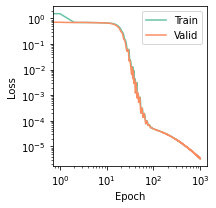

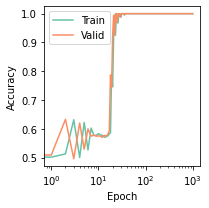

In [2]:
model = voronoi_main()

In [3]:
print(model)

<IPython.core.display.Javascript object>


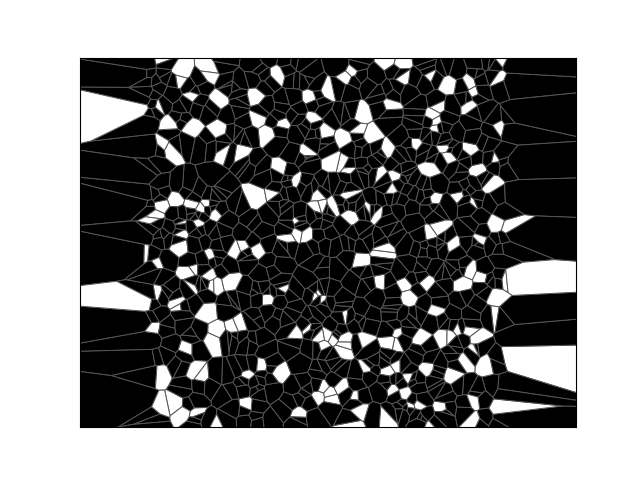

In [42]:
%matplotlib notebook
fig = plt.figure()

n_cells = 1000
mu = 0.0
sigma = 0.50
steps = 100

# Run
initial_state = np.random.randint(0, 2, n_cells)

gca = VoronoiCA(n_cells, mu=mu, sigma=sigma)
history = gca.evolve(initial_state, steps=steps)

# Animation
def update_plot(n):
    gca.plot(history[n], fig)

anim = animation.FuncAnimation(fig, update_plot, frames=steps, repeat=True)
anim.save('voronoi_ca.gif', writer='pillow', fps=10)

In [47]:
a = sp_matrix_to_sp_tensor(gca.graph.a)
results = []
state = initial_state.reshape((1, -1, 1)).astype("f4")
print(state.shape)
next_state = model([state, a])
results.append(np.array(state).reshape(-1))
results.append(np.array(next_state).reshape(-1))
for i in range(steps-1):
    next_state = model([next_state, a])
    results.append(np.array(next_state).reshape(-1))


(1, 1000, 1)


<IPython.core.display.Javascript object>


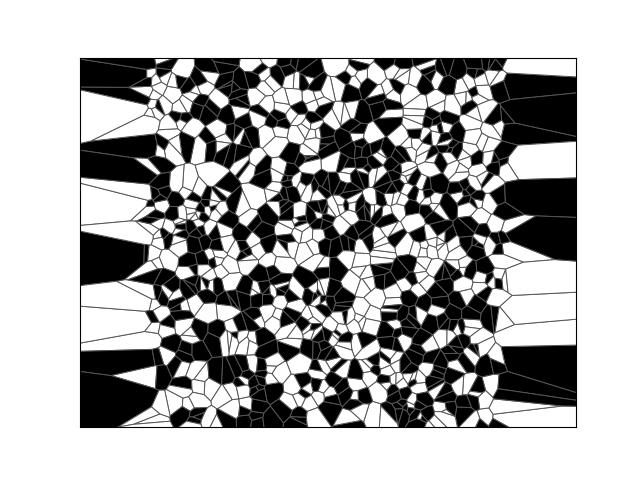

In [44]:
gca.fig = None
fig2 = plt.figure()
def update_plot_gnca(n):
    gca.plot((results[n] > 0.5).astype(int), fig2)

anim = animation.FuncAnimation(fig2, update_plot_gnca, frames=steps, repeat=True)
anim.save('voronoi_gca.gif', writer='pillow', fps=10)

<h1>CA: </h1>
<img src="voronoi_ca.gif" width="500" align="center">
<h1>GNCA: </h1>
<img src="voronoi_gca.gif" width="500" align="center">

In [50]:
print((results[5] > 0.5).astype(int))

[1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 

In [1]:
print(history[5])

NameError: name 'history' is not defined